In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
import pickle as pkl

In [2]:
warnings.filterwarnings("ignore")
df=pd.read_csv(r"C:\Users\dkdes\OneDrive\Desktop\kaggle_datasets\credit_score.csv")
df.head()

CUST_ID  INCOME  SAVINGS     DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  \
0  C02COQEVYU   33269        0   532304            0.0000        16.0000   
1  C02OZKC0ZF   77158    91187   315648            1.1818         4.0909   
2  C03FHP2D0A   30917    21642   534864            0.7000        17.3000   
3  C03PVPPHOY   80657    64526   629125            0.8000         7.8000   
4  C04J69MUX0  149971  1172498  2399531            7.8182        16.0000   

   R_DEBT_SAVINGS  T_CLOTHING_12  T_CLOTHING_6  R_CLOTHING  ...  \
0          1.2000           1889           945      0.5003  ...   
1          3.4615           5818           111      0.0191  ...   
2         24.7142           1157           860      0.7433  ...   
3          9.7499           6857          3686      0.5376  ...   
4          2.0465           1978           322      0.1628  ...   

   R_EXPENDITURE_SAVINGS  R_EXPENDITURE_DEBT  CAT_GAMBLING  CAT_DEBT  \
0                 0.0000              0.0625          High         1   
1                 0.7692              0.2222            No         1   
2                 1.4286              0.0578          High         1   
3                 1.2500              0.1282          High         1   
4                 0.1163              0.0568          High         1   

   CAT_CREDIT_CARD  CAT_MORTGAGE  CAT_SAVINGS_ACCOUNT  CAT_DEPENDENTS  \
0                0             0                    0               0   
1                0             0                    1               0   
2                0             0                    1               0   
3                0             0                    1               0   
4                1             1                    1               1   

   CREDIT_SCORE  DEFAULT  
0           444        1  
1           625        0  
2           469        1  
3           559        0  
4           473        0  

[5 rows x 87 columns]

In [3]:
df.isnull().sum()

CUST_ID                0
INCOME                 0
SAVINGS                0
DEBT                   0
R_SAVINGS_INCOME       0
                      ..
CAT_MORTGAGE           0
CAT_SAVINGS_ACCOUNT    0
CAT_DEPENDENTS         0
CREDIT_SCORE           0
DEFAULT                0
Length: 87, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUST_ID                  1000 non-null   object 
 1   INCOME                   1000 non-null   int64  
 2   SAVINGS                  1000 non-null   int64  
 3   DEBT                     1000 non-null   int64  
 4   R_SAVINGS_INCOME         1000 non-null   float64
 5   R_DEBT_INCOME            1000 non-null   float64
 6   R_DEBT_SAVINGS           1000 non-null   float64
 7   T_CLOTHING_12            1000 non-null   int64  
 8   T_CLOTHING_6             1000 non-null   int64  
 9   R_CLOTHING               1000 non-null   float64
 10  R_CLOTHING_INCOME        1000 non-null   float64
 11  R_CLOTHING_SAVINGS       1000 non-null   float64
 12  R_CLOTHING_DEBT          1000 non-null   float64
 13  T_EDUCATION_12           1000 non-null   int64  
 14  T_EDUCATION_6            

In [5]:
df=df.drop("CUST_ID" , axis=1)
df.head()

INCOME  SAVINGS     DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  R_DEBT_SAVINGS  \
0   33269        0   532304            0.0000        16.0000          1.2000   
1   77158    91187   315648            1.1818         4.0909          3.4615   
2   30917    21642   534864            0.7000        17.3000         24.7142   
3   80657    64526   629125            0.8000         7.8000          9.7499   
4  149971  1172498  2399531            7.8182        16.0000          2.0465   

   T_CLOTHING_12  T_CLOTHING_6  R_CLOTHING  R_CLOTHING_INCOME  ...  \
0           1889           945      0.5003             0.0568  ...   
1           5818           111      0.0191             0.0754  ...   
2           1157           860      0.7433             0.0374  ...   
3           6857          3686      0.5376             0.0850  ...   
4           1978           322      0.1628             0.0132  ...   

   R_EXPENDITURE_SAVINGS  R_EXPENDITURE_DEBT  CAT_GAMBLING  CAT_DEBT  \
0                 0.0000              0.0625          High         1   
1                 0.7692              0.2222            No         1   
2                 1.4286              0.0578          High         1   
3                 1.2500              0.1282          High         1   
4                 0.1163              0.0568          High         1   

   CAT_CREDIT_CARD  CAT_MORTGAGE  CAT_SAVINGS_ACCOUNT  CAT_DEPENDENTS  \
0                0             0                    0               0   
1                0             0                    1               0   
2                0             0                    1               0   
3                0             0                    1               0   
4                1             1                    1               1   

   CREDIT_SCORE  DEFAULT  
0           444        1  
1           625        0  
2           469        1  
3           559        0  
4           473        0  

[5 rows x 86 columns]

In [6]:
# Encoding the categorical data 
from sklearn.preprocessing import OrdinalEncoder
oe= OrdinalEncoder(categories=[['No', 'Low', 'High']])
df["CAT_GAMBLING_ENCODED"]=oe.fit_transform(df[['CAT_GAMBLING']])
df.head()

INCOME  SAVINGS     DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  R_DEBT_SAVINGS  \
0   33269        0   532304            0.0000        16.0000          1.2000   
1   77158    91187   315648            1.1818         4.0909          3.4615   
2   30917    21642   534864            0.7000        17.3000         24.7142   
3   80657    64526   629125            0.8000         7.8000          9.7499   
4  149971  1172498  2399531            7.8182        16.0000          2.0465   

   T_CLOTHING_12  T_CLOTHING_6  R_CLOTHING  R_CLOTHING_INCOME  ...  \
0           1889           945      0.5003             0.0568  ...   
1           5818           111      0.0191             0.0754  ...   
2           1157           860      0.7433             0.0374  ...   
3           6857          3686      0.5376             0.0850  ...   
4           1978           322      0.1628             0.0132  ...   

   R_EXPENDITURE_DEBT  CAT_GAMBLING  CAT_DEBT  CAT_CREDIT_CARD  CAT_MORTGAGE  \
0              0.0625          High         1                0             0   
1              0.2222            No         1                0             0   
2              0.0578          High         1                0             0   
3              0.1282          High         1                0             0   
4              0.0568          High         1                1             1   

   CAT_SAVINGS_ACCOUNT  CAT_DEPENDENTS  CREDIT_SCORE  DEFAULT  \
0                    0               0           444        1   
1                    1               0           625        0   
2                    1               0           469        1   
3                    1               0           559        0   
4                    1               1           473        0   

   CAT_GAMBLING_ENCODED  
0                   2.0  
1                   0.0  
2                   2.0  
3                   2.0  
4                   2.0  

[5 rows x 87 columns]

In [7]:
df=df.drop("CAT_GAMBLING" , axis =1)
df.head()

INCOME  SAVINGS     DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  R_DEBT_SAVINGS  \
0   33269        0   532304            0.0000        16.0000          1.2000   
1   77158    91187   315648            1.1818         4.0909          3.4615   
2   30917    21642   534864            0.7000        17.3000         24.7142   
3   80657    64526   629125            0.8000         7.8000          9.7499   
4  149971  1172498  2399531            7.8182        16.0000          2.0465   

   T_CLOTHING_12  T_CLOTHING_6  R_CLOTHING  R_CLOTHING_INCOME  ...  \
0           1889           945      0.5003             0.0568  ...   
1           5818           111      0.0191             0.0754  ...   
2           1157           860      0.7433             0.0374  ...   
3           6857          3686      0.5376             0.0850  ...   
4           1978           322      0.1628             0.0132  ...   

   R_EXPENDITURE_SAVINGS  R_EXPENDITURE_DEBT  CAT_DEBT  CAT_CREDIT_CARD  \
0                 0.0000              0.0625         1                0   
1                 0.7692              0.2222         1                0   
2                 1.4286              0.0578         1                0   
3                 1.2500              0.1282         1                0   
4                 0.1163              0.0568         1                1   

   CAT_MORTGAGE  CAT_SAVINGS_ACCOUNT  CAT_DEPENDENTS  CREDIT_SCORE  DEFAULT  \
0             0                    0               0           444        1   
1             0                    1               0           625        0   
2             0                    1               0           469        1   
3             0                    1               0           559        0   
4             1                    1               1           473        0   

   CAT_GAMBLING_ENCODED  
0                   2.0  
1                   0.0  
2                   2.0  
3                   2.0  
4                   2.0  

[5 rows x 86 columns]

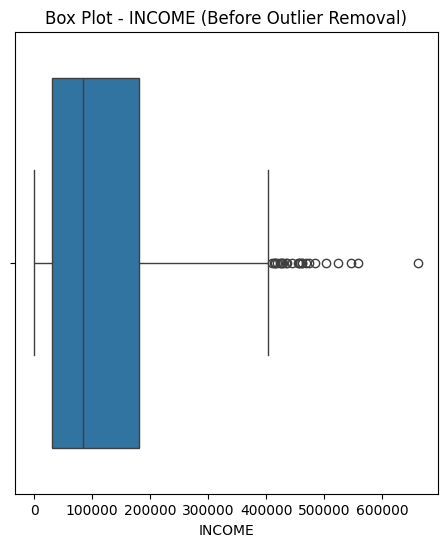

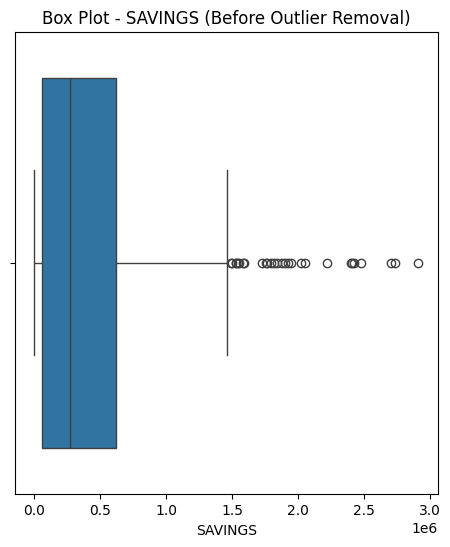

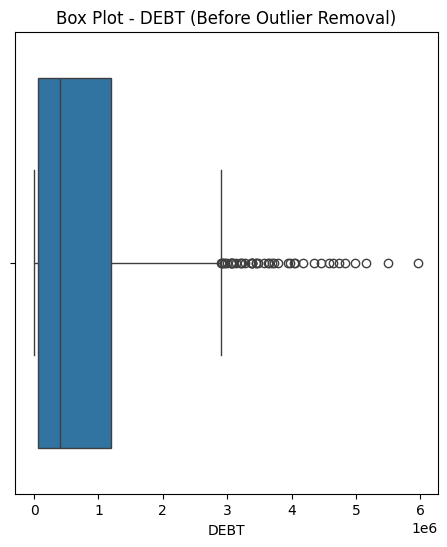

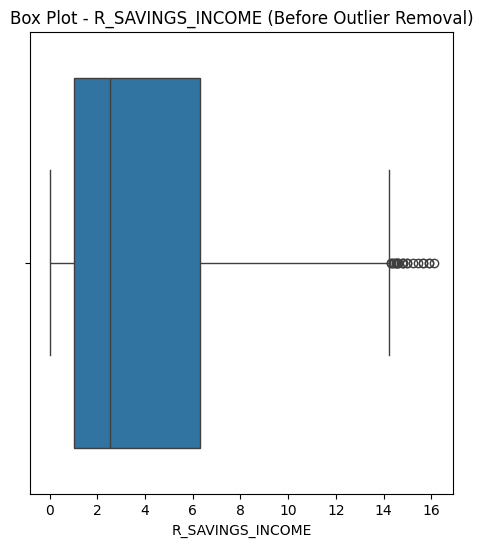

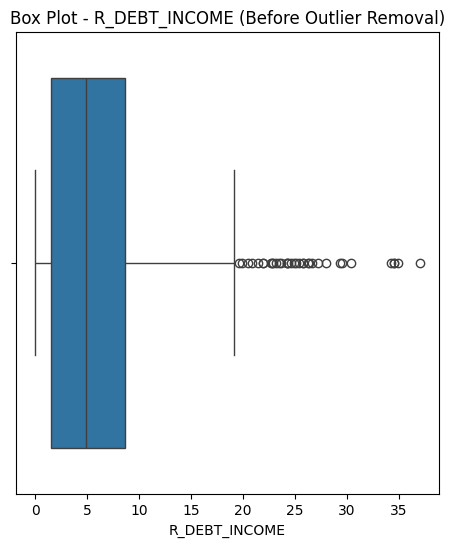

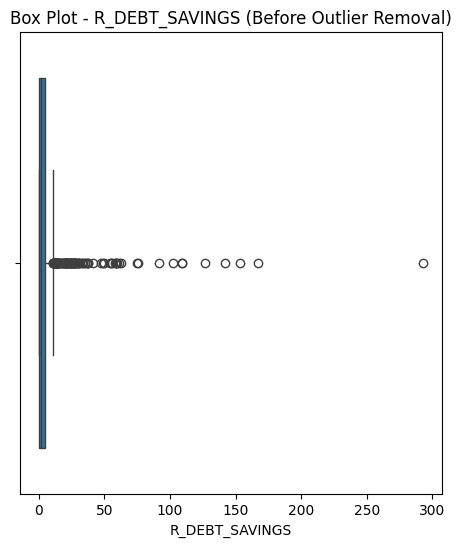

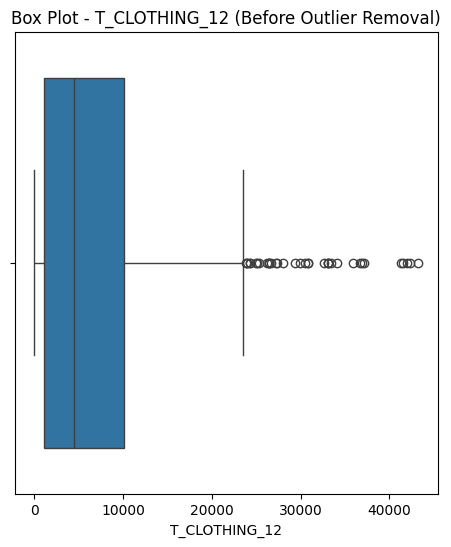

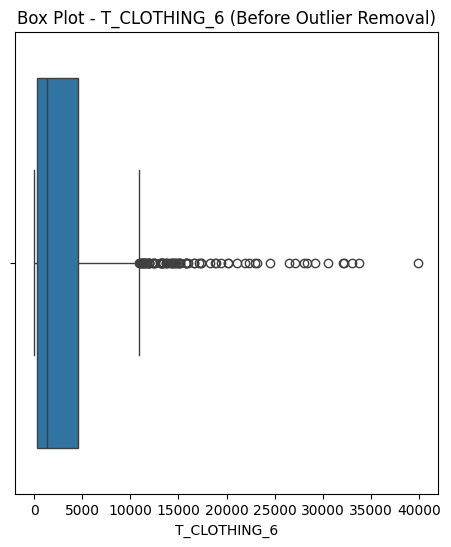

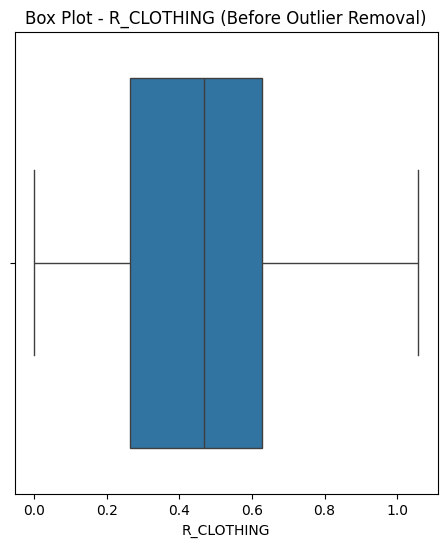

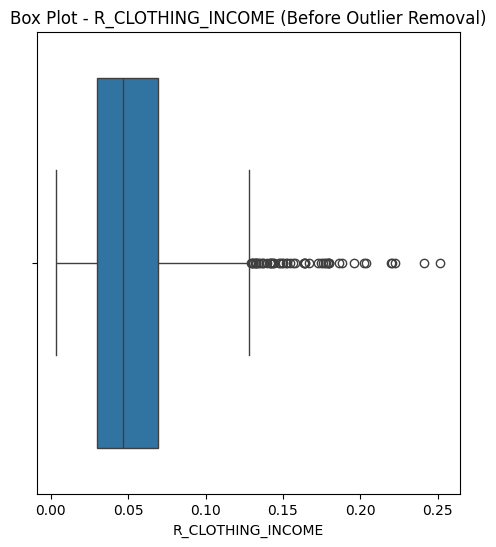

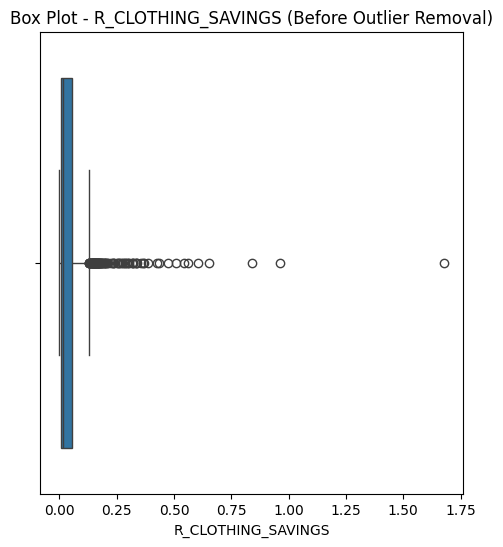

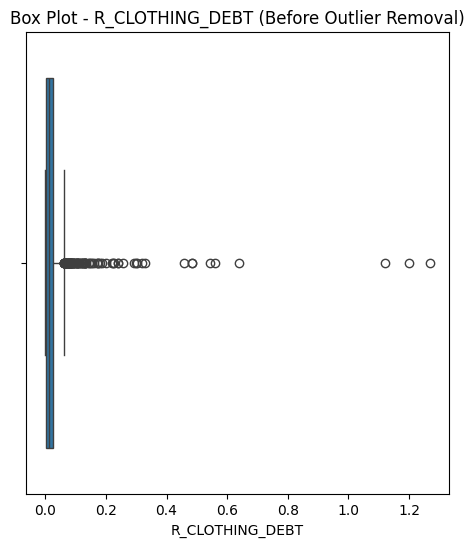

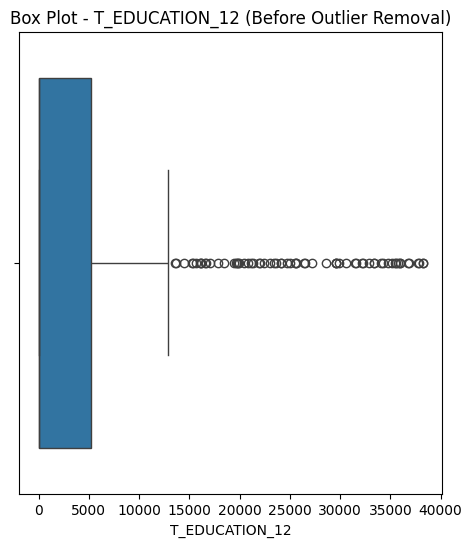

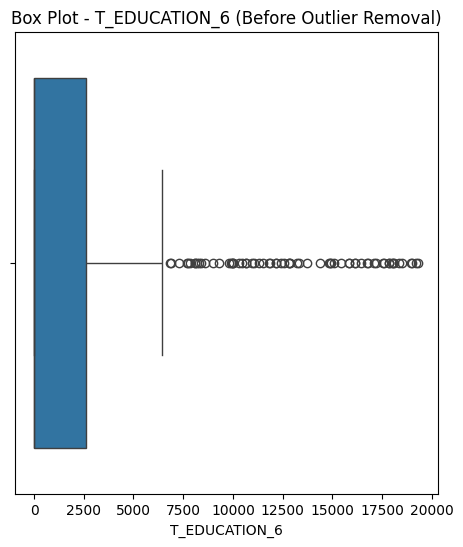

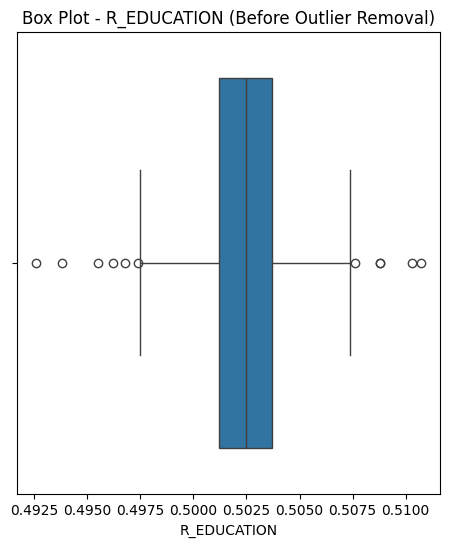

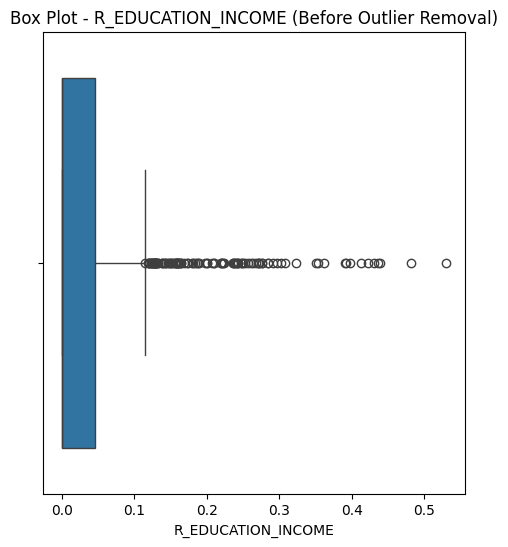

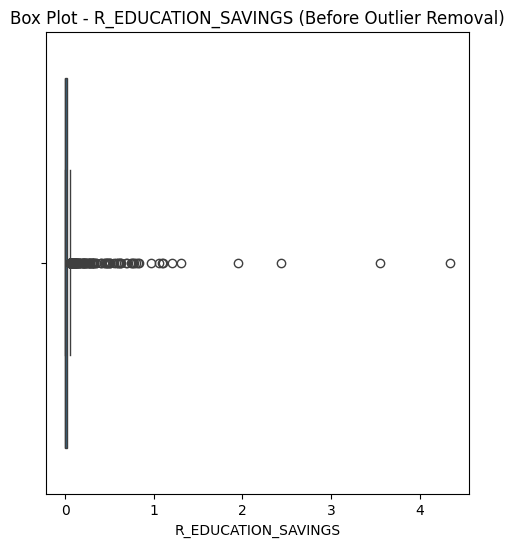

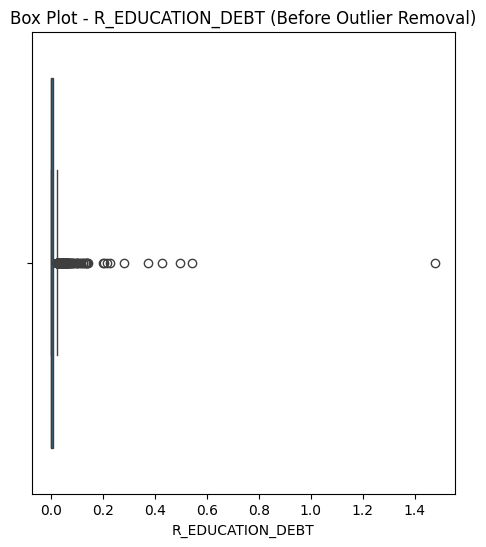

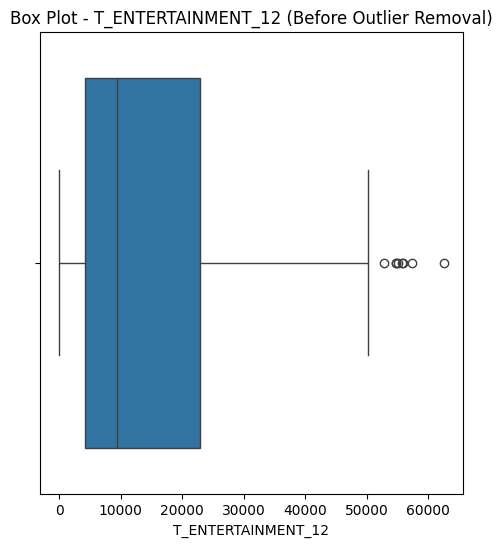

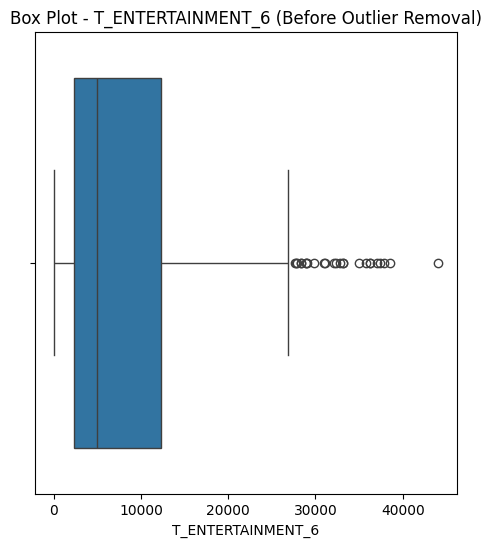

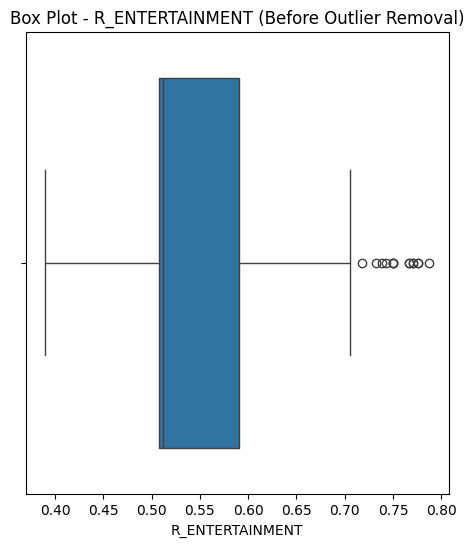

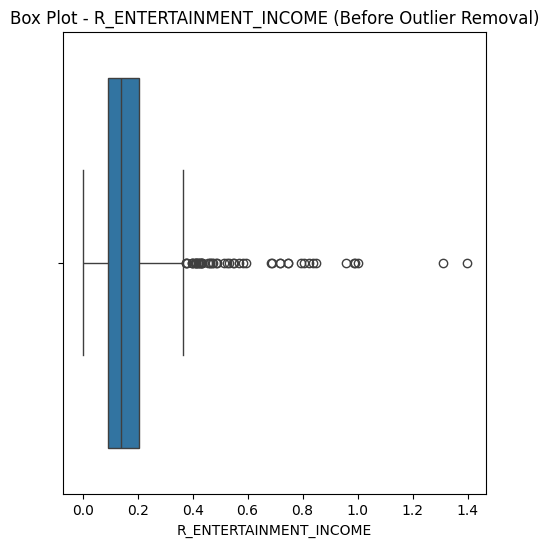

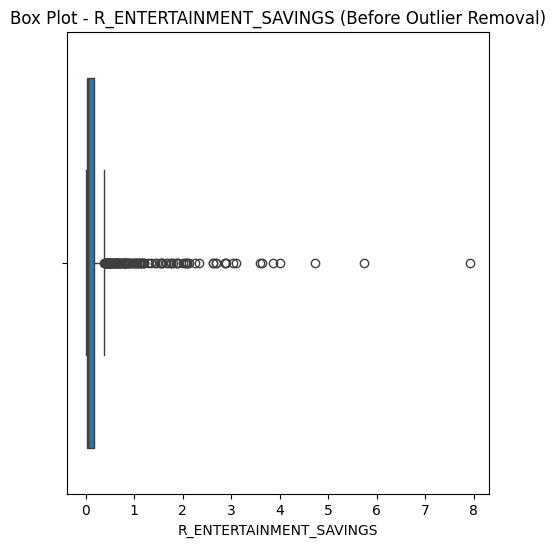

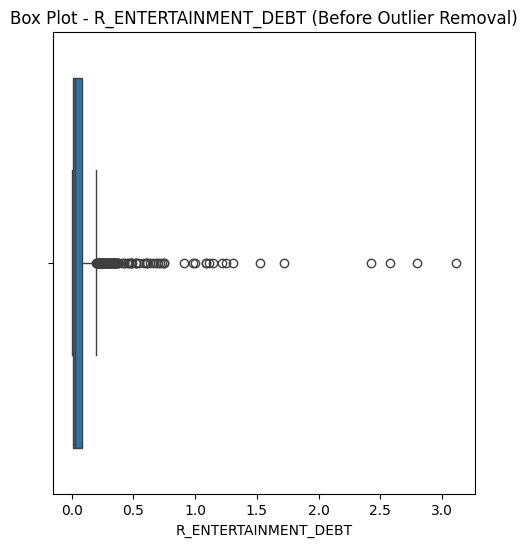

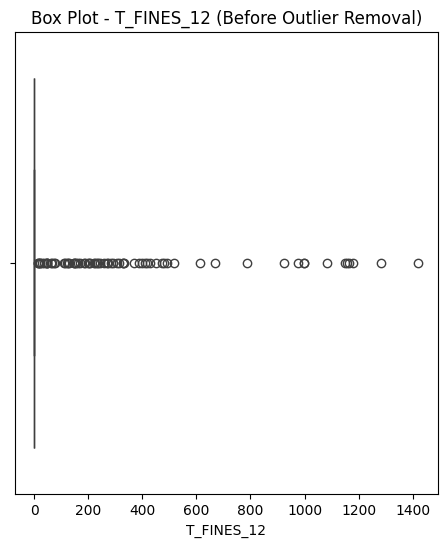

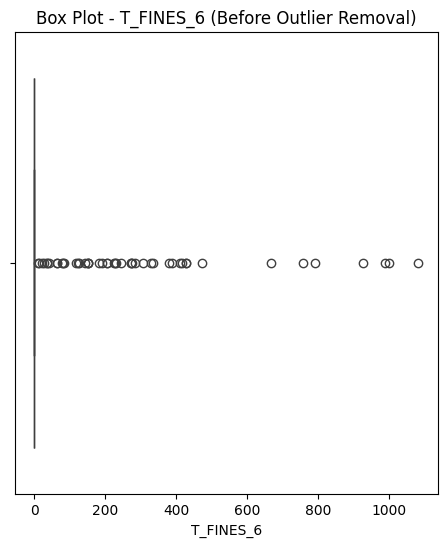

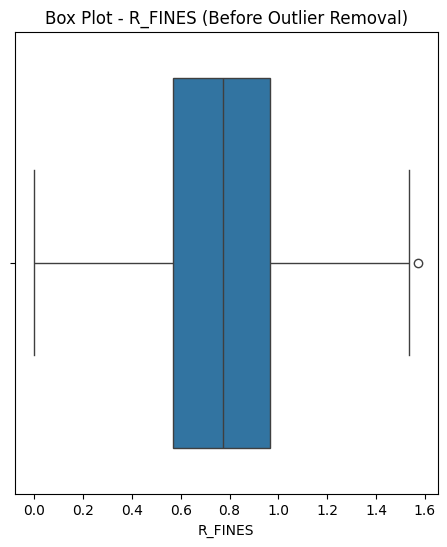

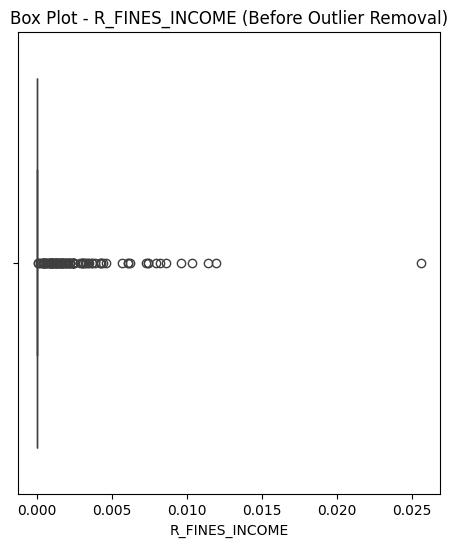

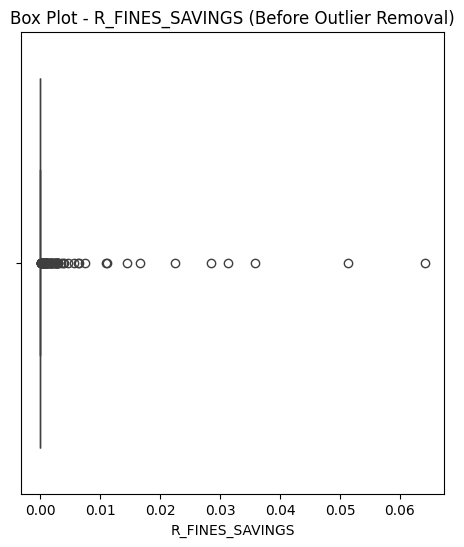

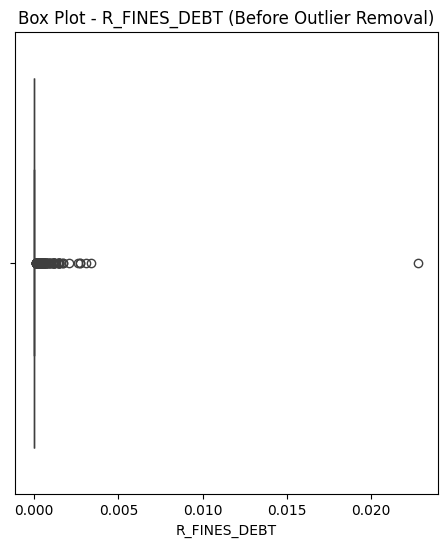

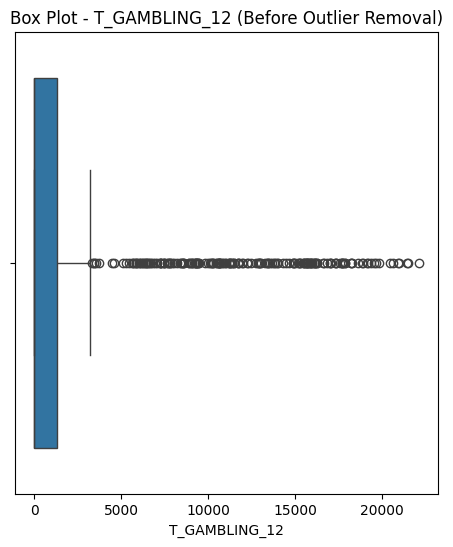

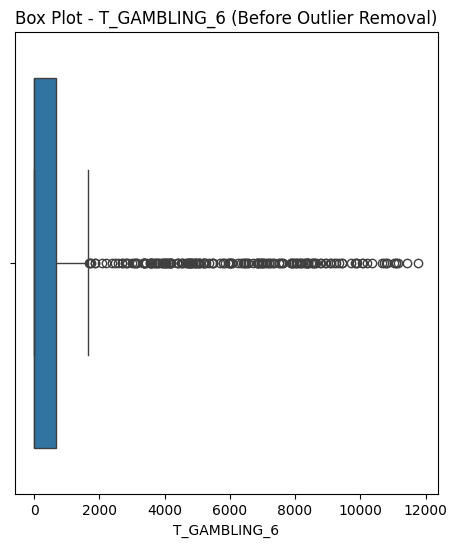

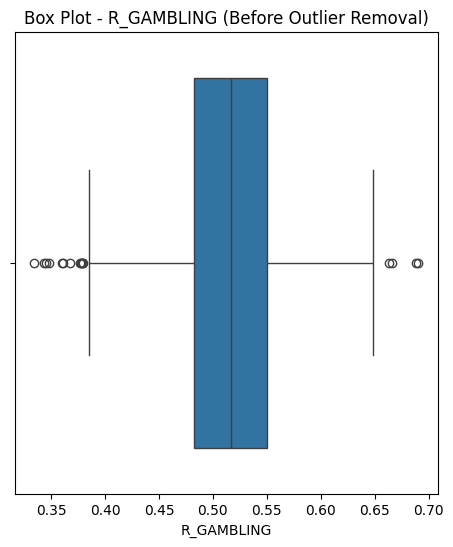

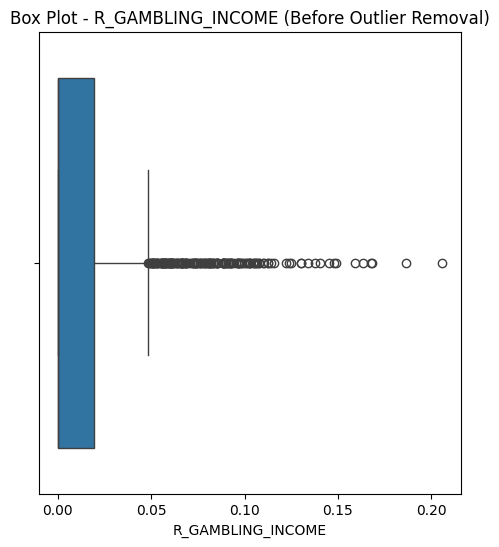

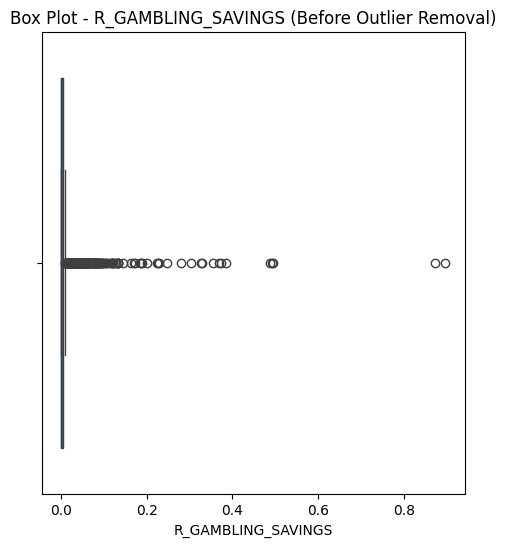

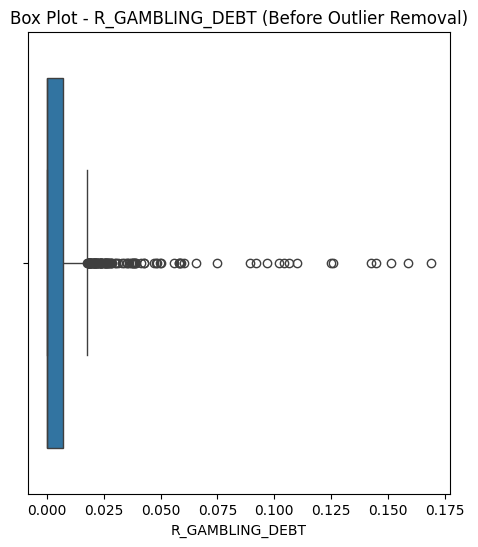

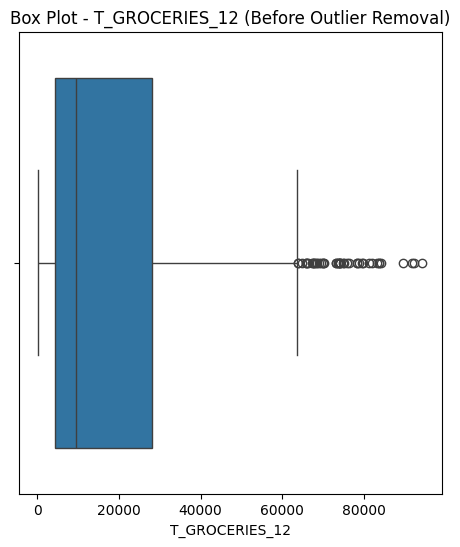

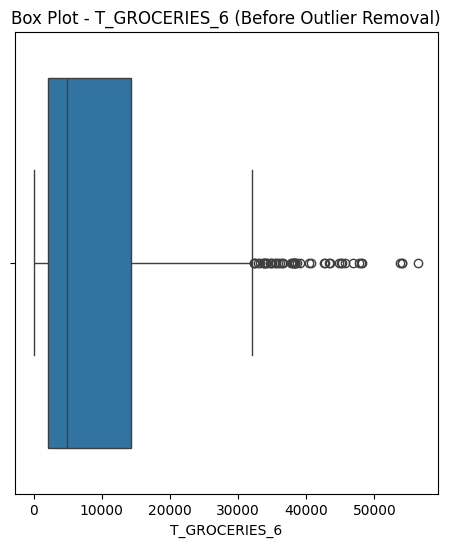

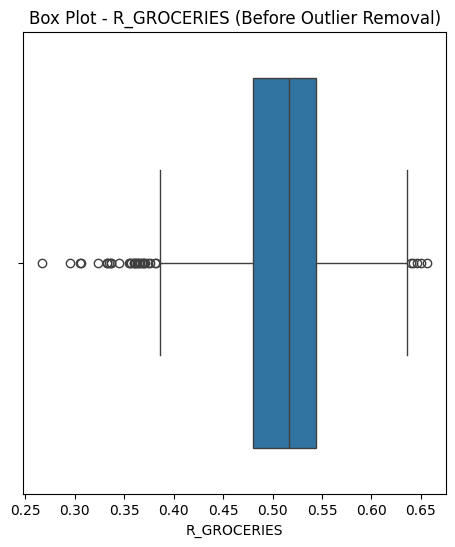

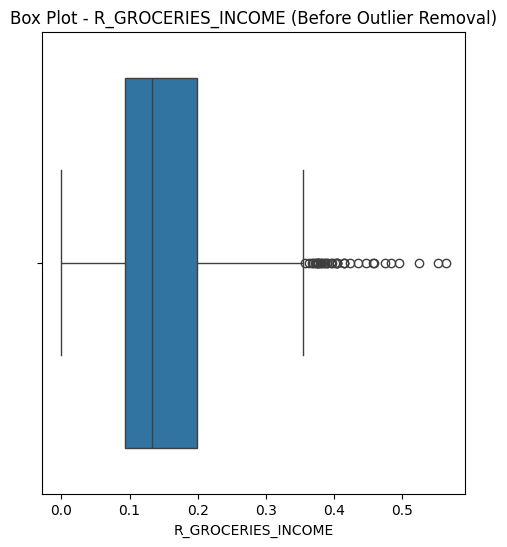

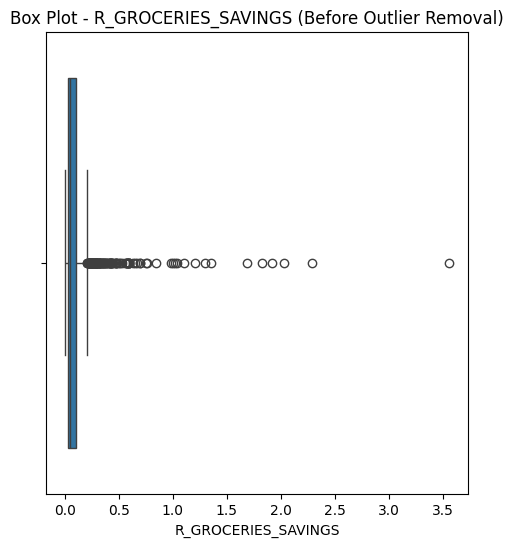

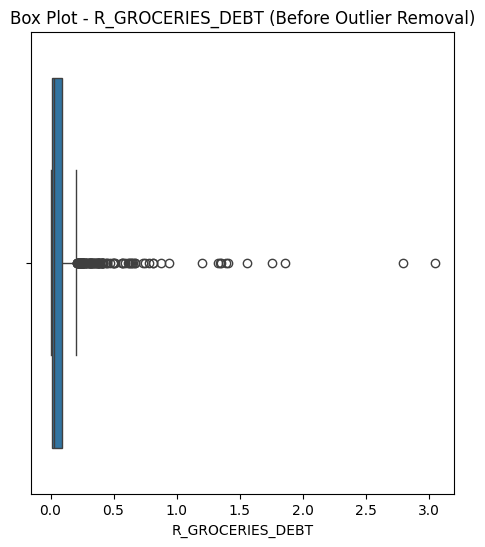

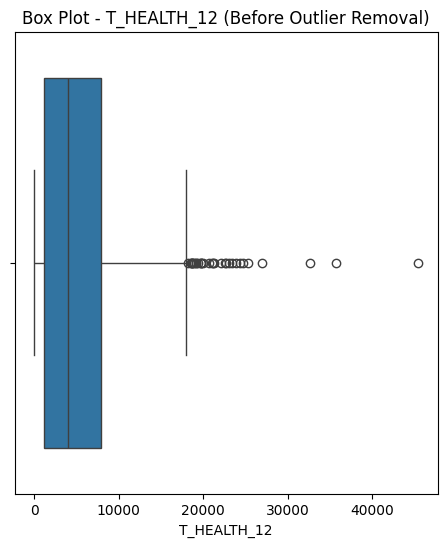

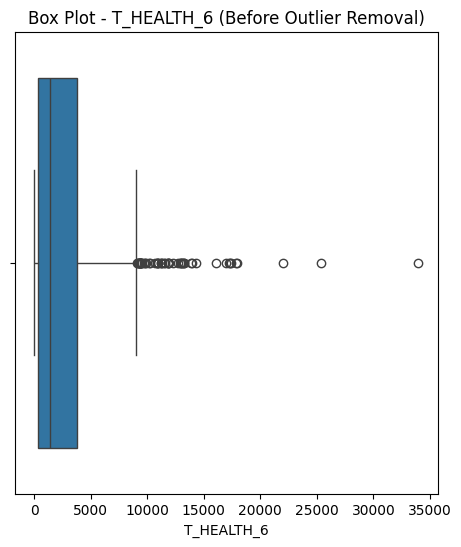

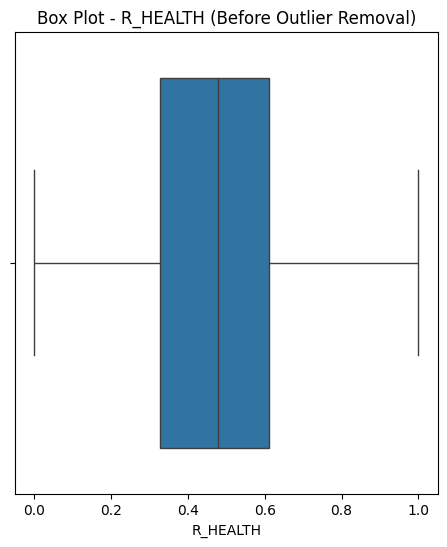

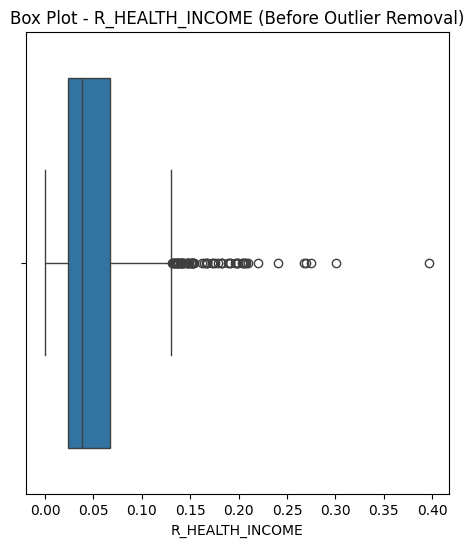

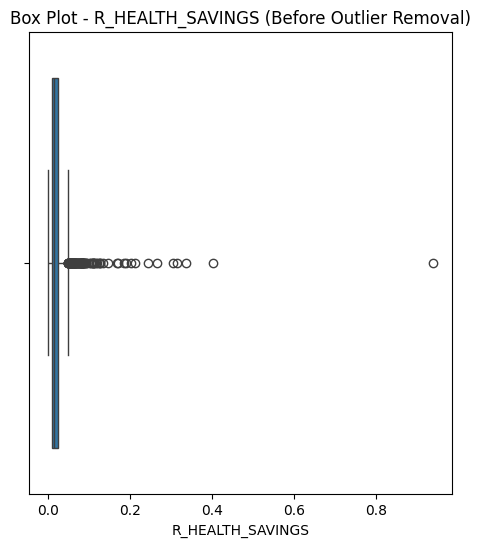

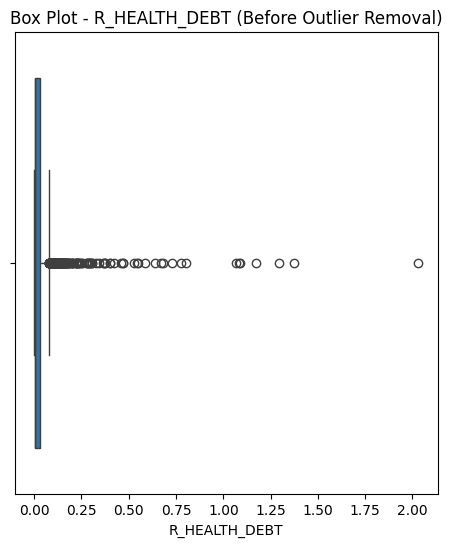

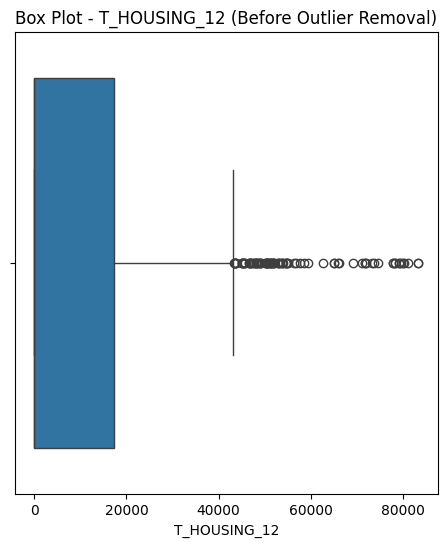

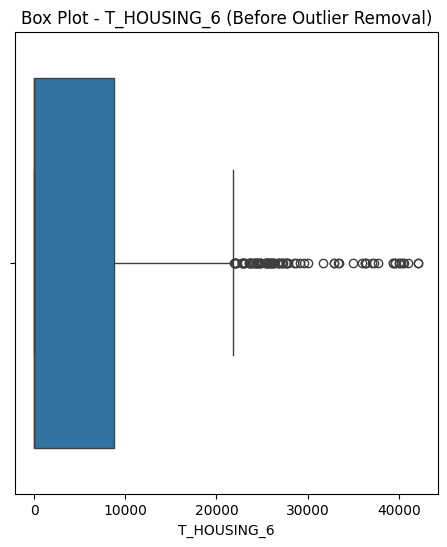

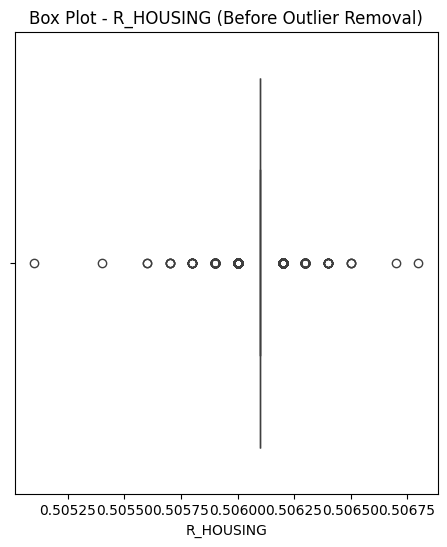

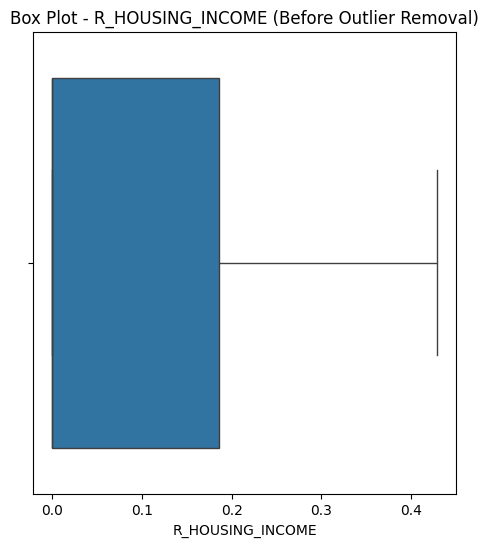

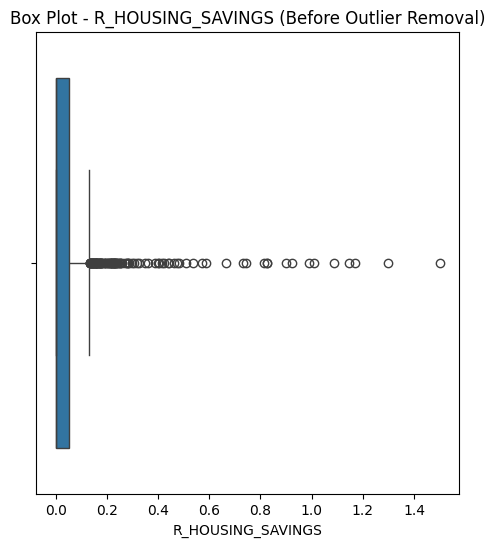

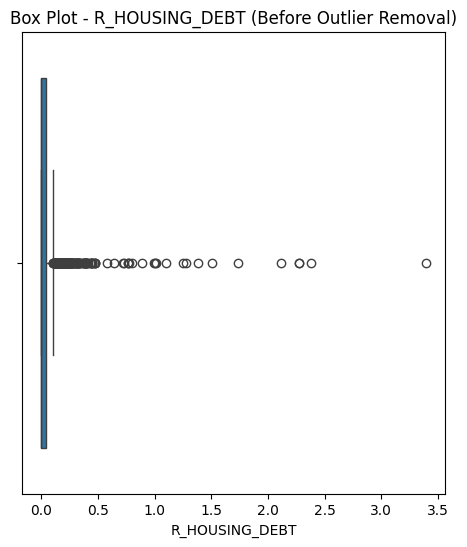

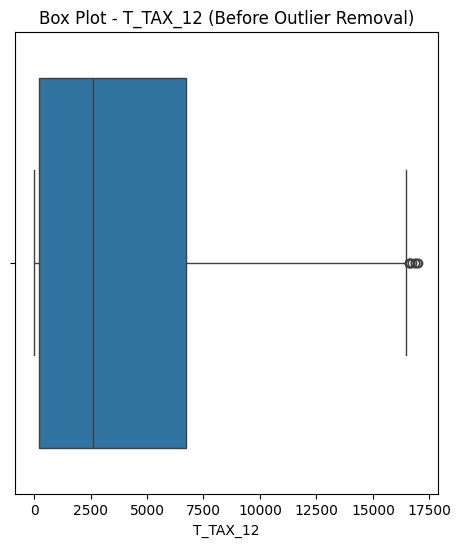

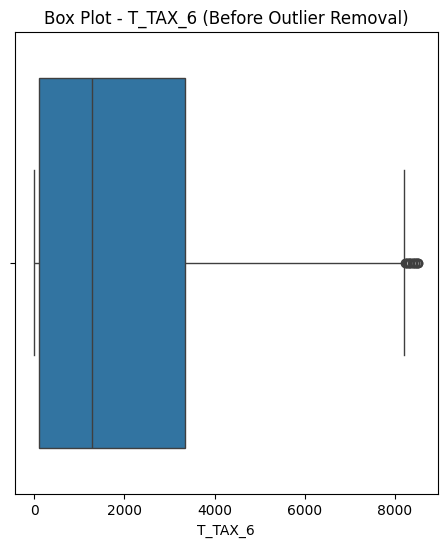

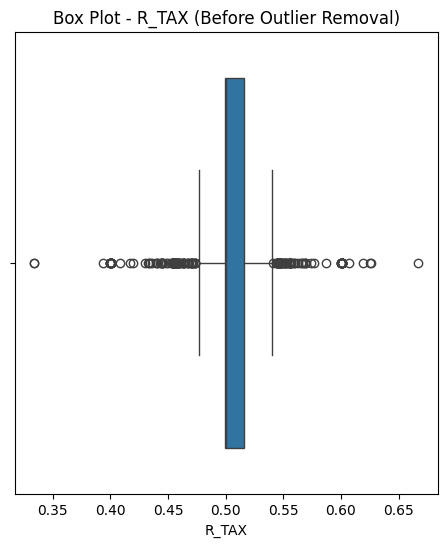

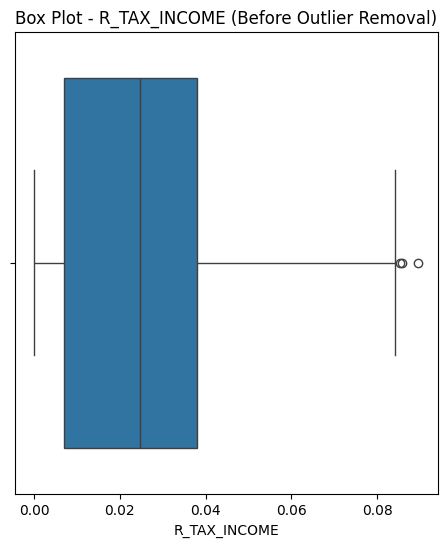

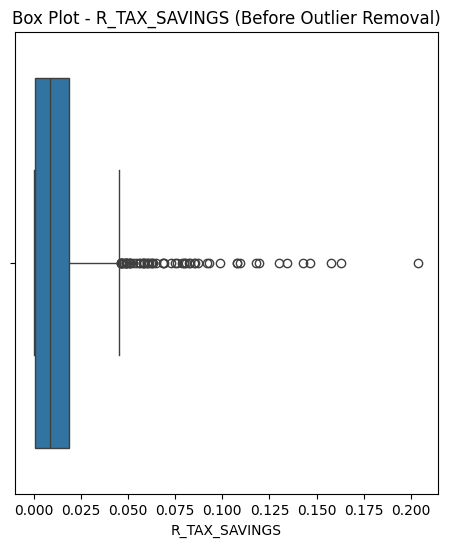

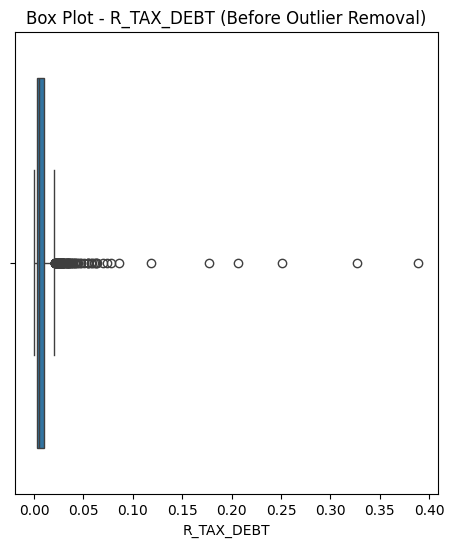

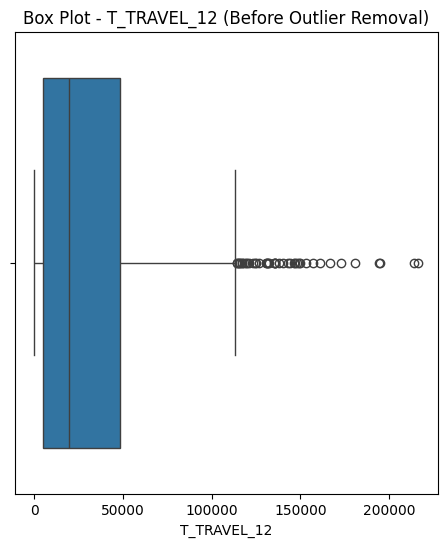

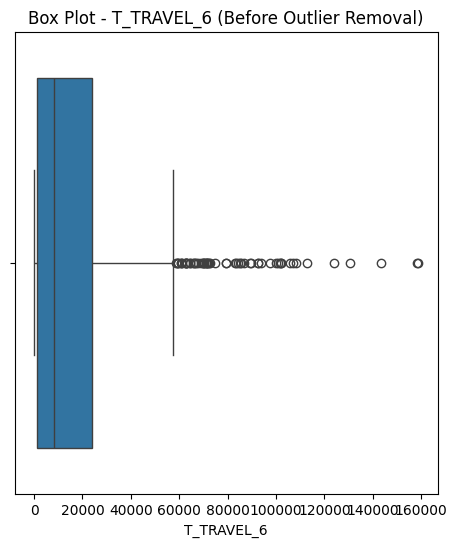

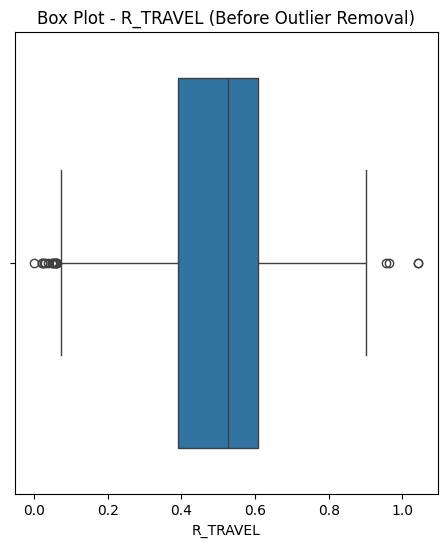

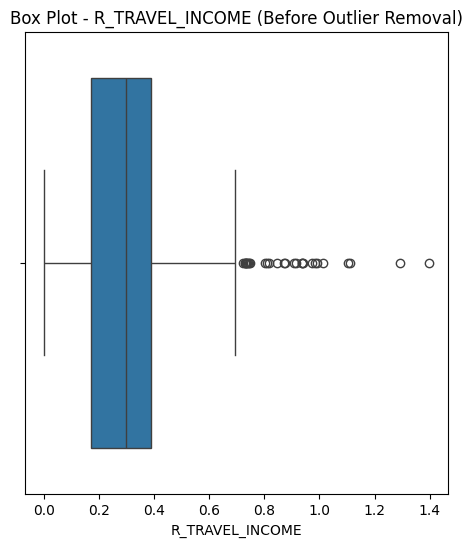

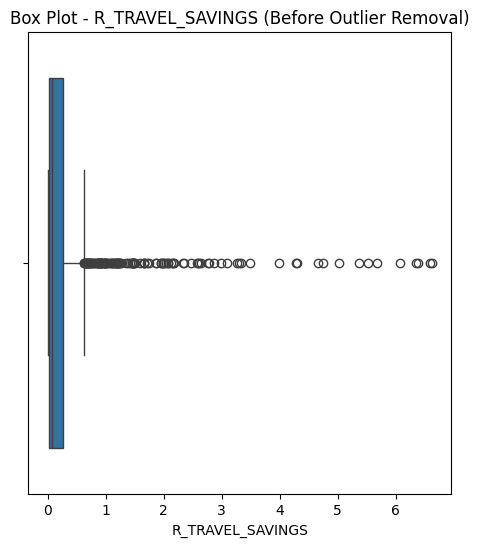

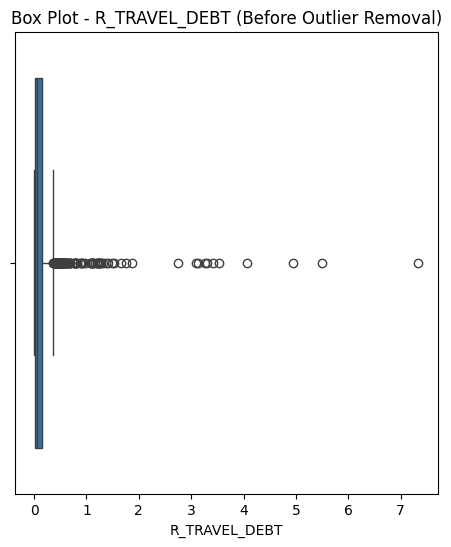

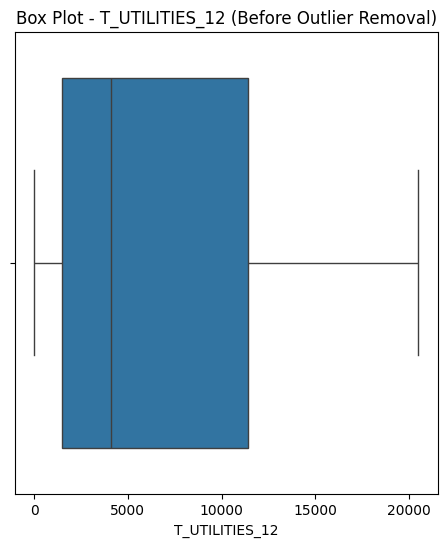

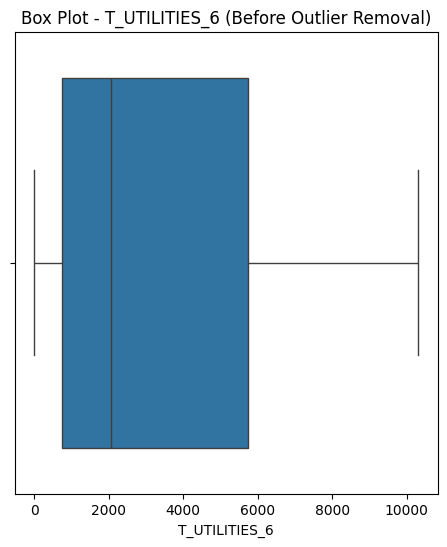

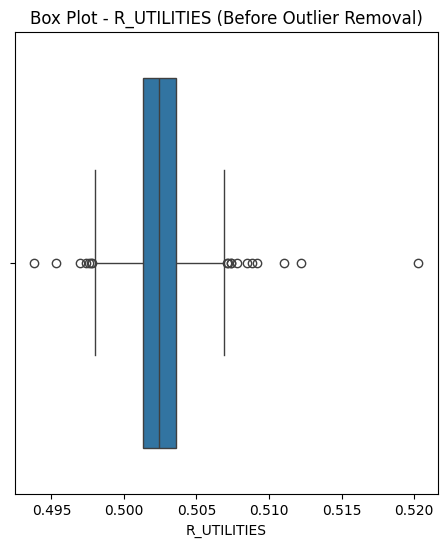

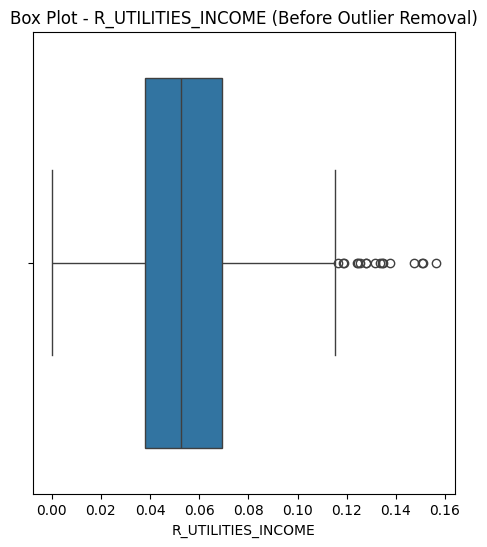

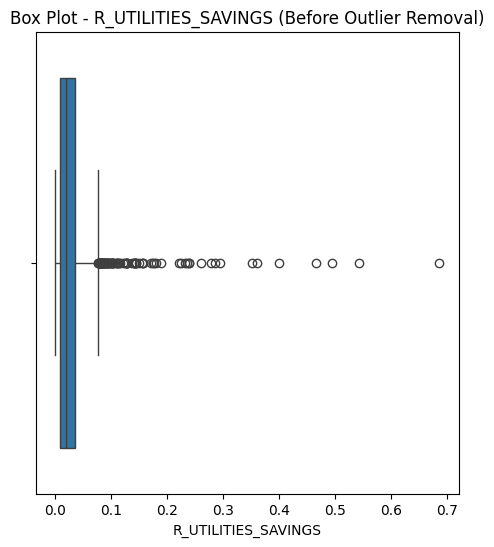

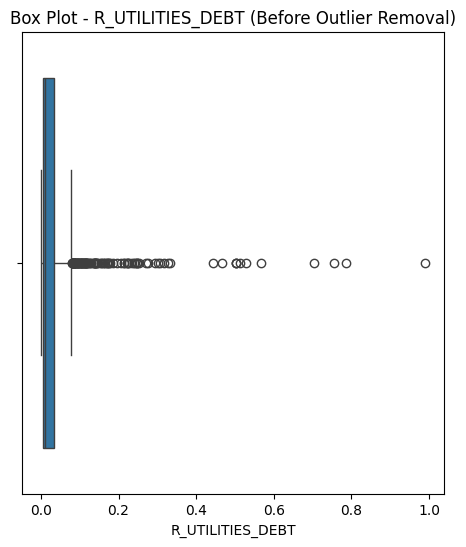

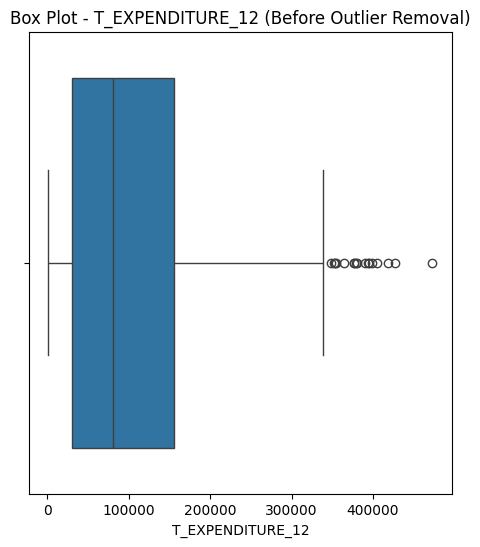

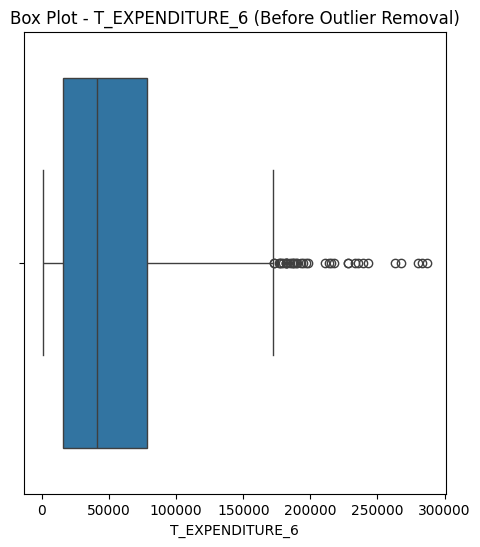

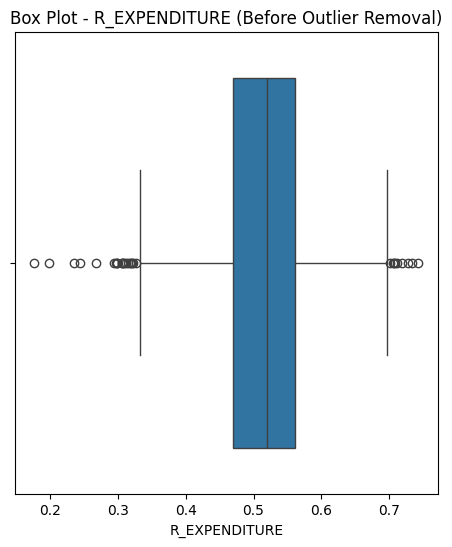

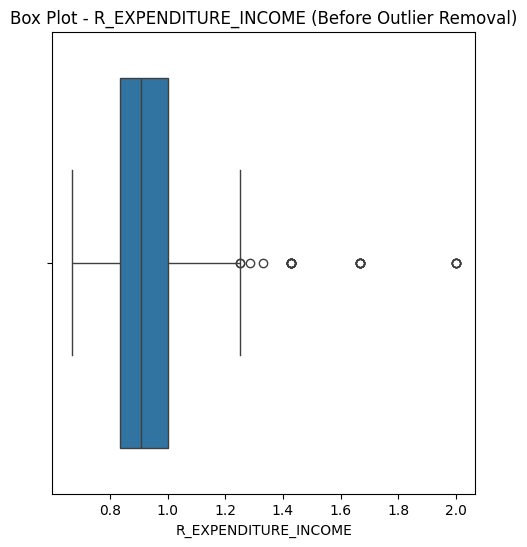

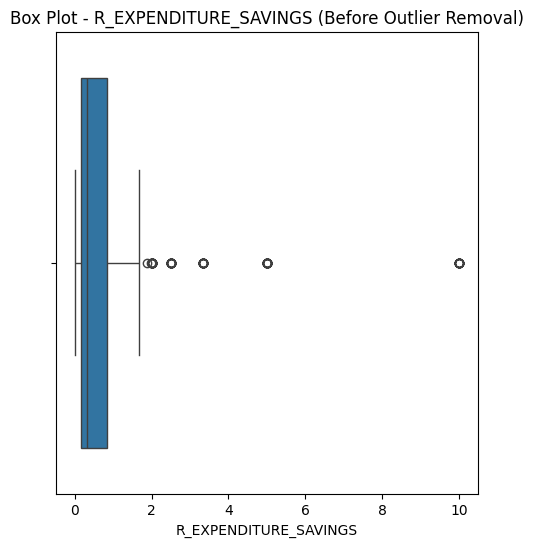

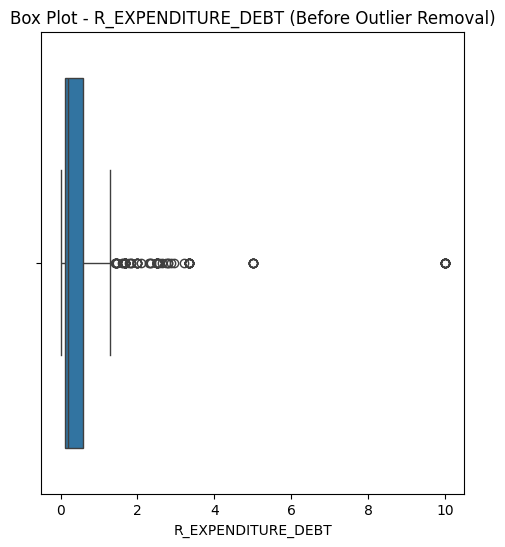

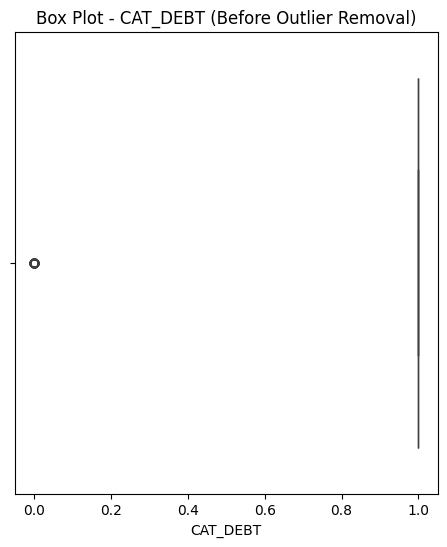

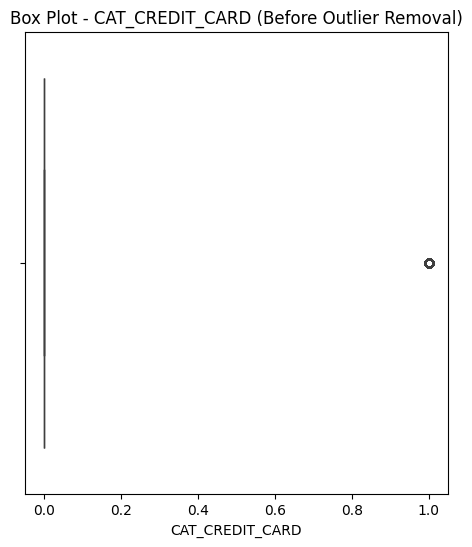

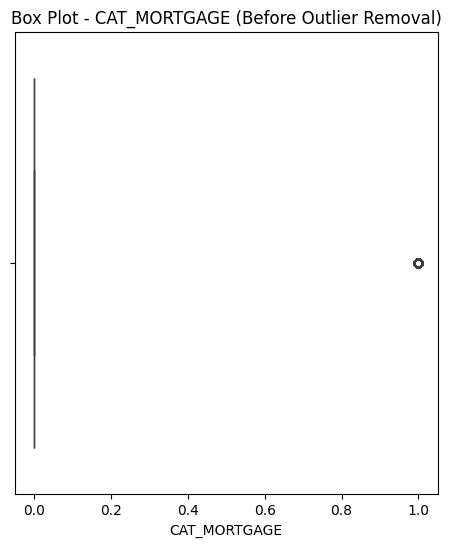

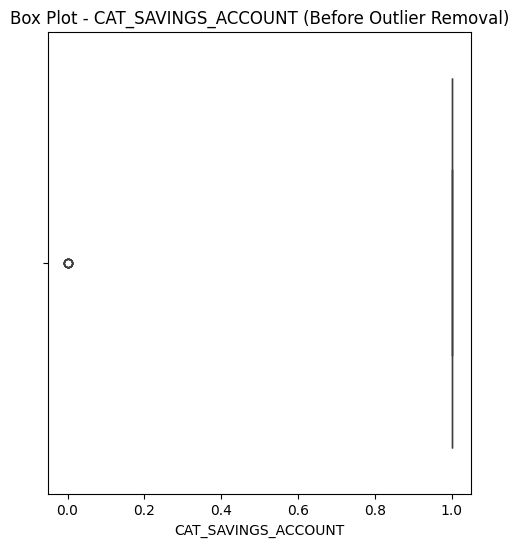

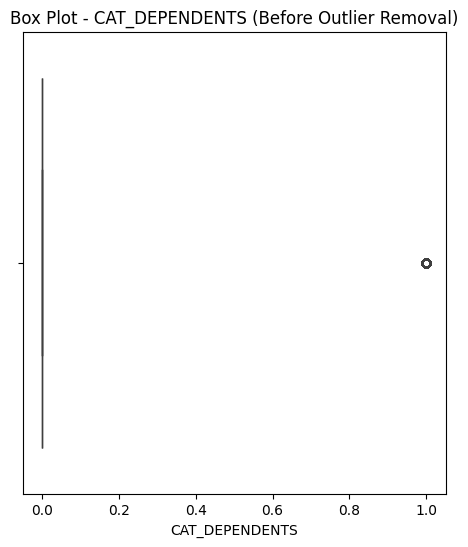

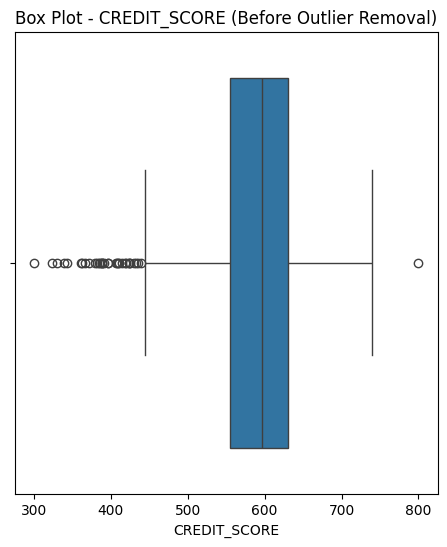

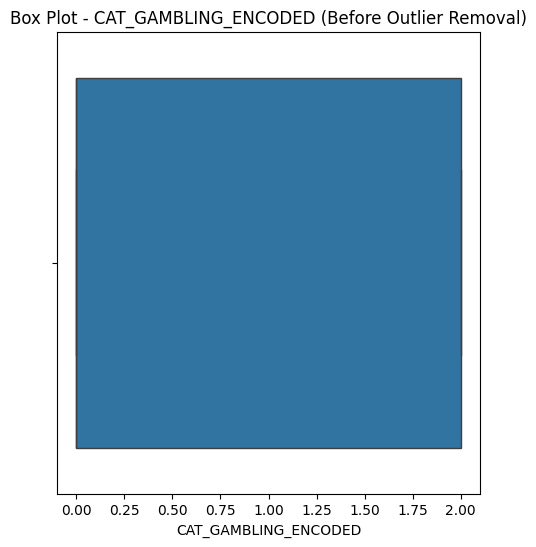

In [8]:

columns_to_check = df.columns.drop('DEFAULT')
for col in columns_to_check:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot - {col} (Before Outlier Removal)')
plt.show()

In [9]:
columns_to_check = df.drop("DEFAULT", axis=1)

def remove_outliers(column):
    percentile25 = df[column].quantile(0.25)
    percentile75 = df[column].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df[column] = np.where(
        df[column] > upper_limit,
        upper_limit,
        np.where(
            df[column] < lower_limit,
            lower_limit,
            df[column]
        )
    )

for col in columns_to_check:
    remove_outliers(col)


In [10]:
df.shape

(1000, 86)

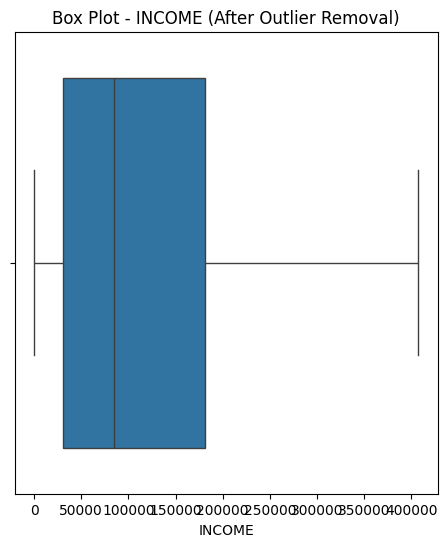

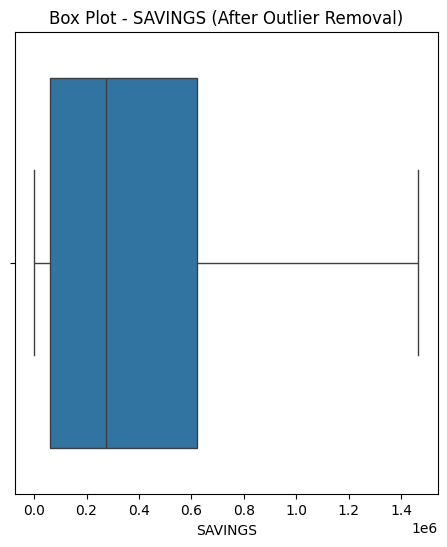

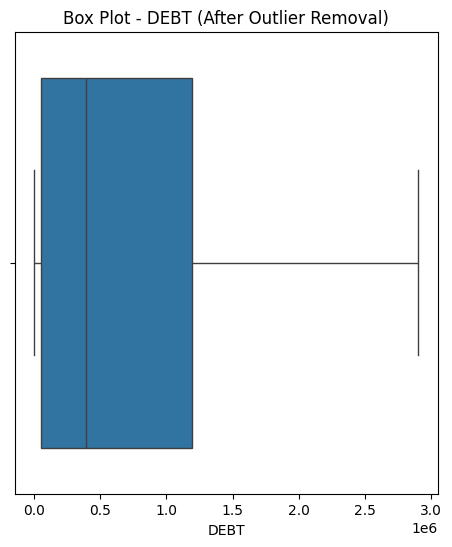

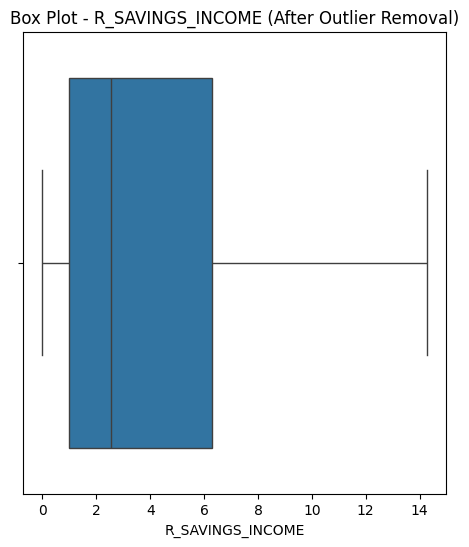

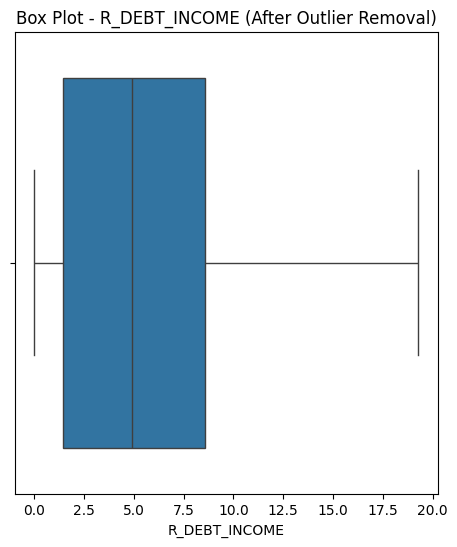

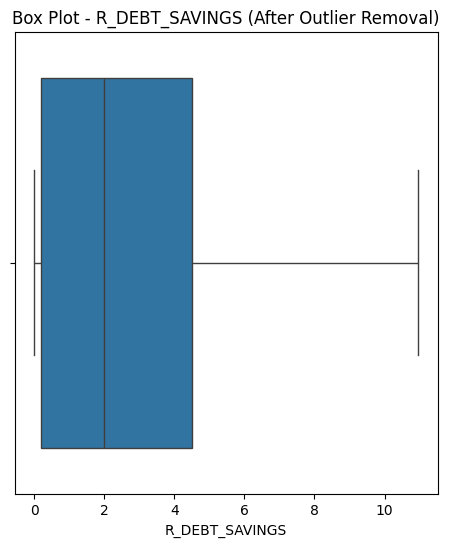

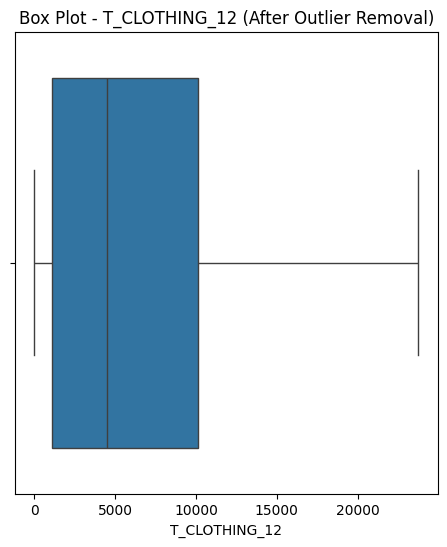

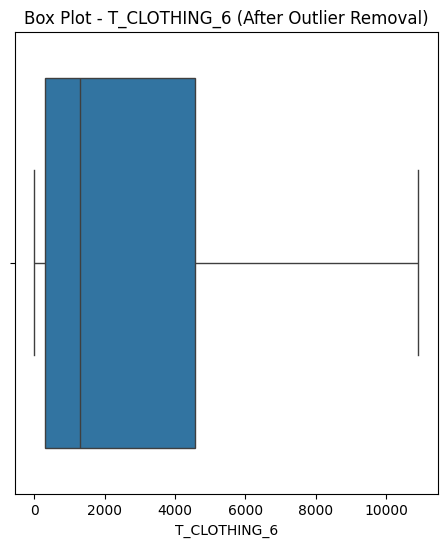

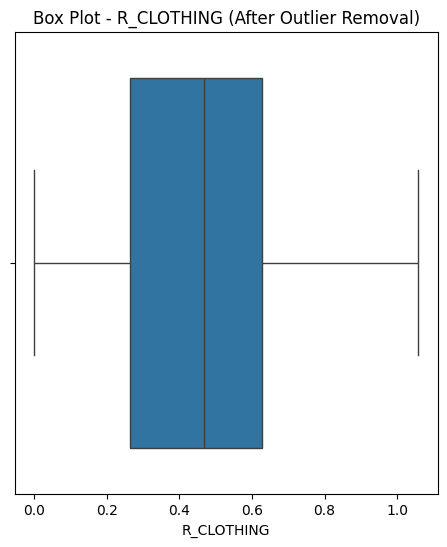

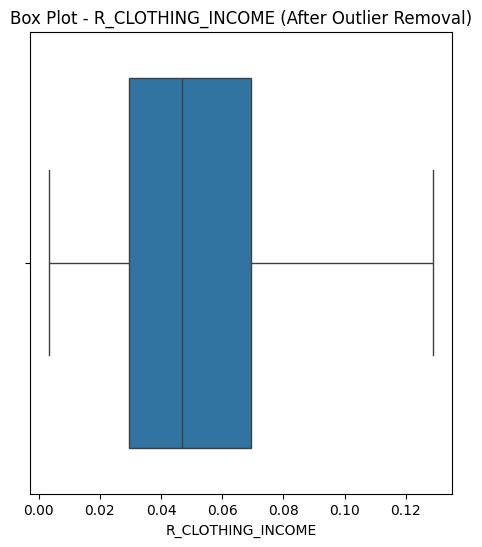

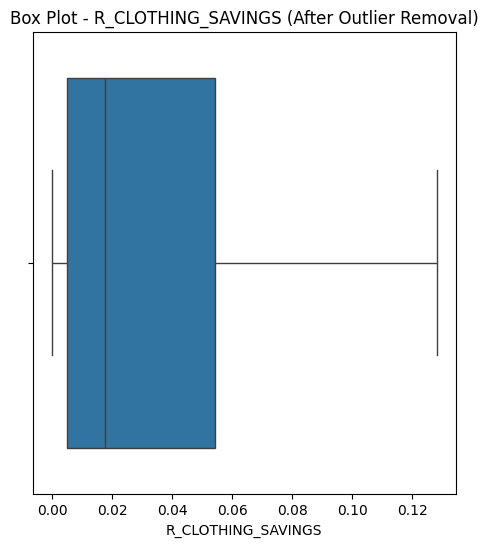

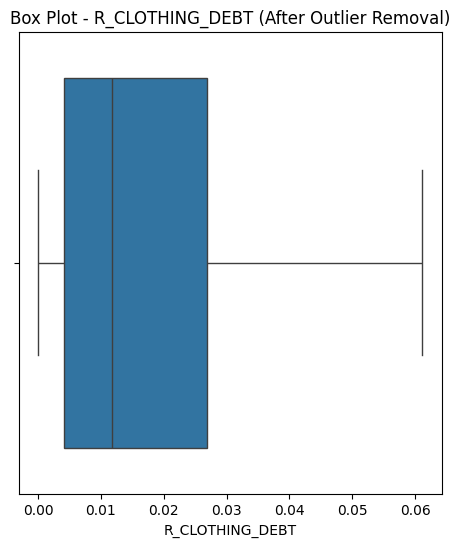

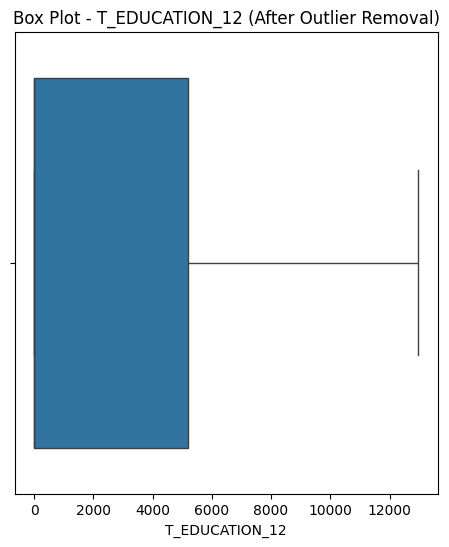

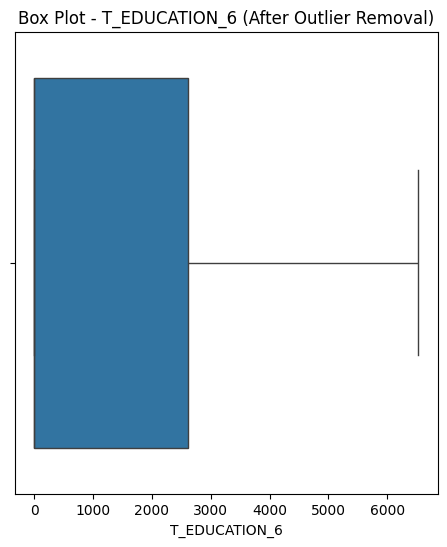

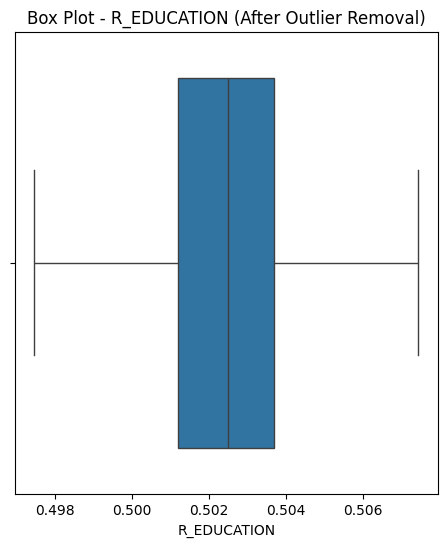

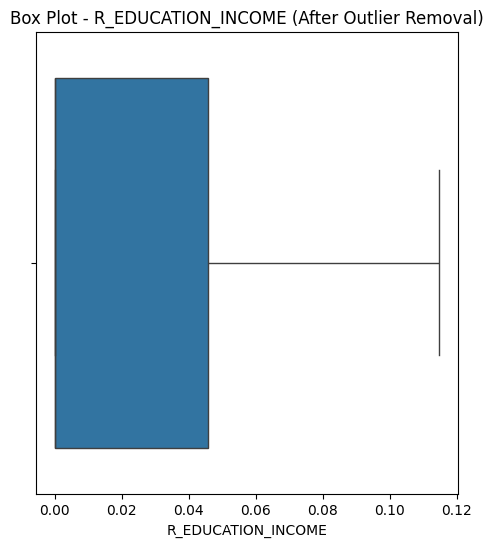

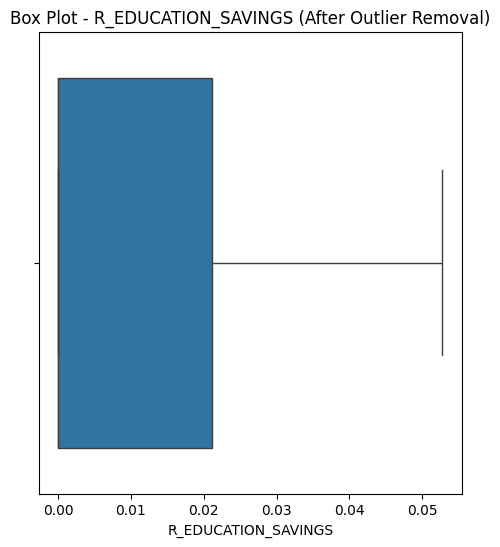

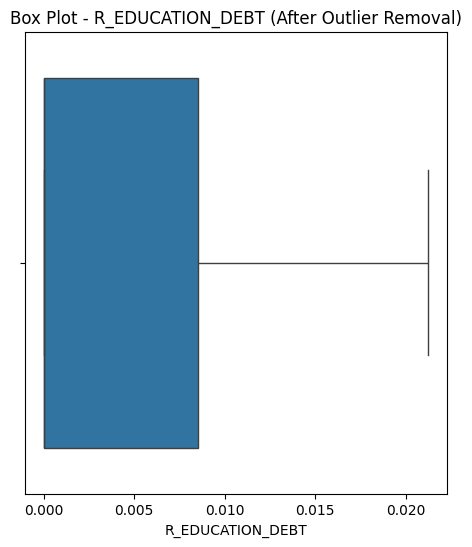

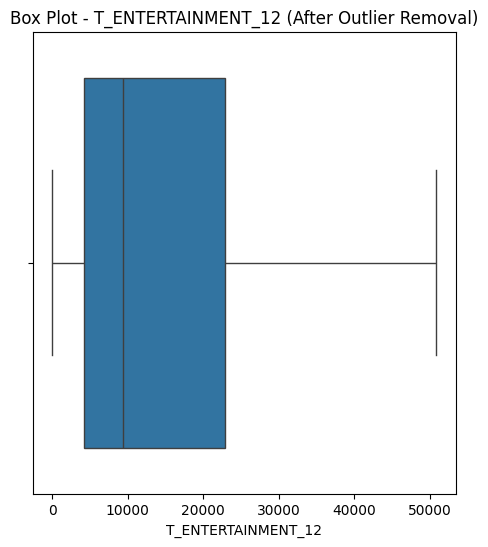

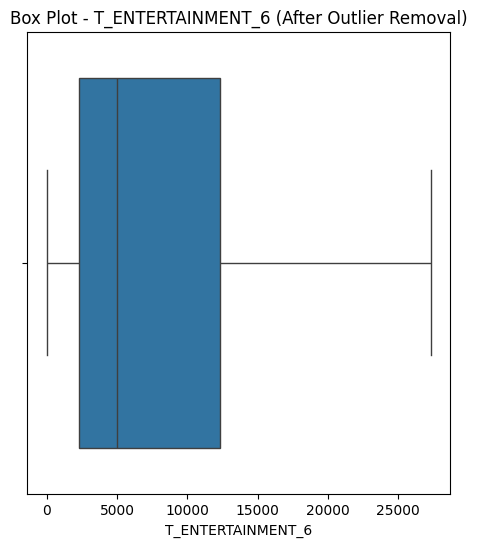

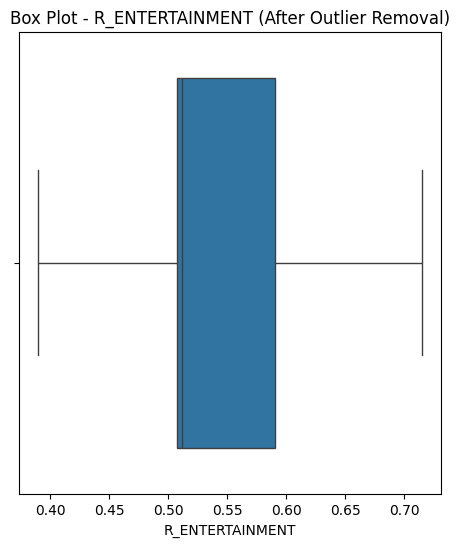

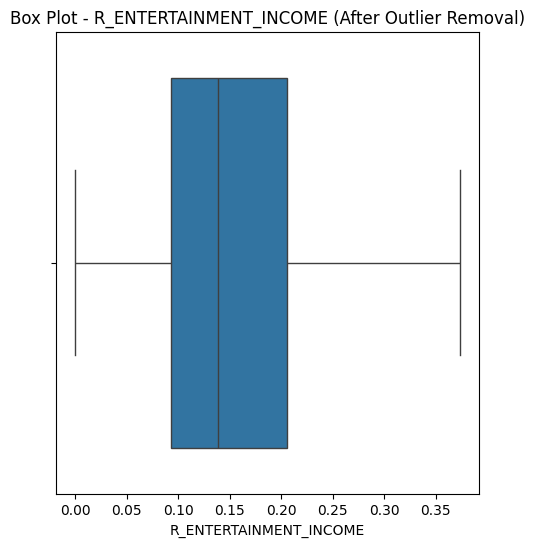

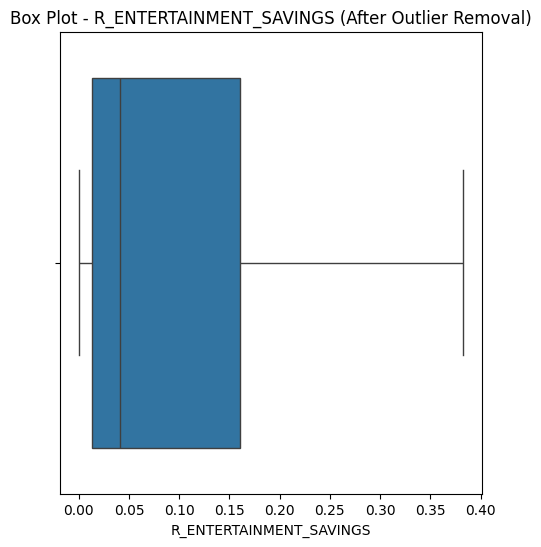

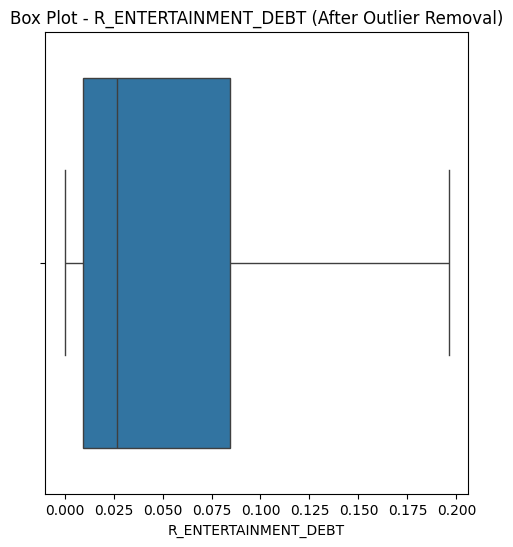

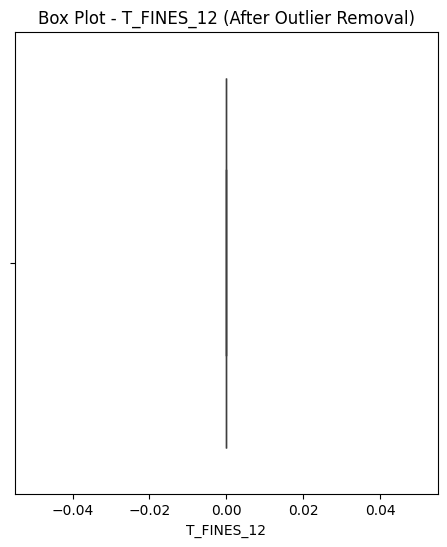

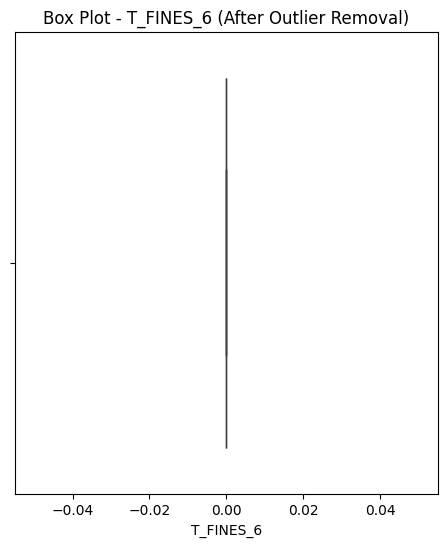

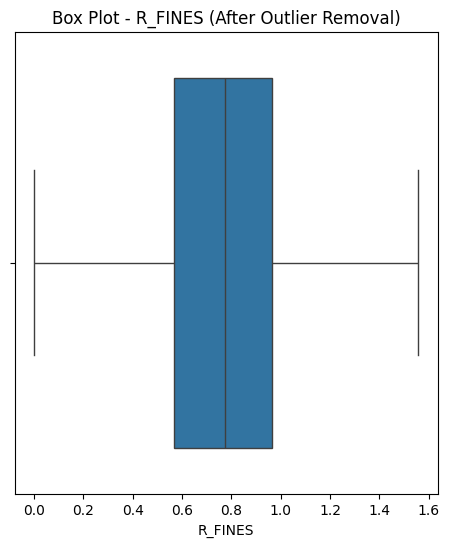

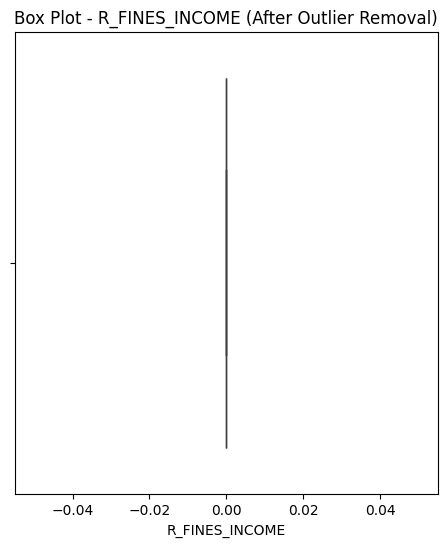

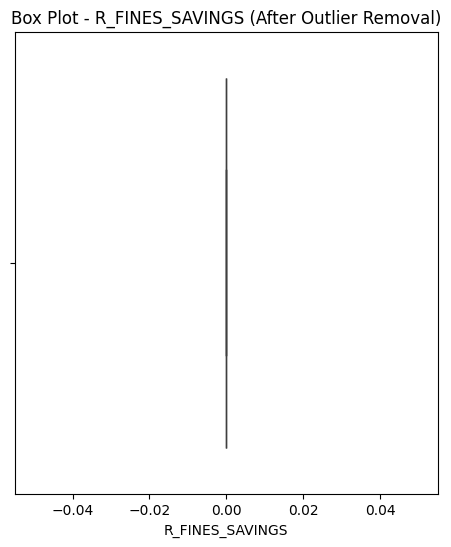

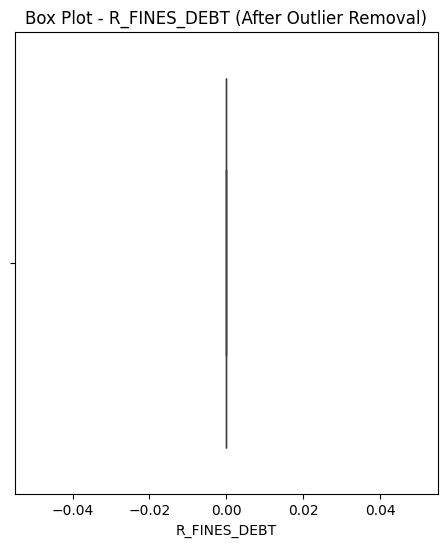

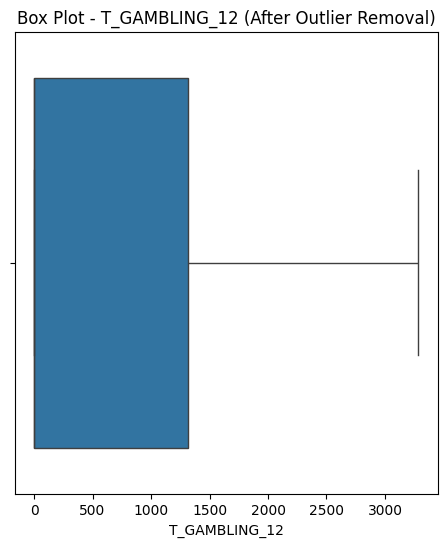

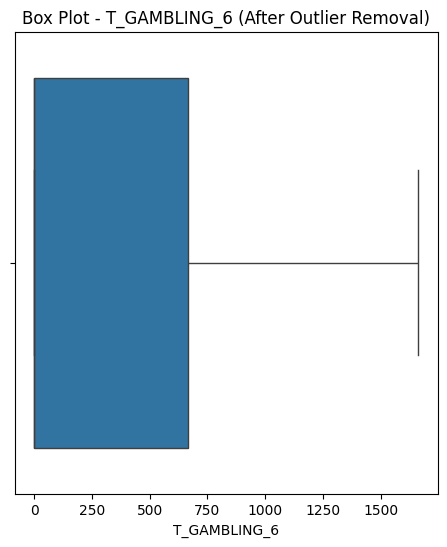

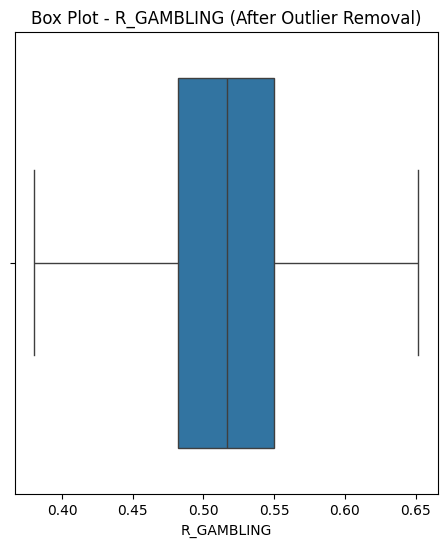

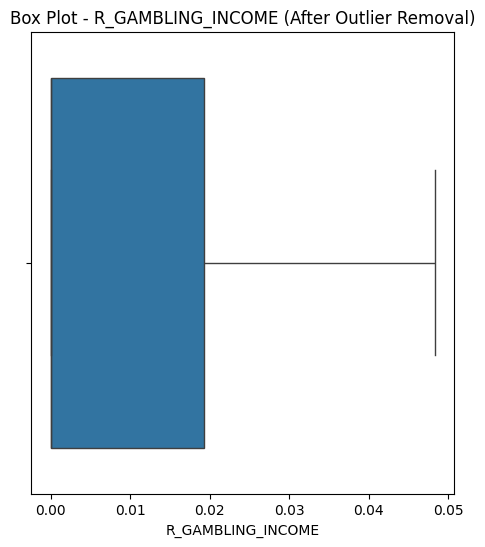

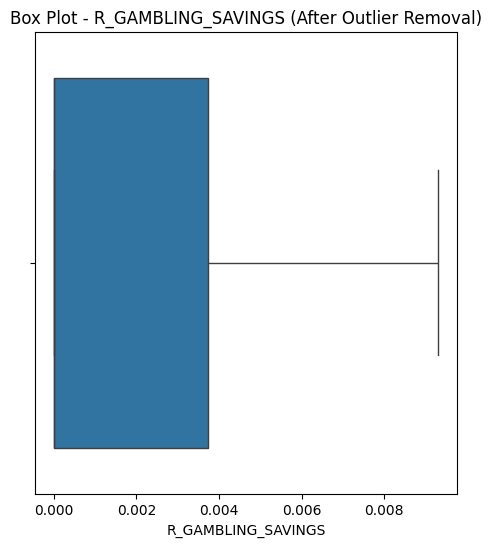

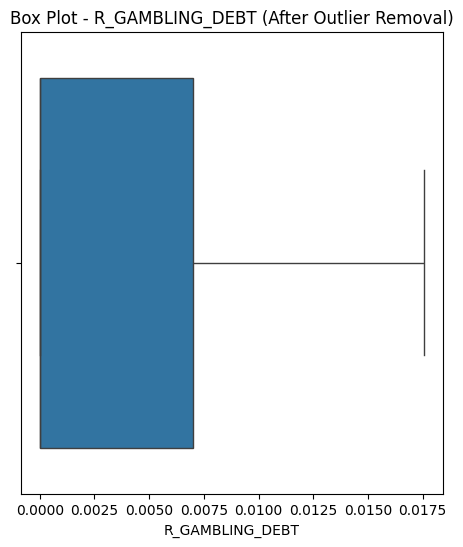

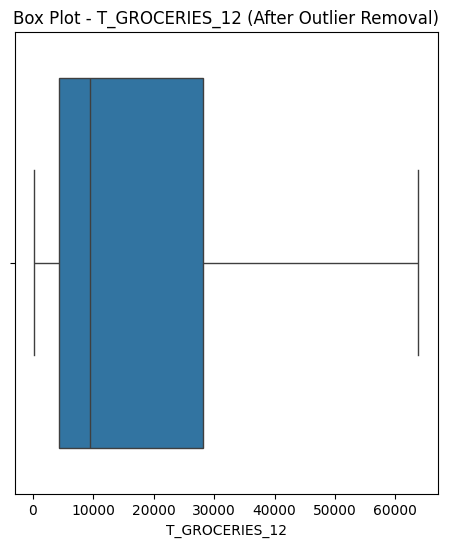

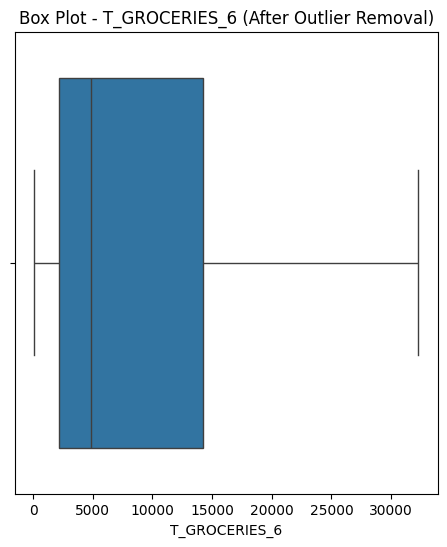

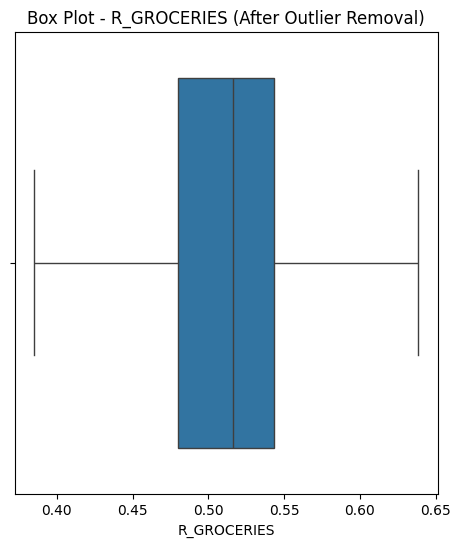

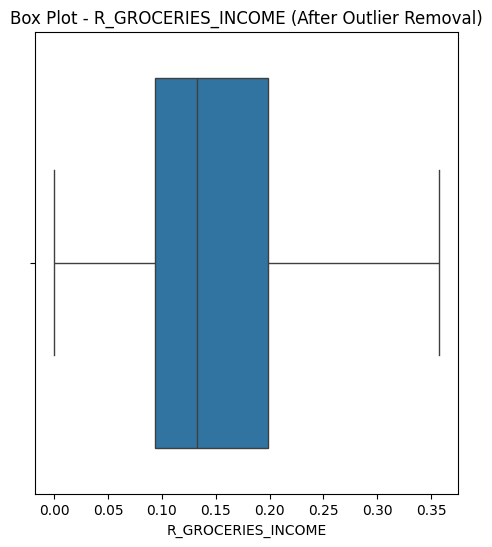

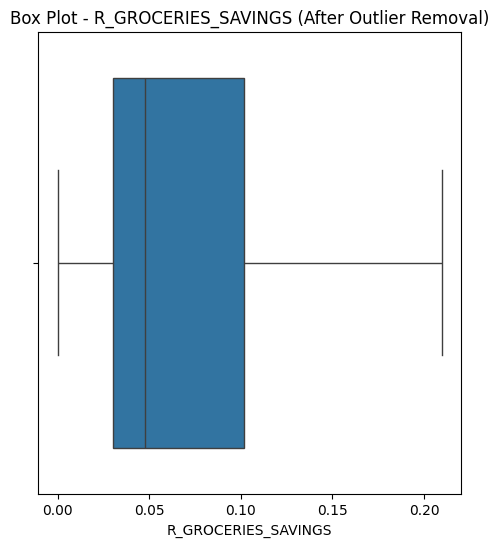

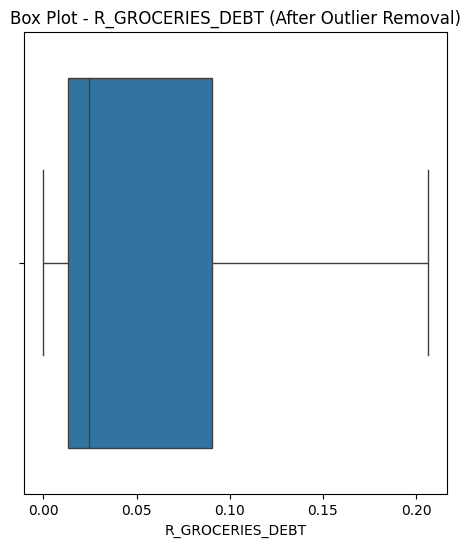

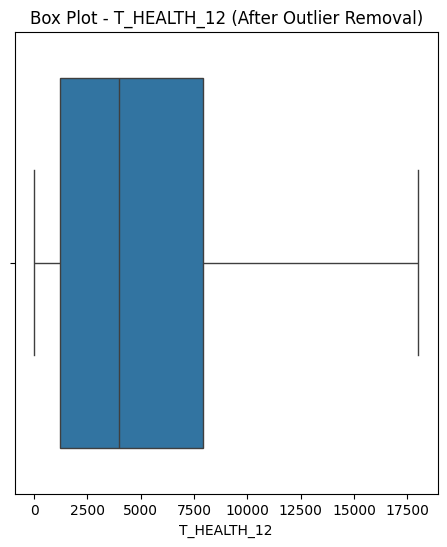

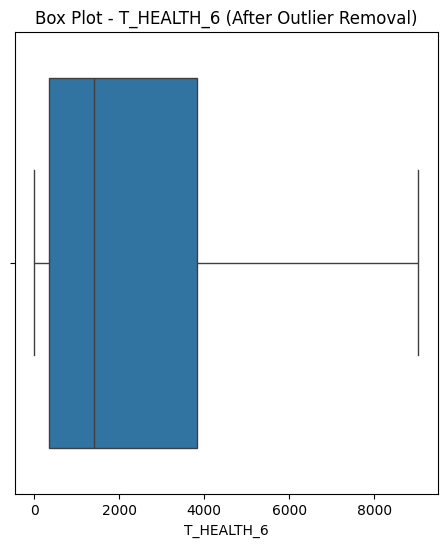

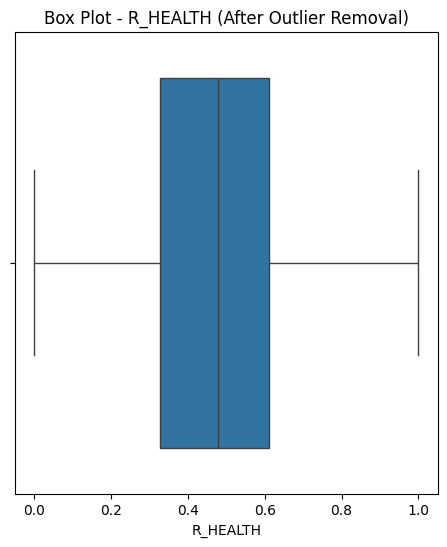

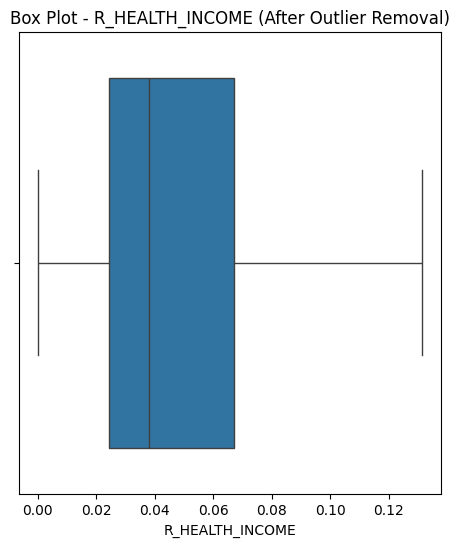

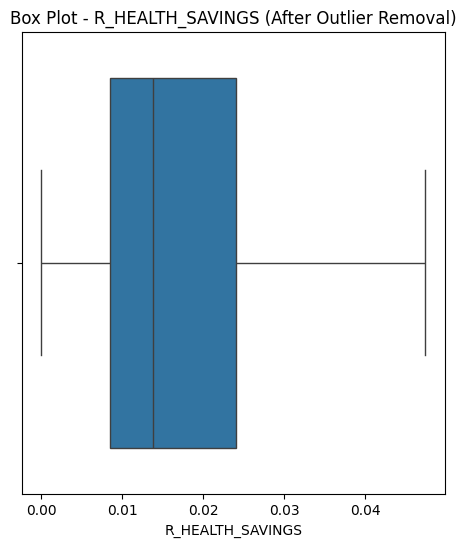

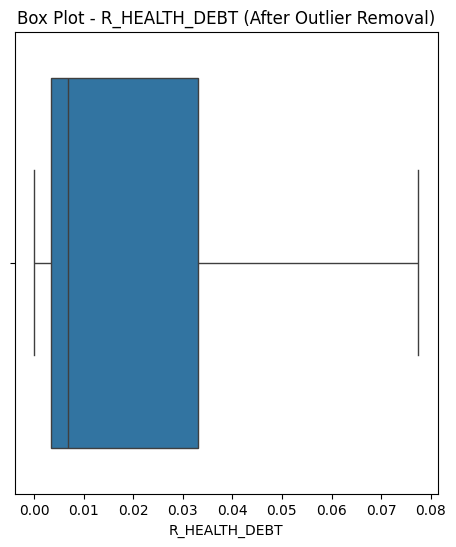

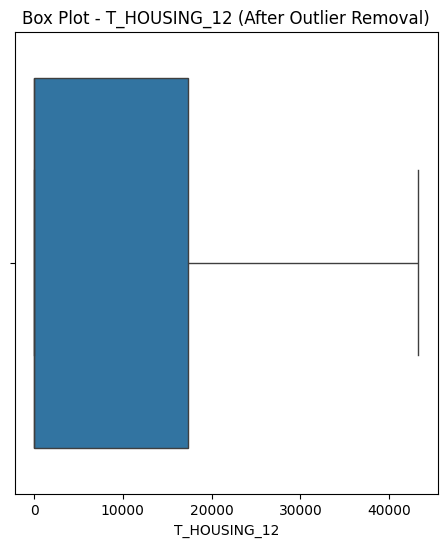

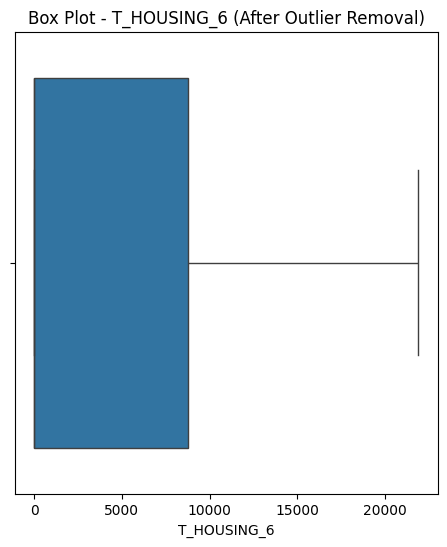

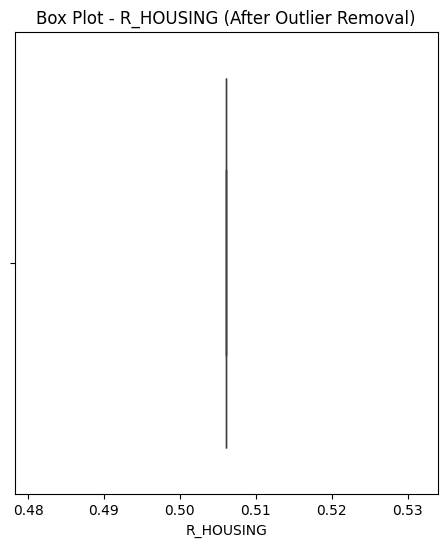

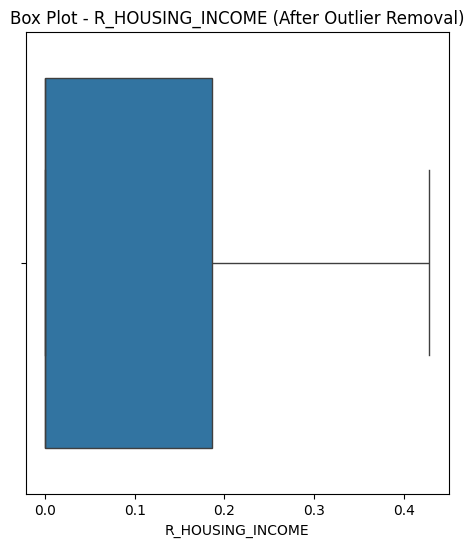

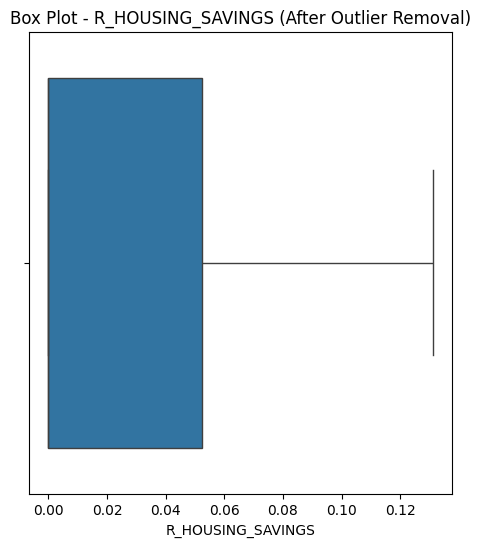

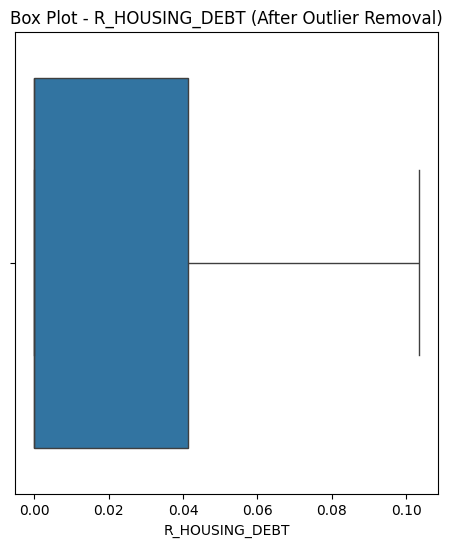

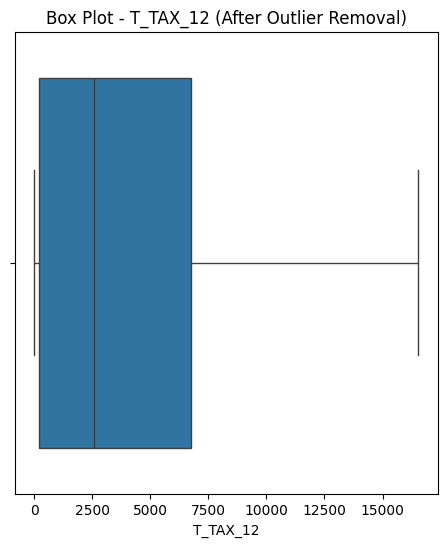

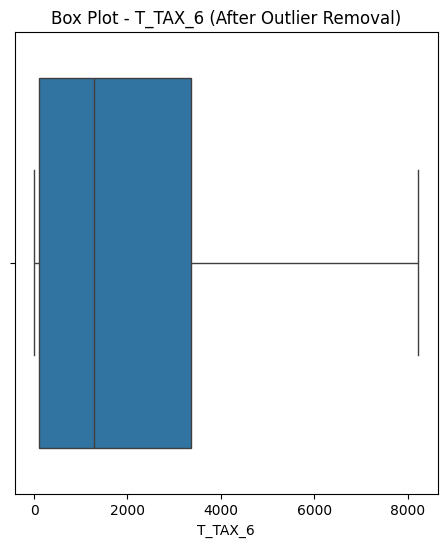

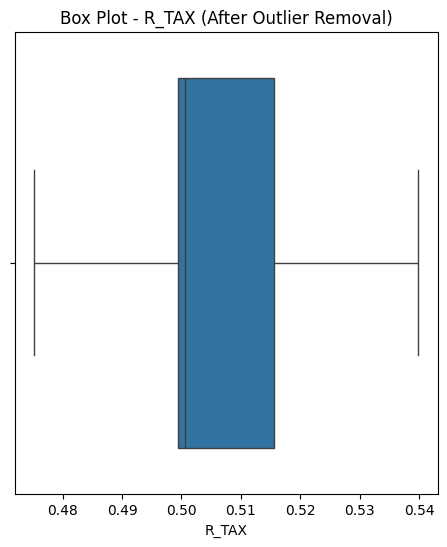

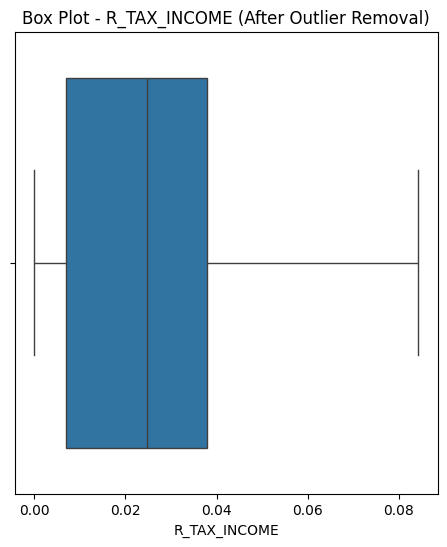

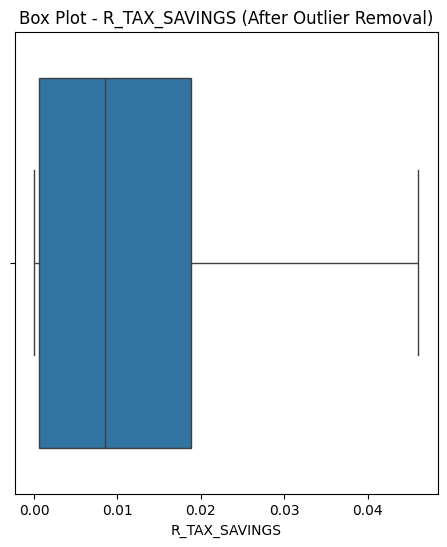

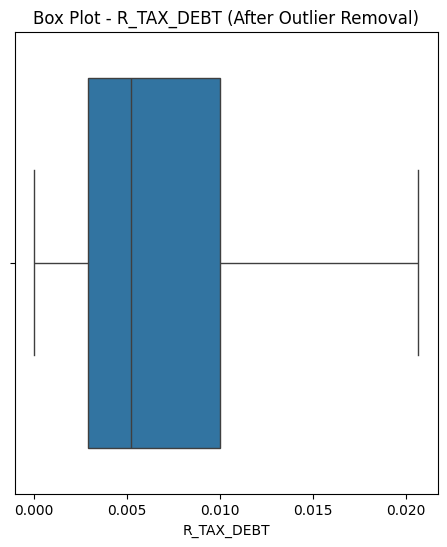

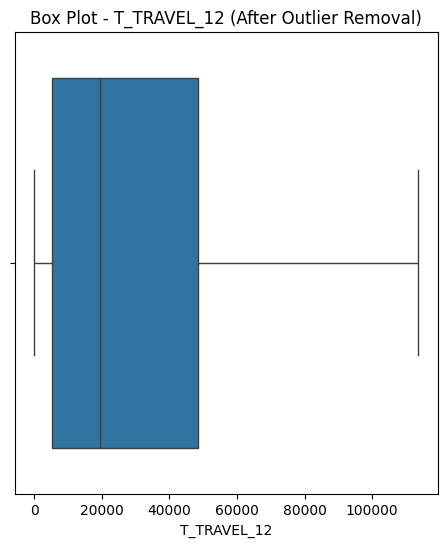

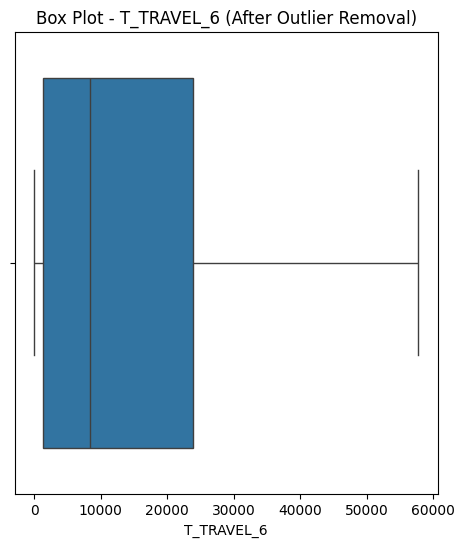

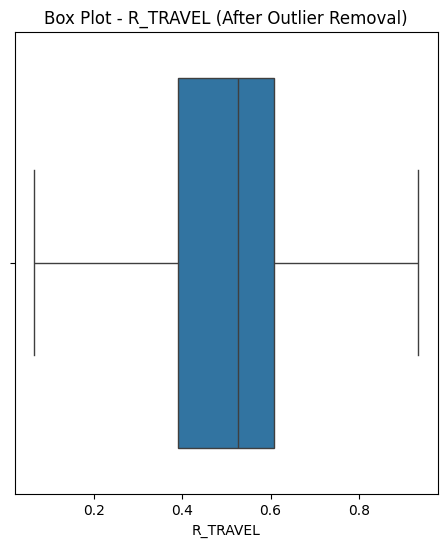

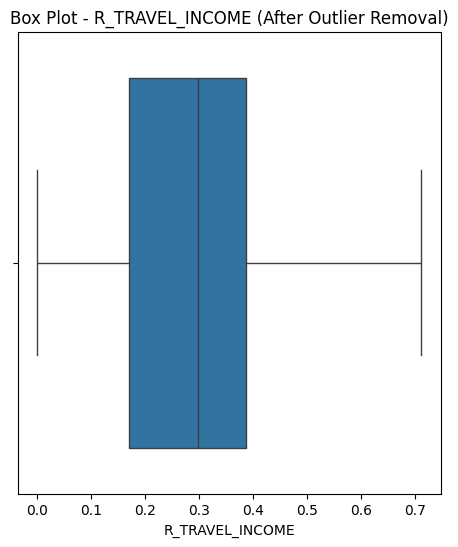

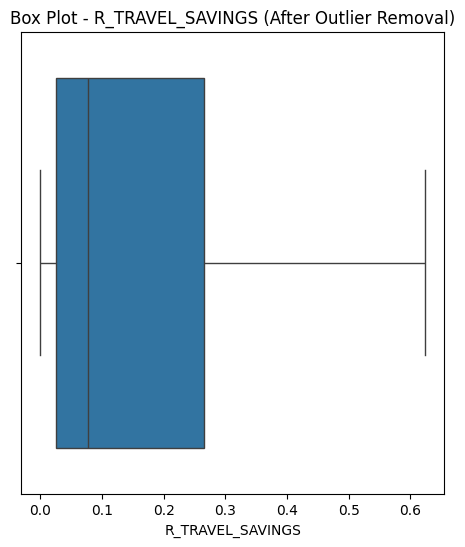

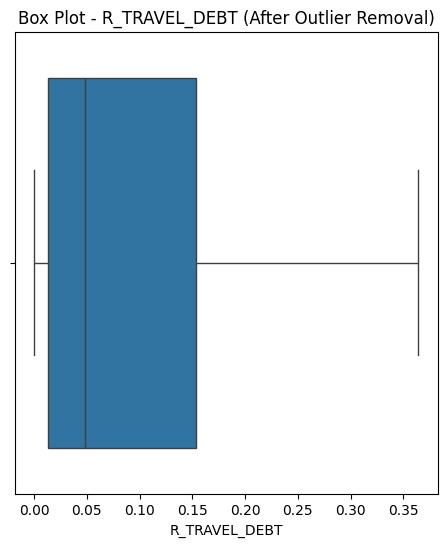

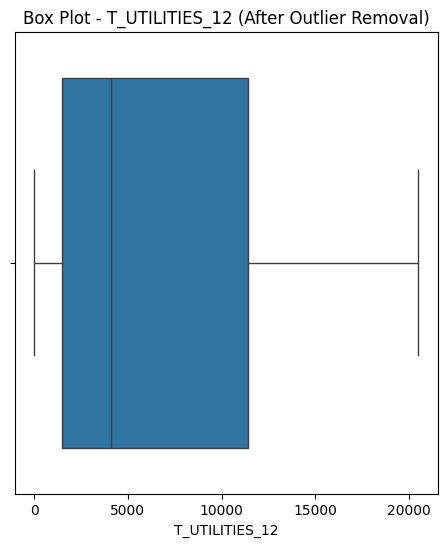

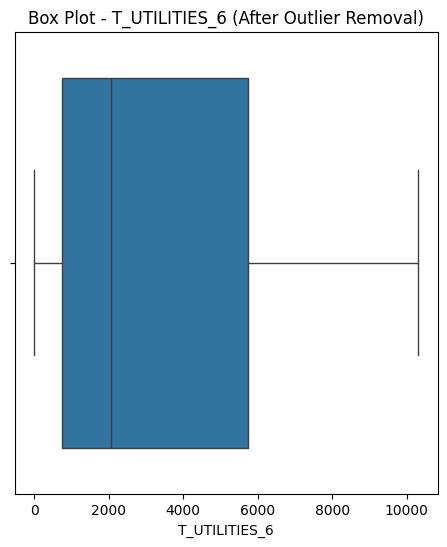

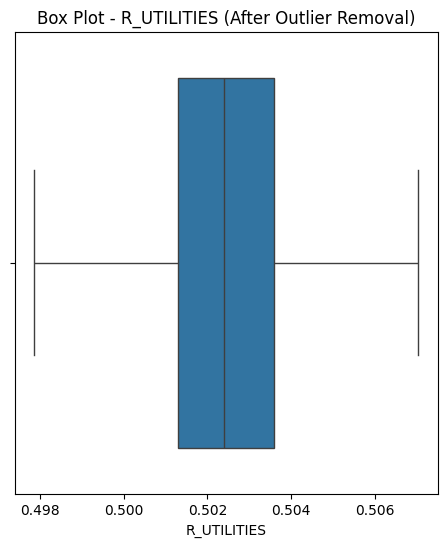

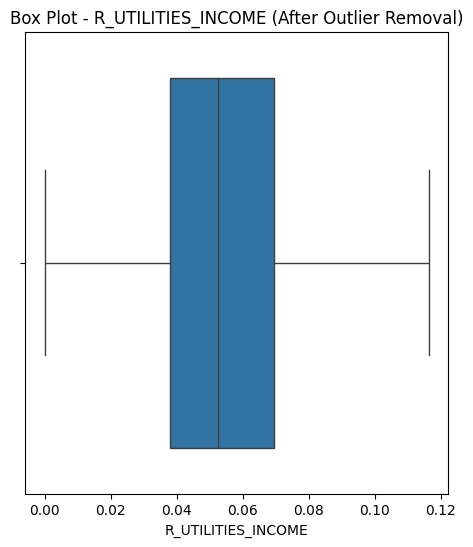

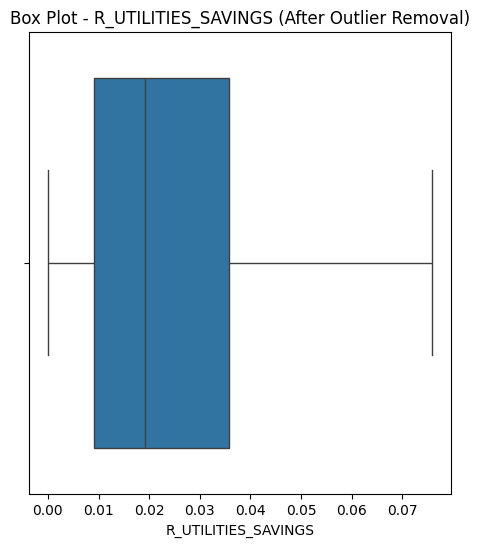

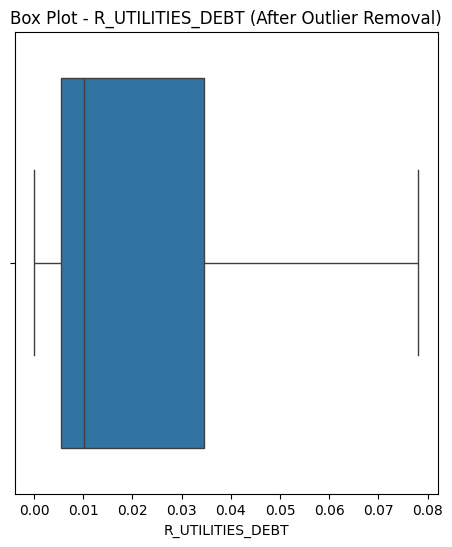

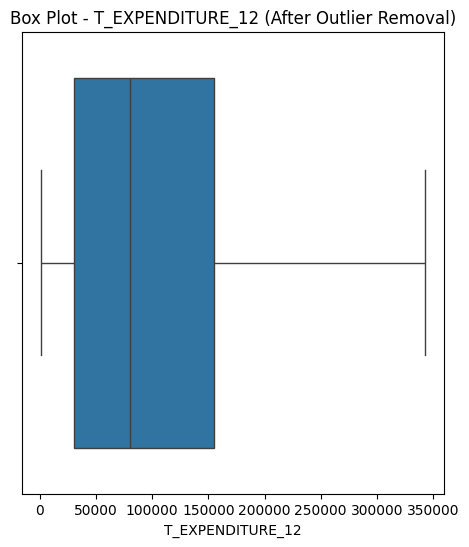

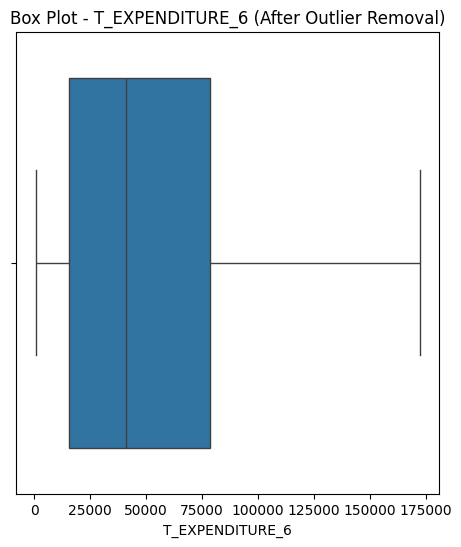

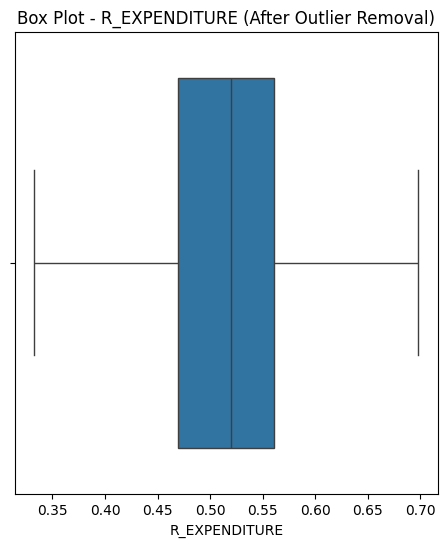

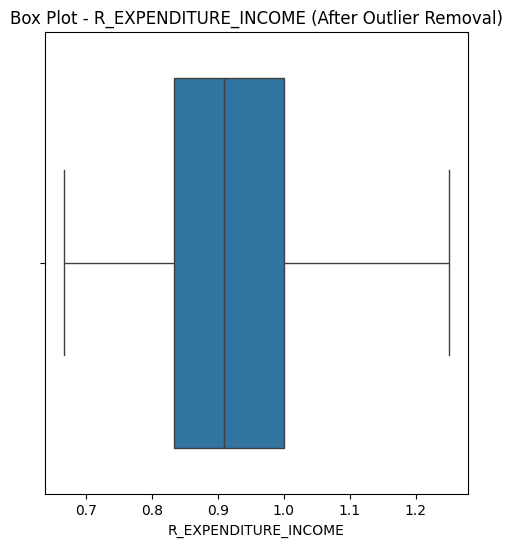

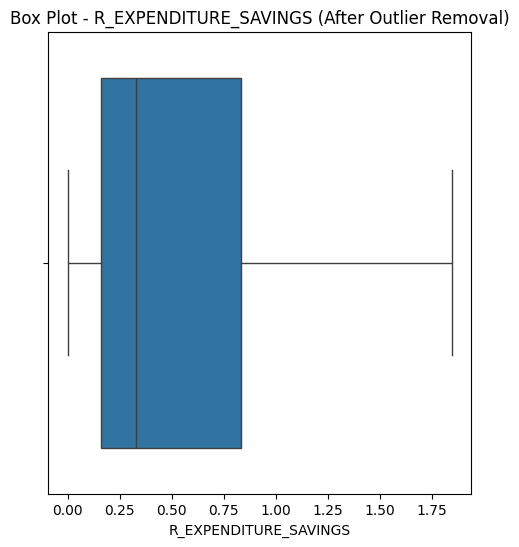

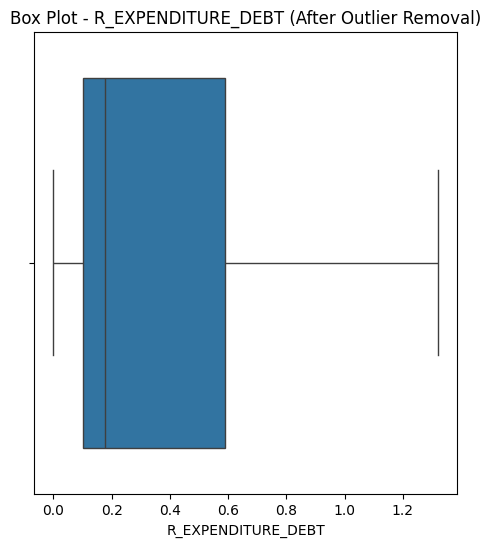

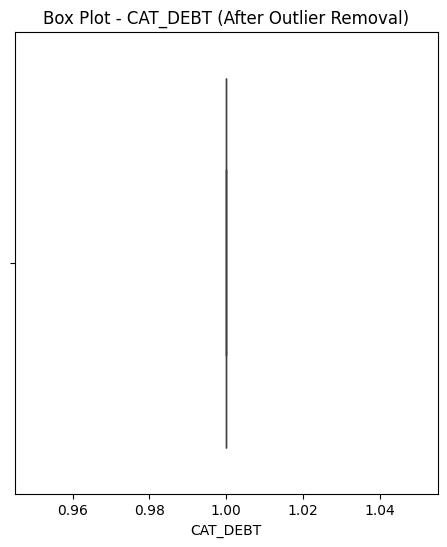

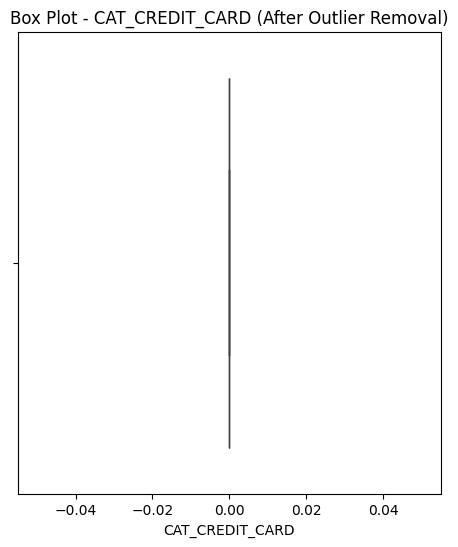

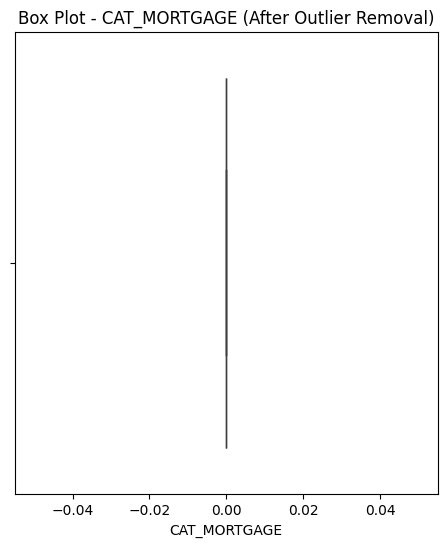

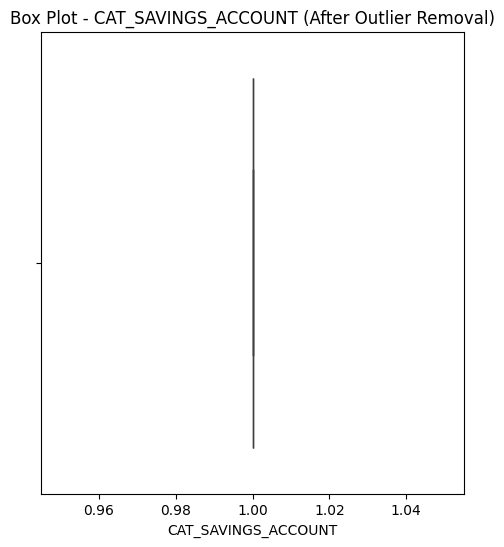

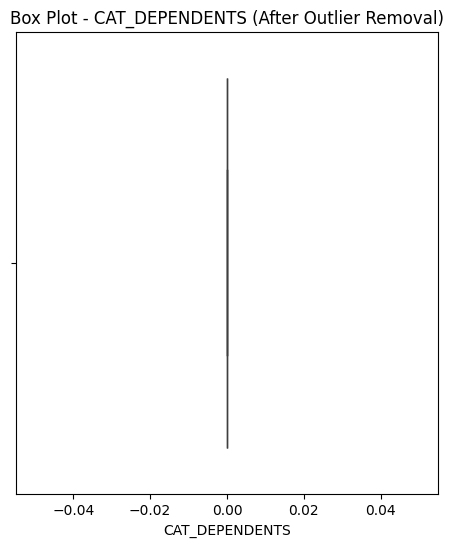

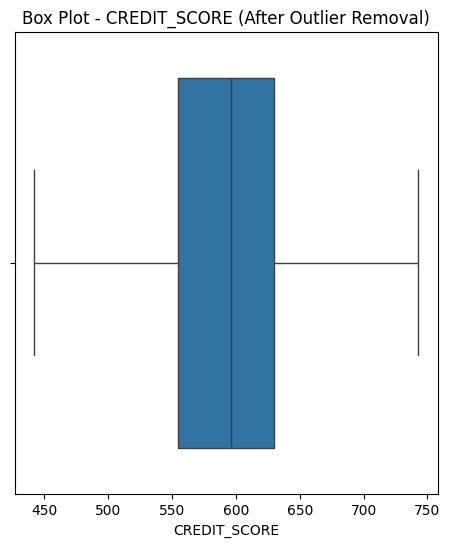

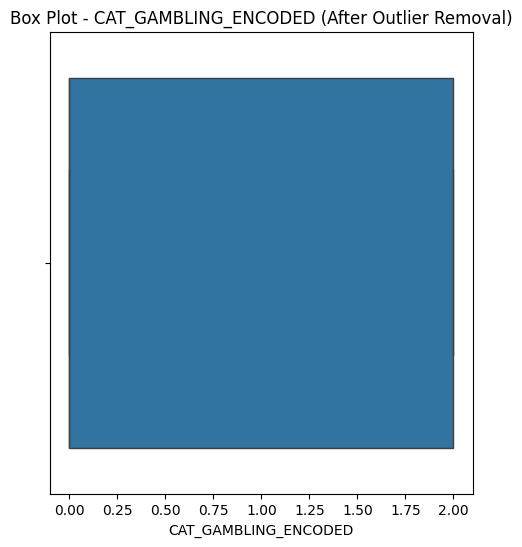

In [11]:

columns_to_check = df.columns.drop('DEFAULT')
for col in columns_to_check:
    plt.figure(figsize=(12, 6))

    # Box plot after outlier removal
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Box Plot - {col} (After Outlier Removal)')

    plt.show()


<Figure size 800x500 with 0 Axes>

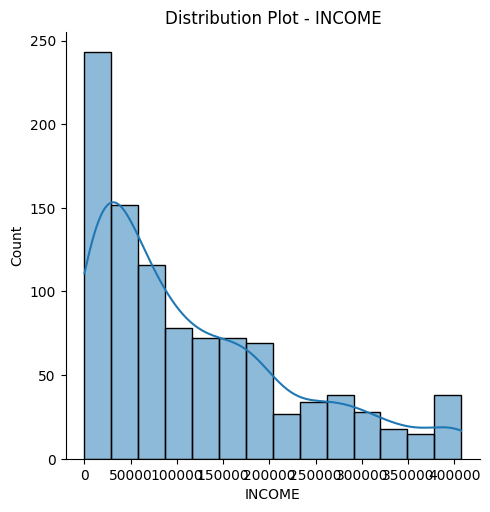

<Figure size 800x500 with 0 Axes>

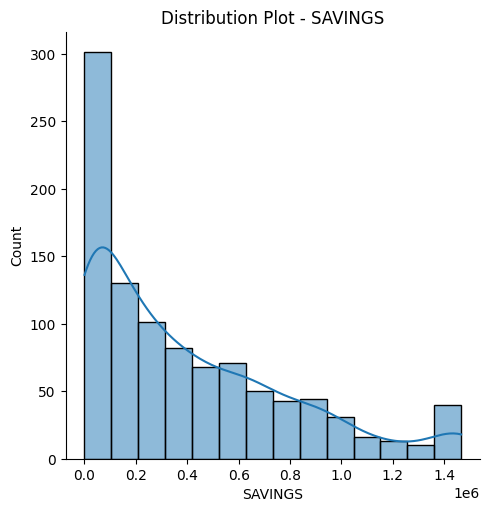

<Figure size 800x500 with 0 Axes>

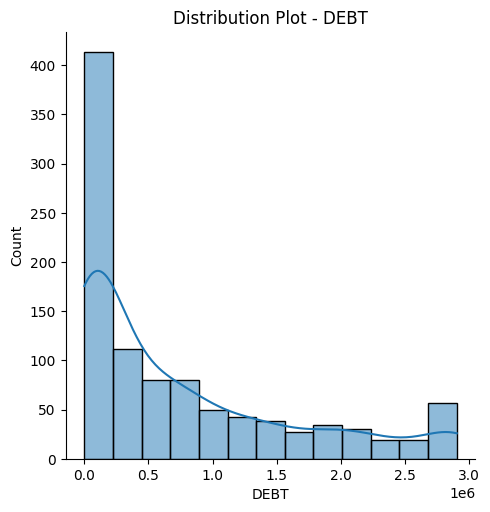

<Figure size 800x500 with 0 Axes>

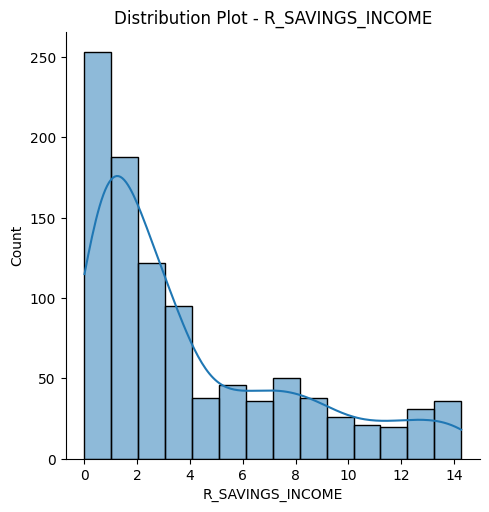

<Figure size 800x500 with 0 Axes>

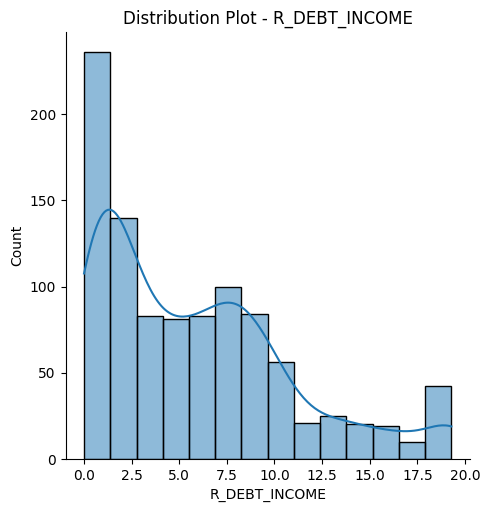

<Figure size 800x500 with 0 Axes>

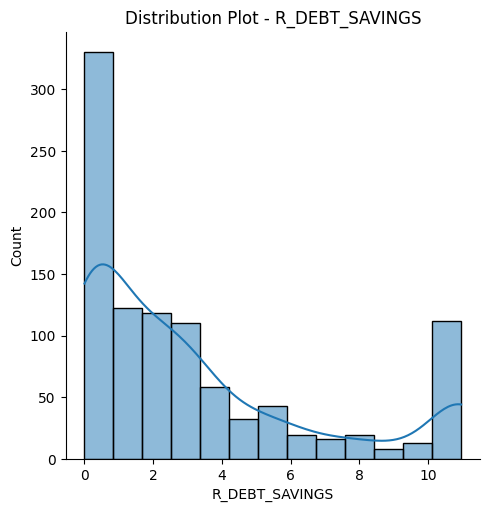

<Figure size 800x500 with 0 Axes>

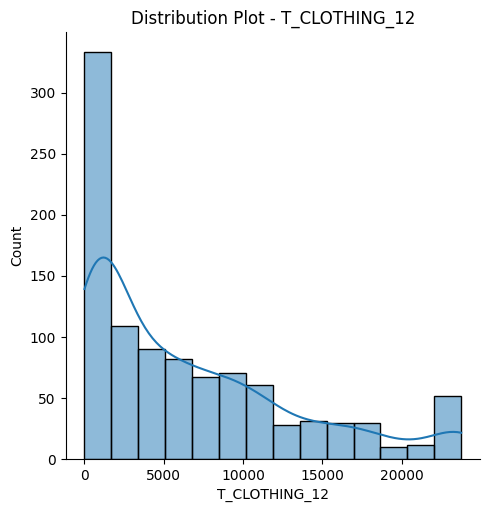

<Figure size 800x500 with 0 Axes>

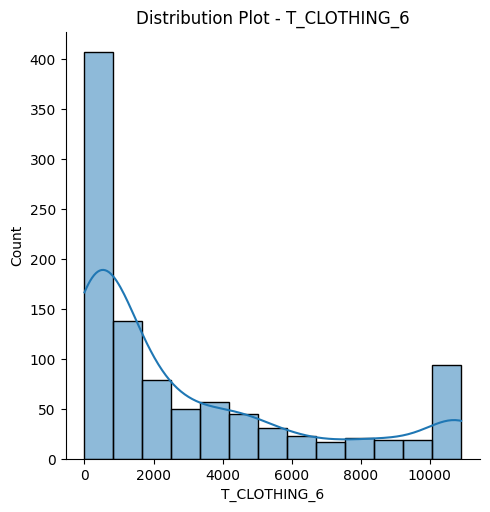

<Figure size 800x500 with 0 Axes>

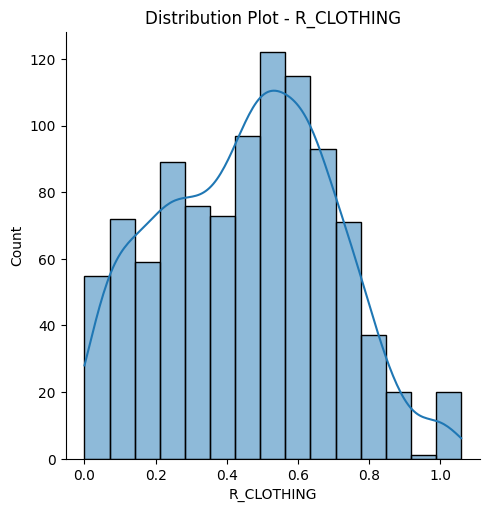

<Figure size 800x500 with 0 Axes>

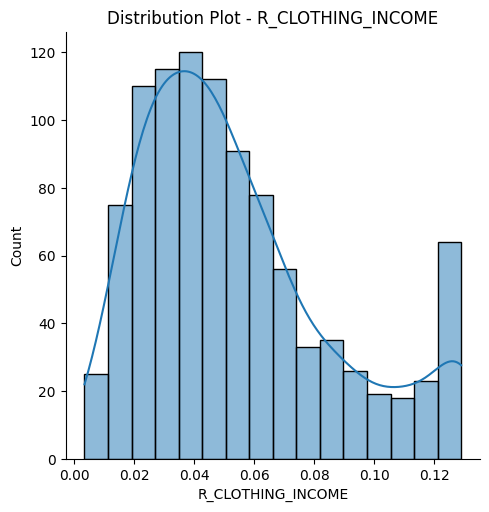

<Figure size 800x500 with 0 Axes>

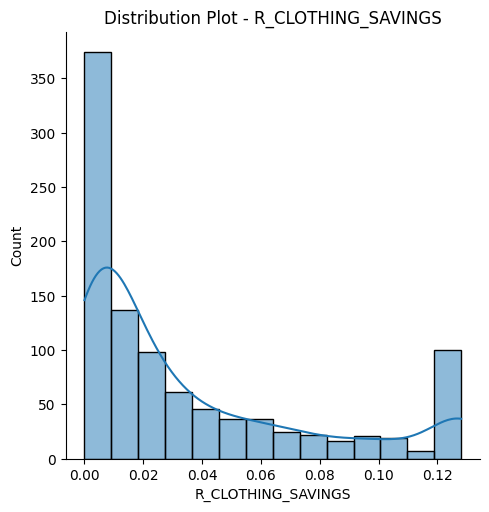

<Figure size 800x500 with 0 Axes>

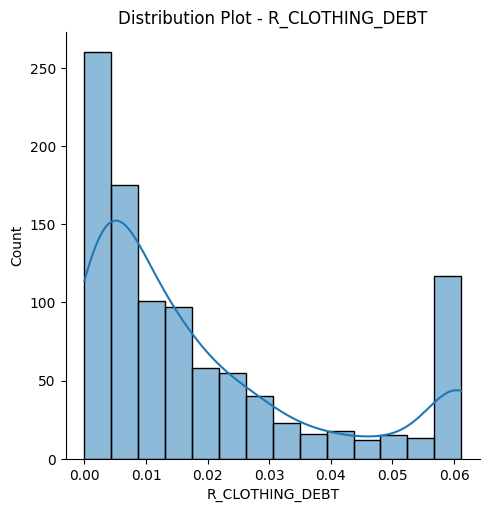

<Figure size 800x500 with 0 Axes>

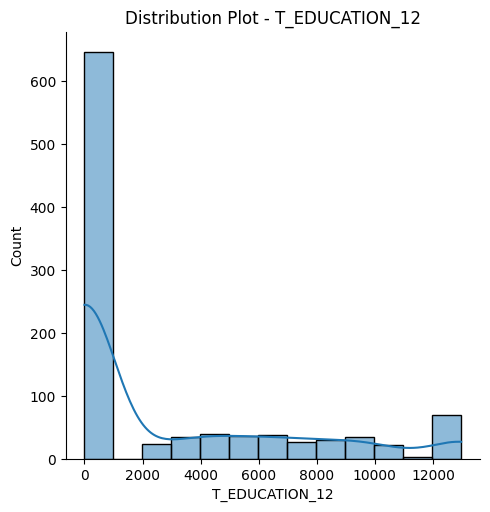

<Figure size 800x500 with 0 Axes>

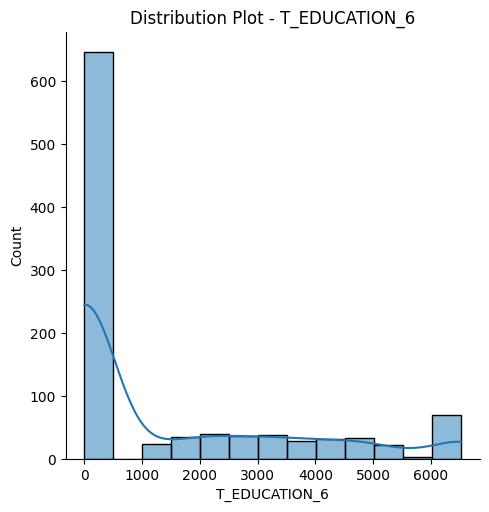

<Figure size 800x500 with 0 Axes>

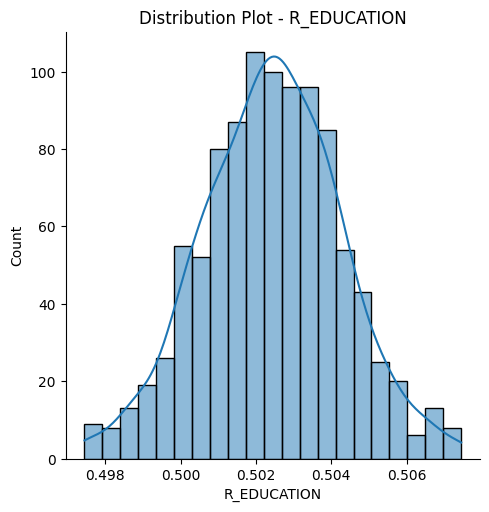

<Figure size 800x500 with 0 Axes>

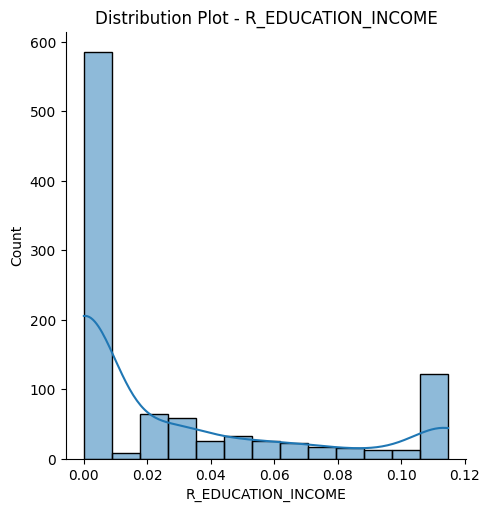

<Figure size 800x500 with 0 Axes>

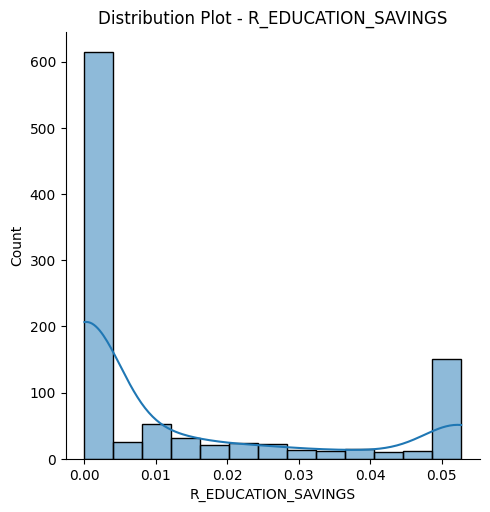

<Figure size 800x500 with 0 Axes>

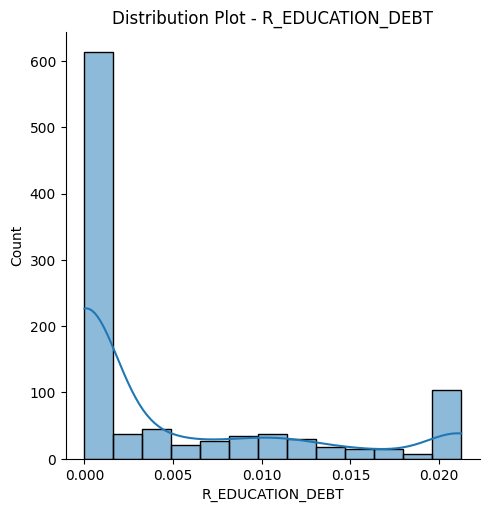

<Figure size 800x500 with 0 Axes>

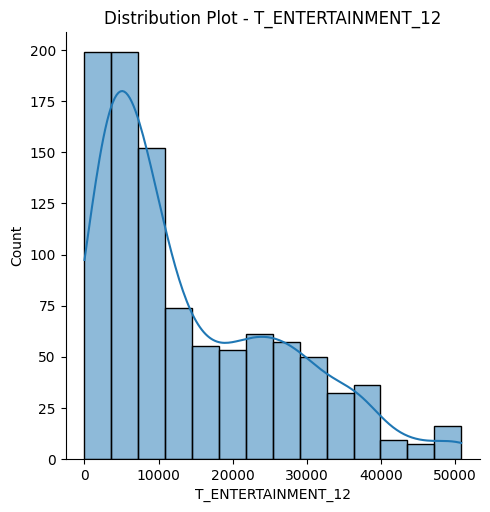

<Figure size 800x500 with 0 Axes>

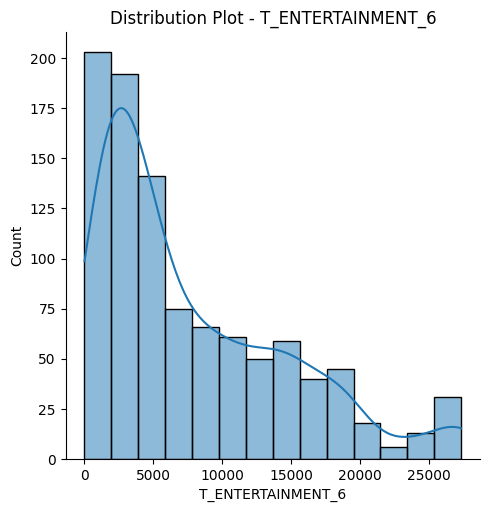

<Figure size 800x500 with 0 Axes>

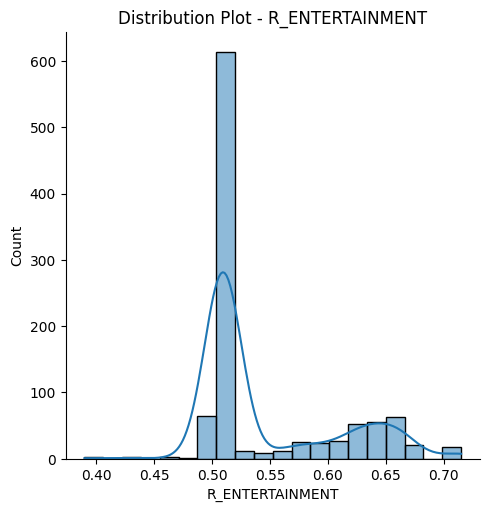

<Figure size 800x500 with 0 Axes>

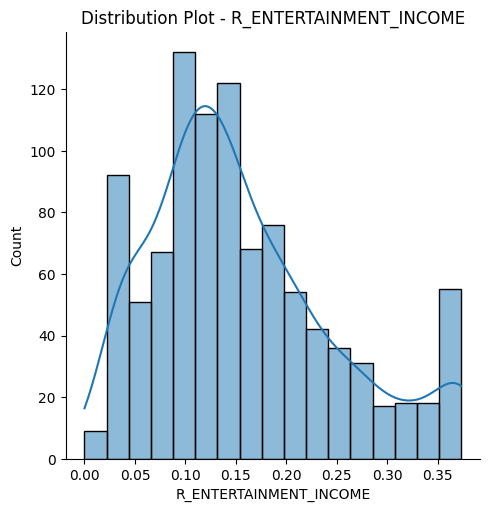

<Figure size 800x500 with 0 Axes>

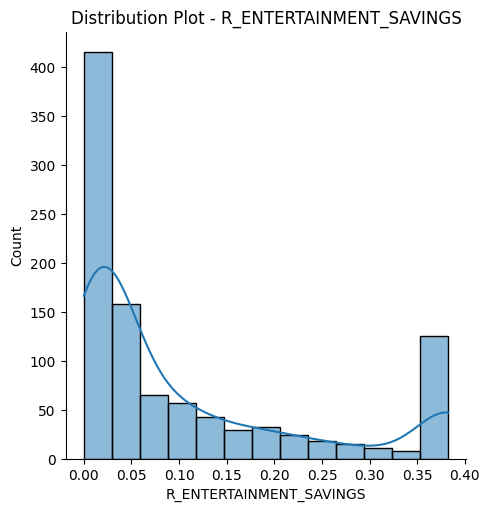

<Figure size 800x500 with 0 Axes>

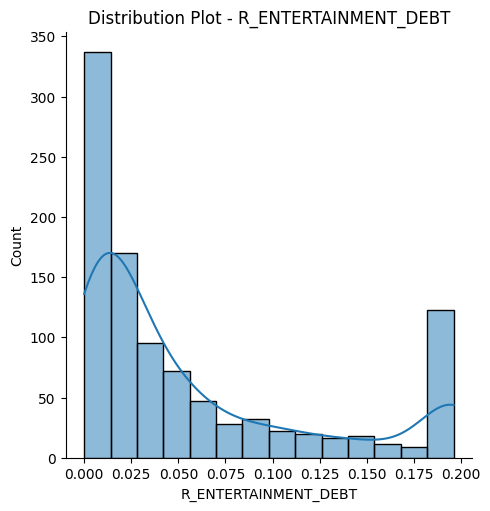

<Figure size 800x500 with 0 Axes>

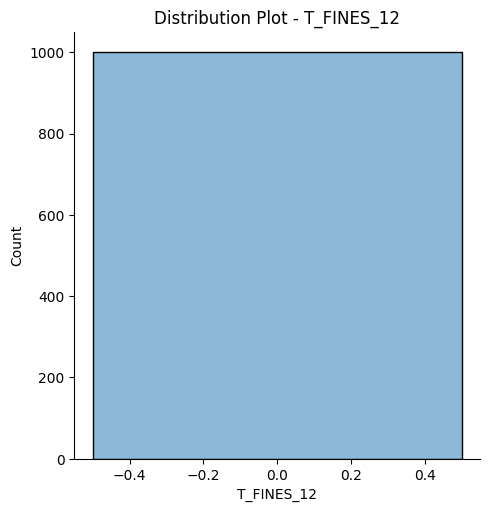

<Figure size 800x500 with 0 Axes>

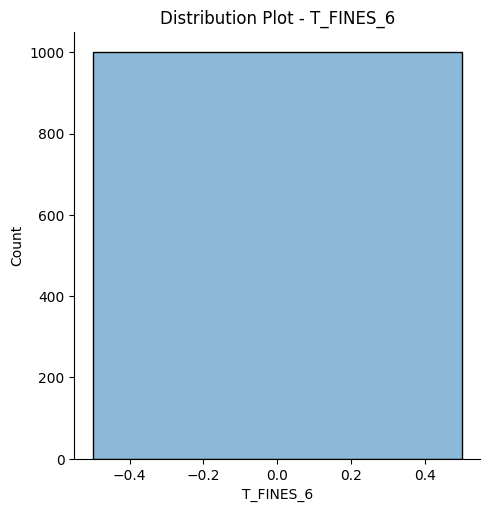

<Figure size 800x500 with 0 Axes>

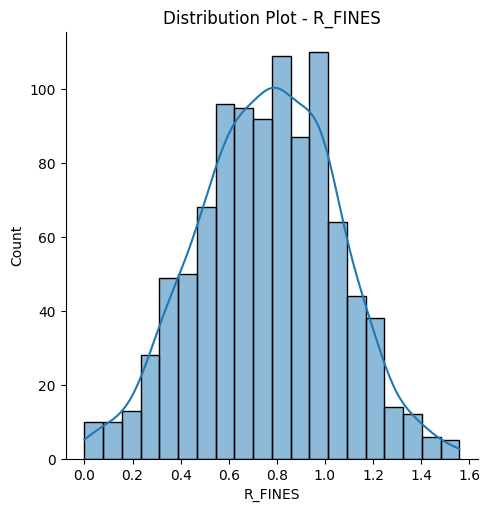

<Figure size 800x500 with 0 Axes>

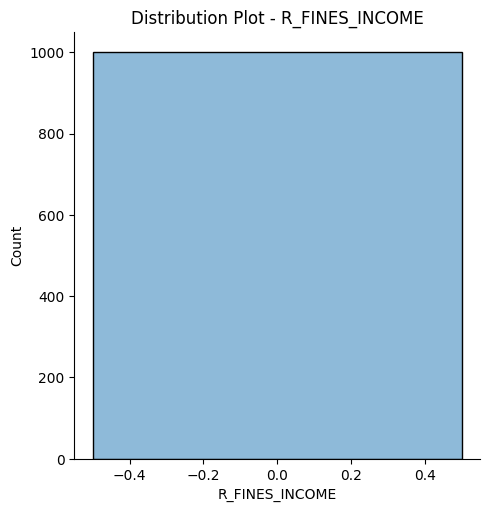

<Figure size 800x500 with 0 Axes>

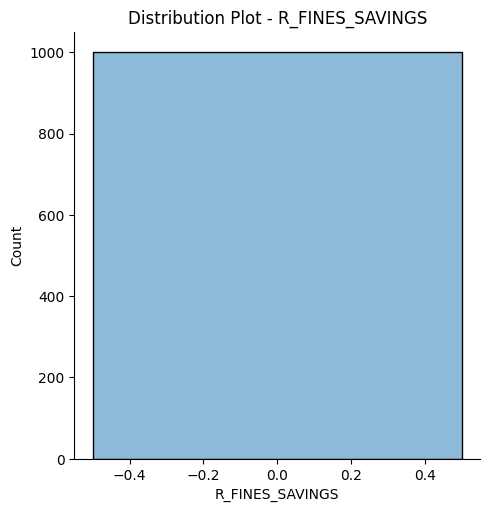

<Figure size 800x500 with 0 Axes>

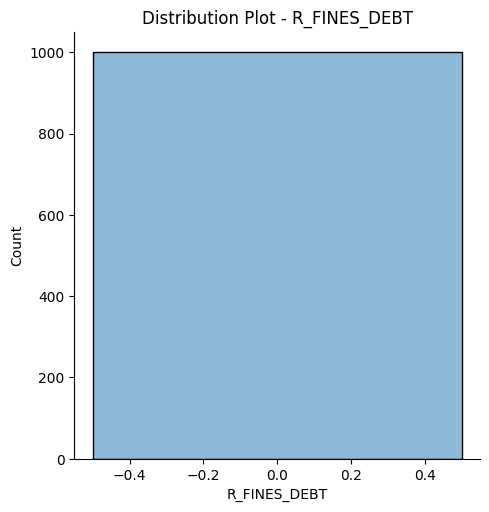

<Figure size 800x500 with 0 Axes>

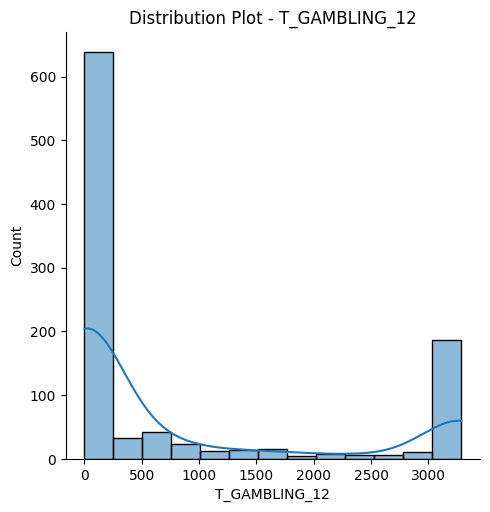

<Figure size 800x500 with 0 Axes>

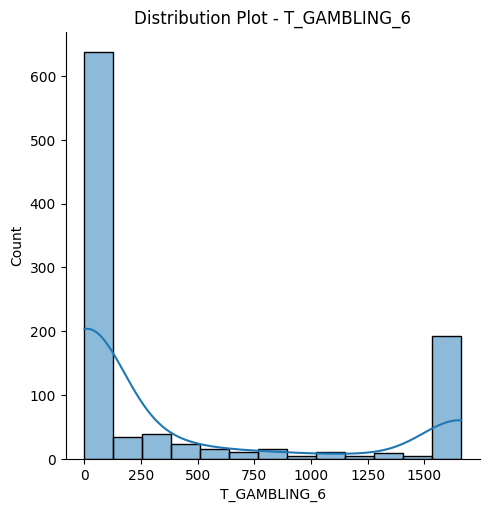

<Figure size 800x500 with 0 Axes>

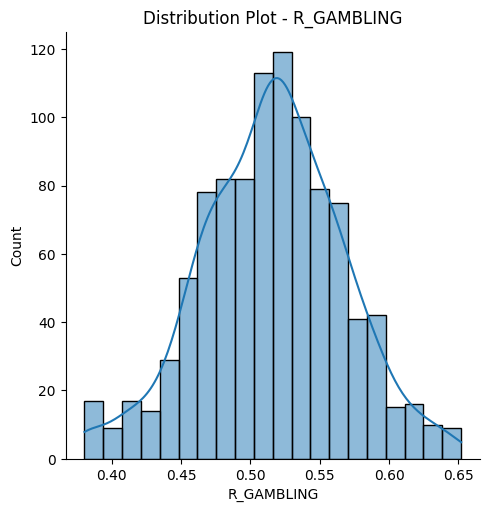

<Figure size 800x500 with 0 Axes>

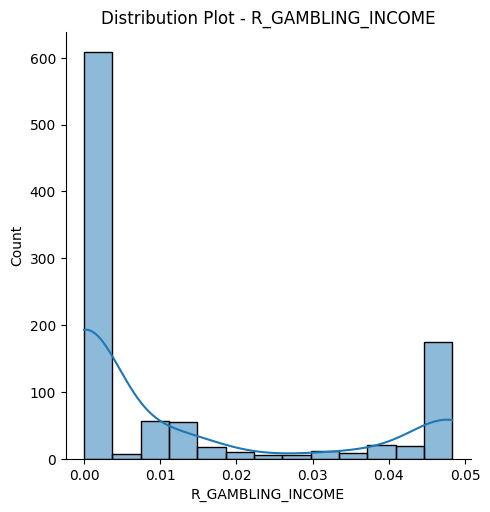

<Figure size 800x500 with 0 Axes>

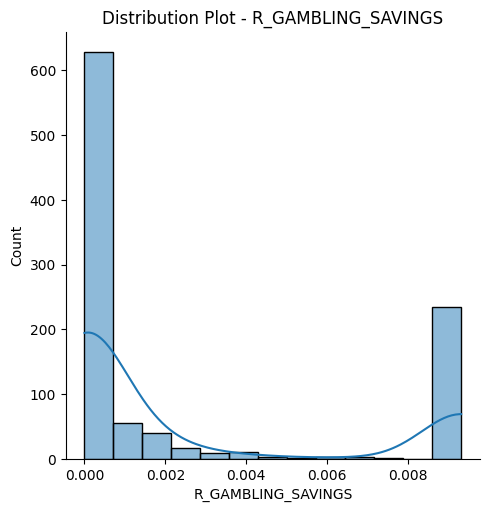

<Figure size 800x500 with 0 Axes>

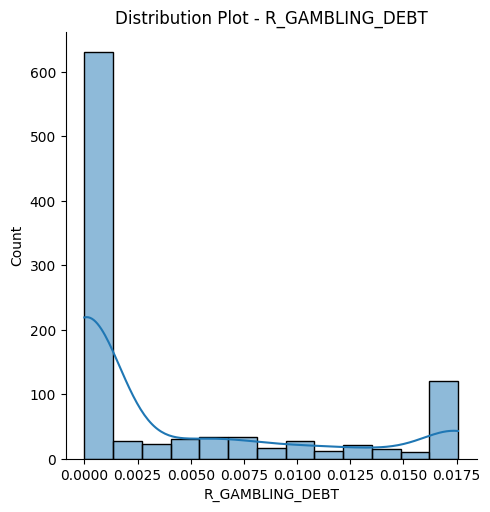

<Figure size 800x500 with 0 Axes>

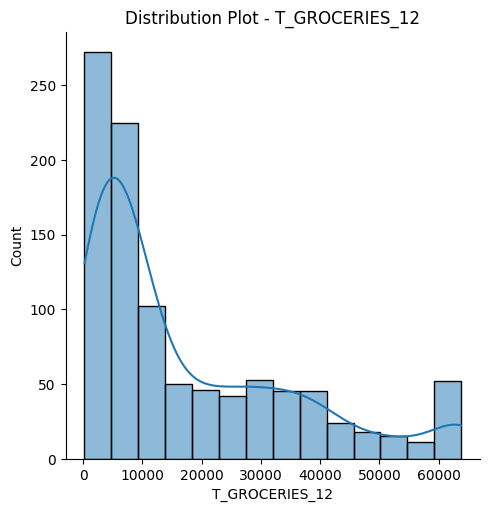

<Figure size 800x500 with 0 Axes>

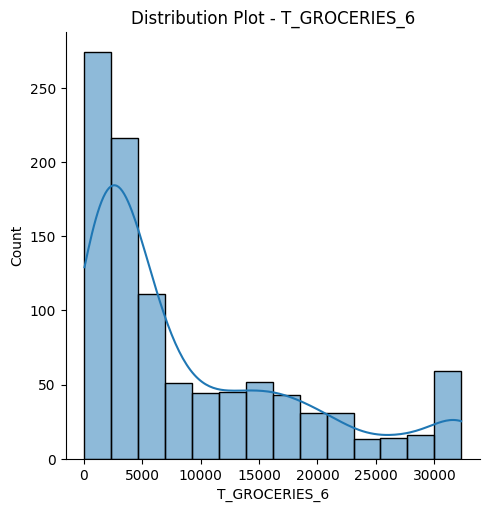

<Figure size 800x500 with 0 Axes>

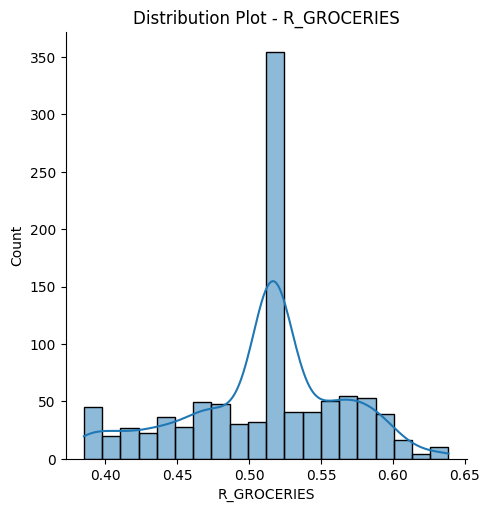

<Figure size 800x500 with 0 Axes>

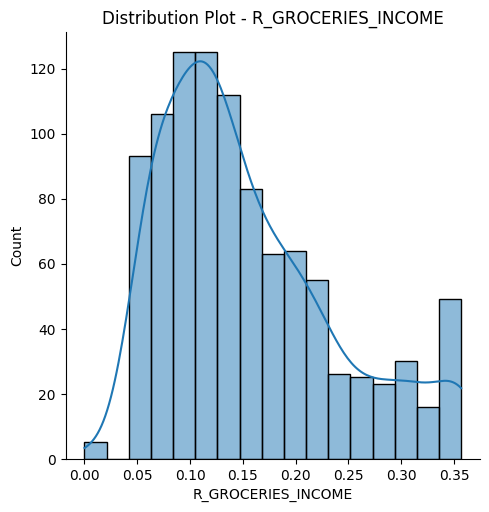

<Figure size 800x500 with 0 Axes>

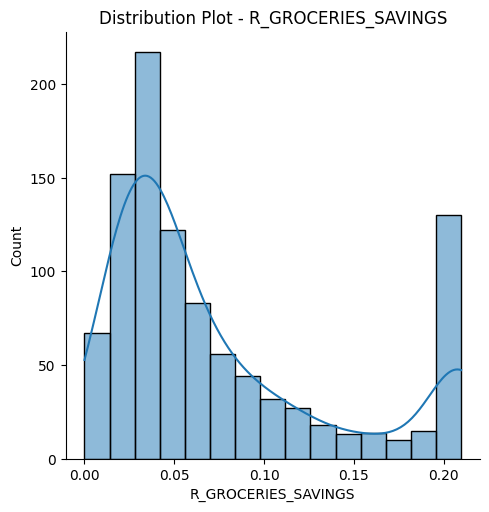

<Figure size 800x500 with 0 Axes>

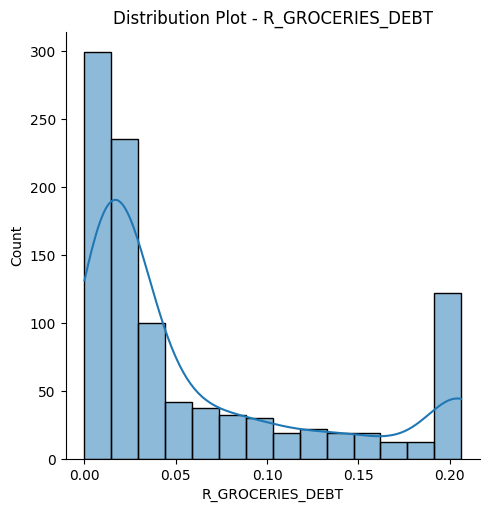

<Figure size 800x500 with 0 Axes>

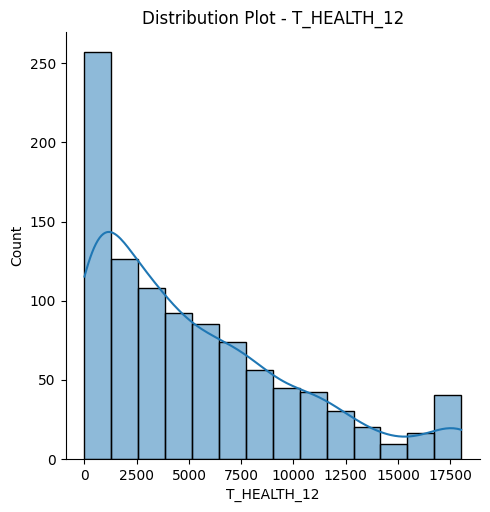

<Figure size 800x500 with 0 Axes>

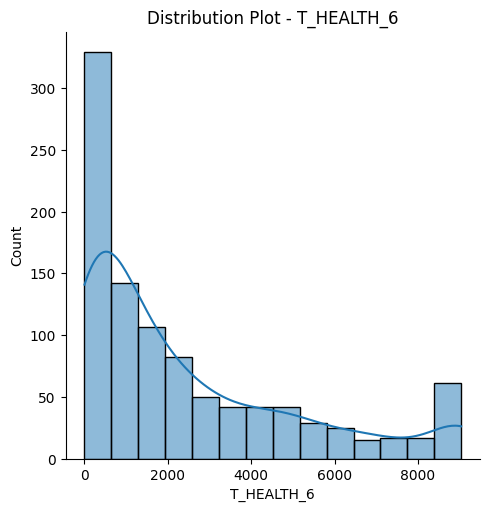

<Figure size 800x500 with 0 Axes>

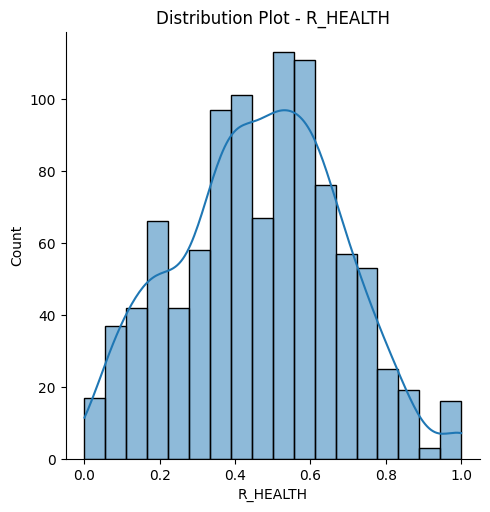

<Figure size 800x500 with 0 Axes>

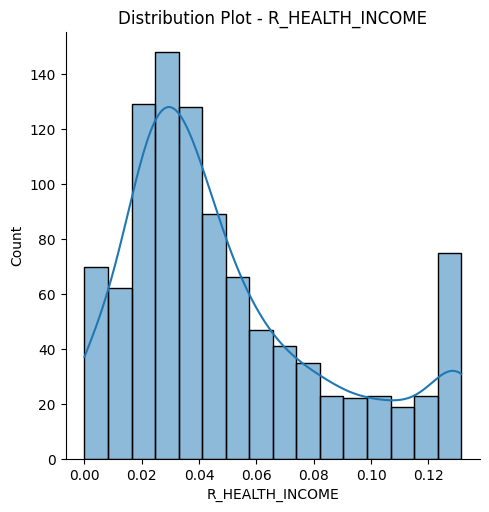

<Figure size 800x500 with 0 Axes>

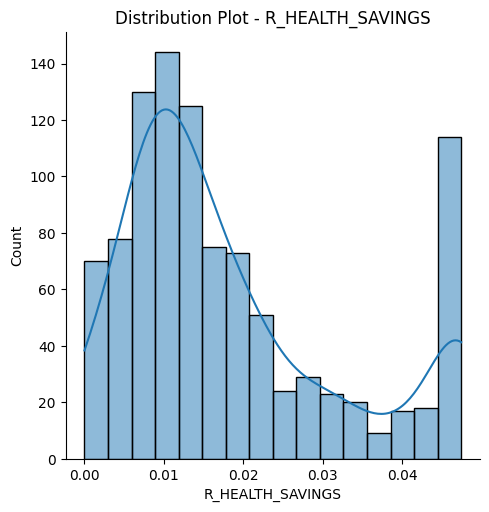

<Figure size 800x500 with 0 Axes>

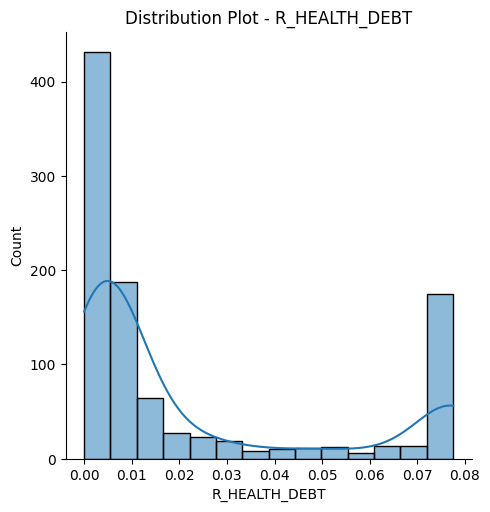

<Figure size 800x500 with 0 Axes>

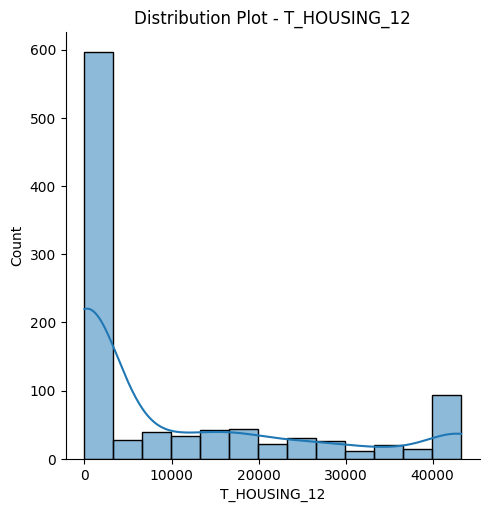

<Figure size 800x500 with 0 Axes>

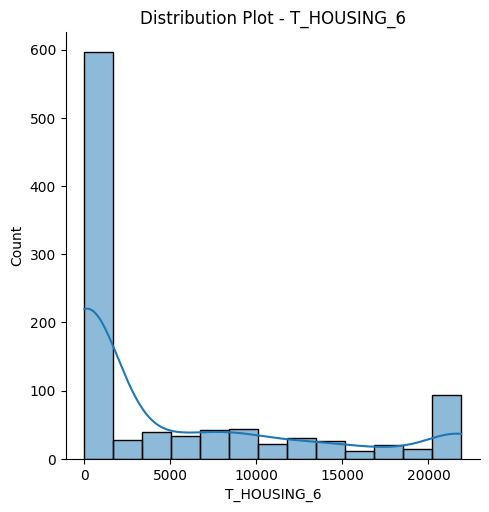

<Figure size 800x500 with 0 Axes>

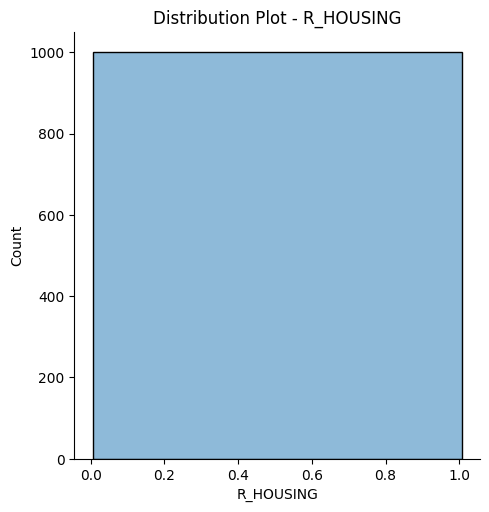

<Figure size 800x500 with 0 Axes>

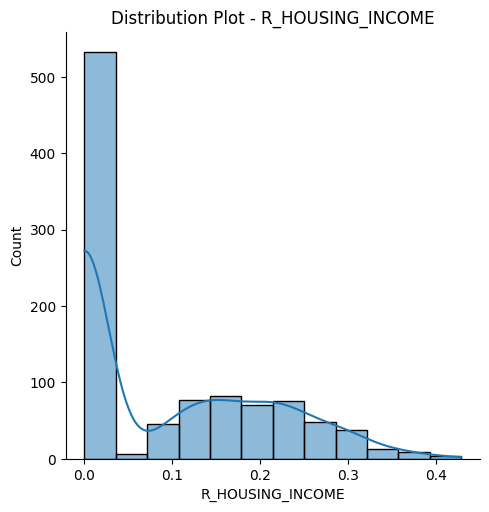

<Figure size 800x500 with 0 Axes>

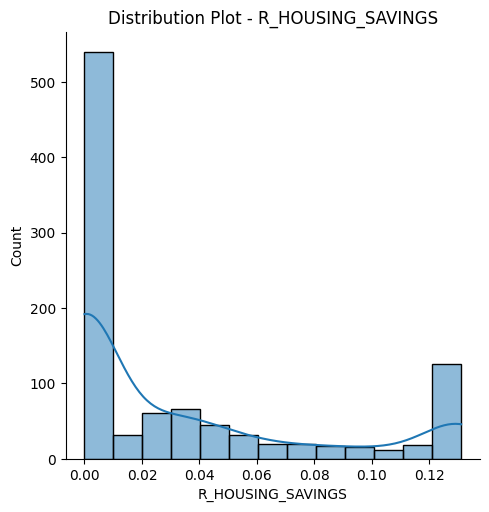

<Figure size 800x500 with 0 Axes>

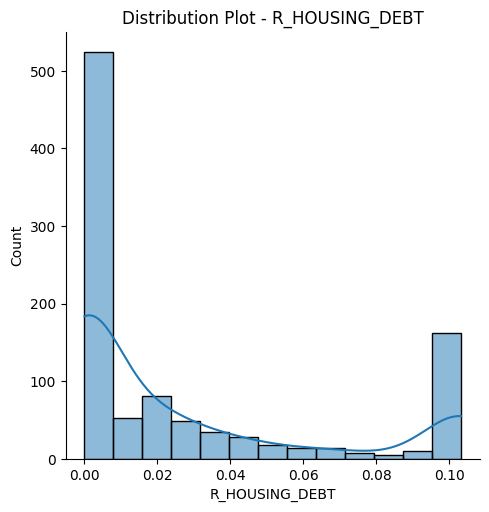

<Figure size 800x500 with 0 Axes>

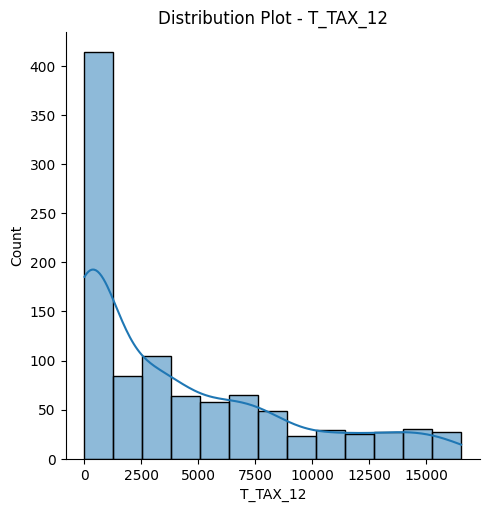

<Figure size 800x500 with 0 Axes>

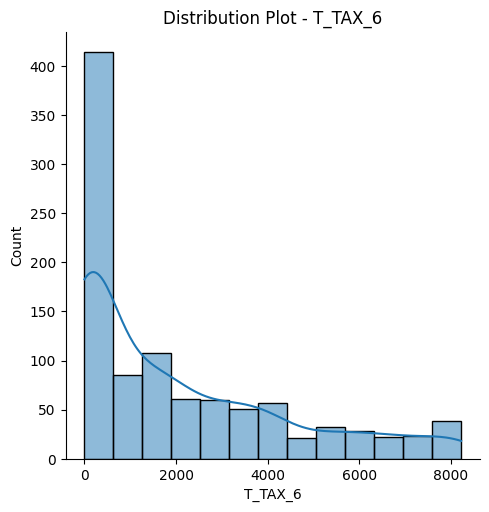

<Figure size 800x500 with 0 Axes>

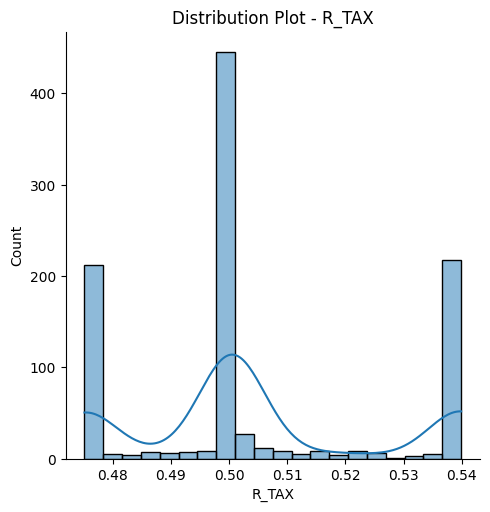

<Figure size 800x500 with 0 Axes>

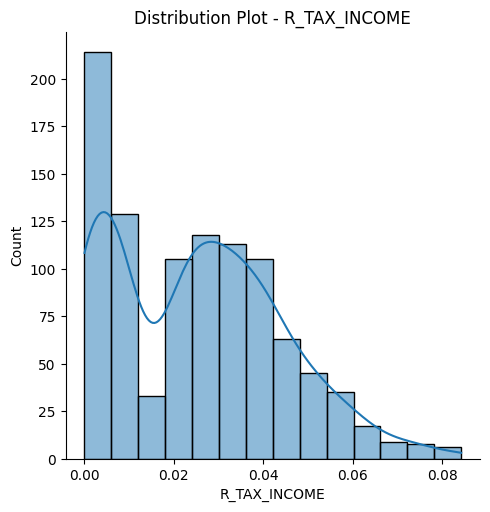

<Figure size 800x500 with 0 Axes>

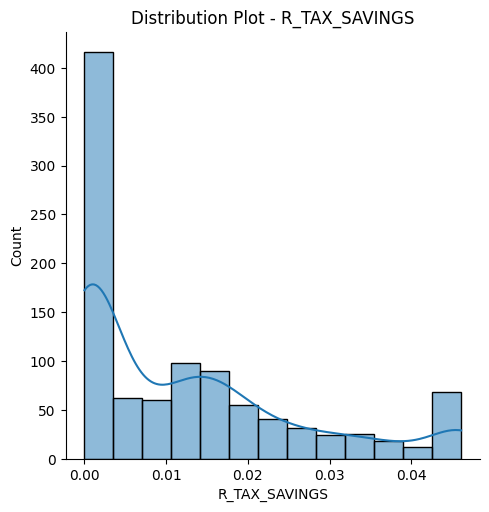

<Figure size 800x500 with 0 Axes>

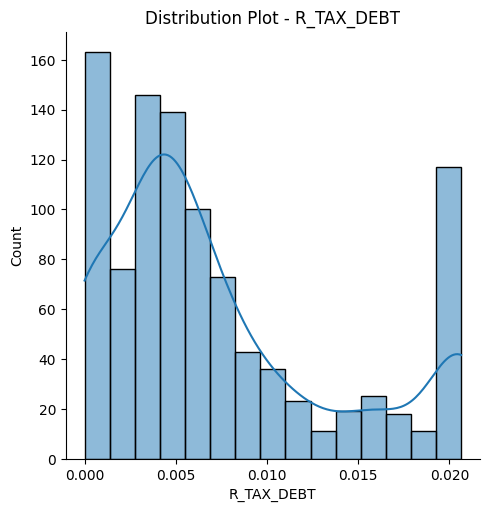

<Figure size 800x500 with 0 Axes>

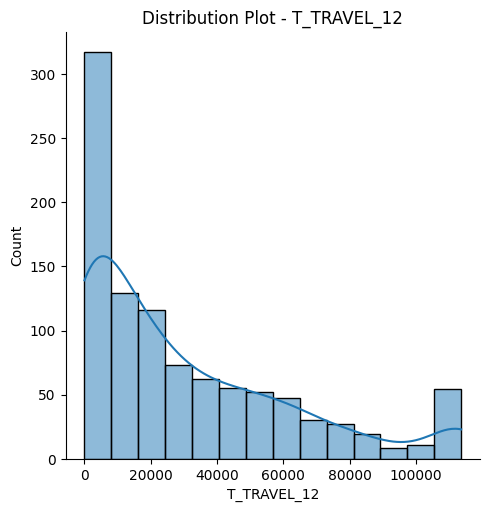

<Figure size 800x500 with 0 Axes>

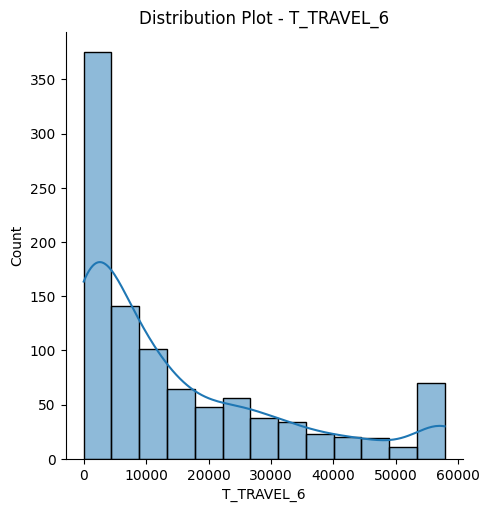

<Figure size 800x500 with 0 Axes>

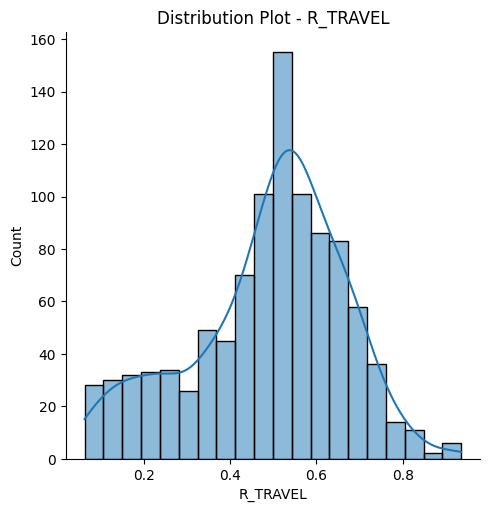

<Figure size 800x500 with 0 Axes>

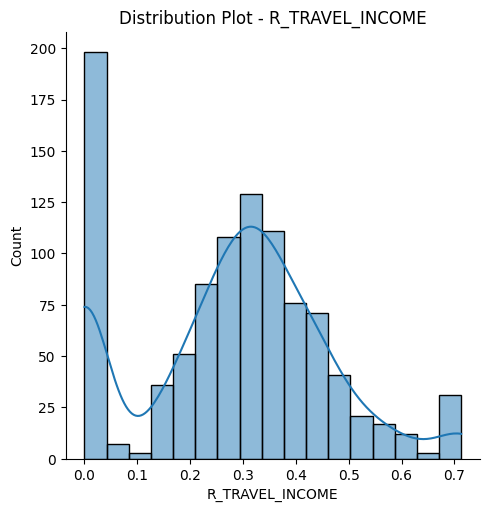

<Figure size 800x500 with 0 Axes>

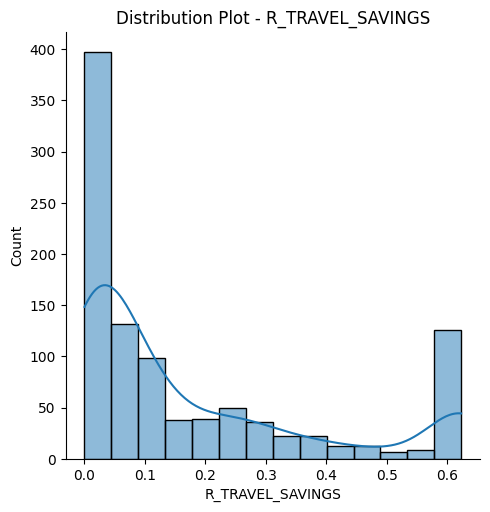

<Figure size 800x500 with 0 Axes>

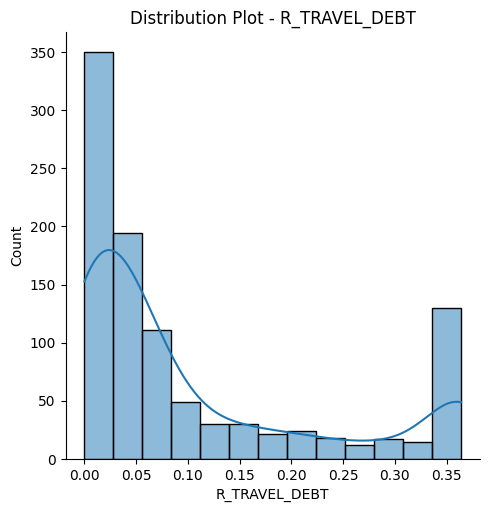

<Figure size 800x500 with 0 Axes>

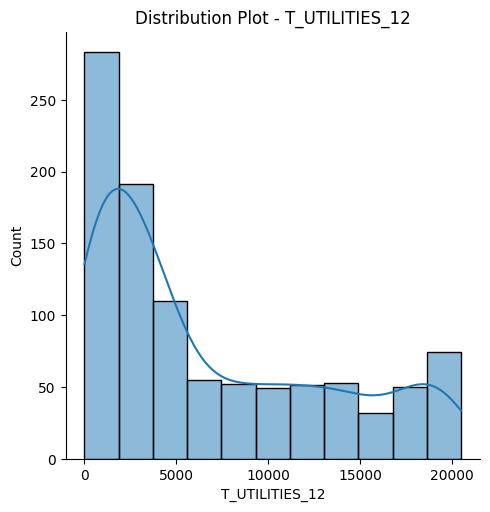

<Figure size 800x500 with 0 Axes>

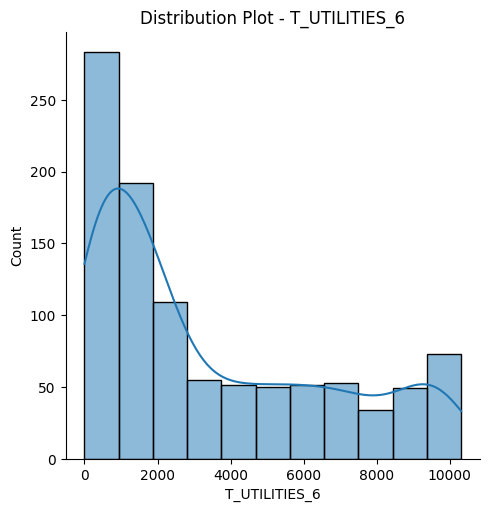

<Figure size 800x500 with 0 Axes>

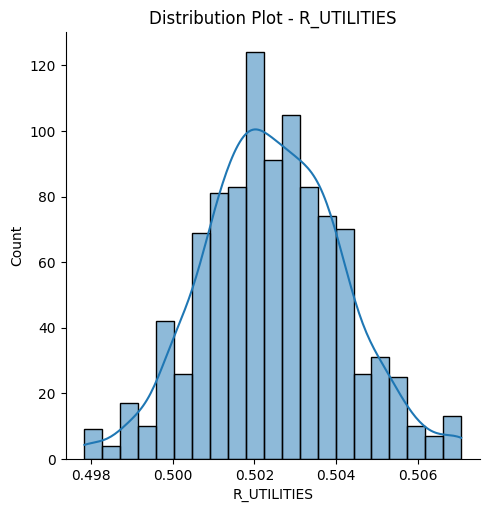

<Figure size 800x500 with 0 Axes>

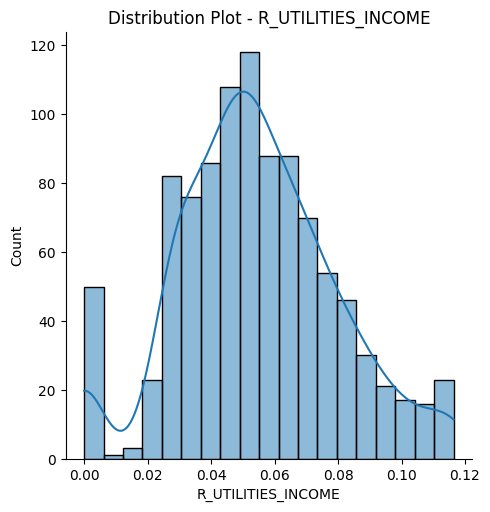

<Figure size 800x500 with 0 Axes>

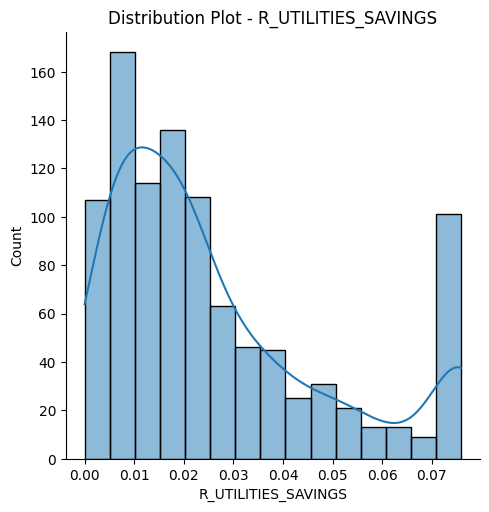

<Figure size 800x500 with 0 Axes>

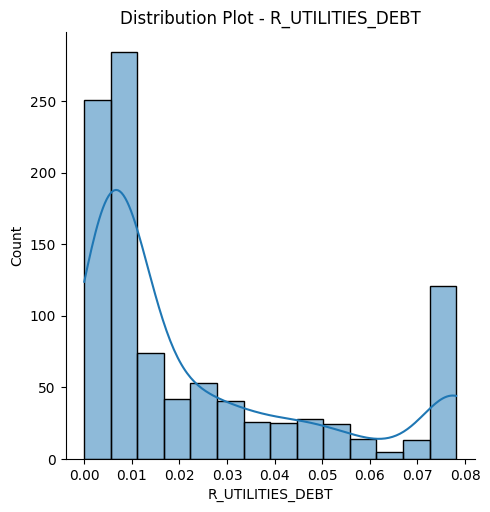

<Figure size 800x500 with 0 Axes>

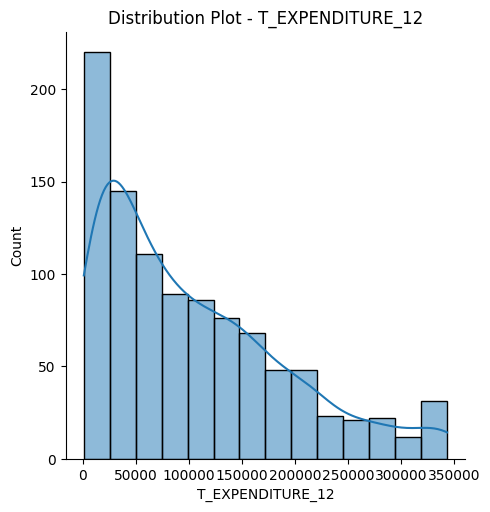

<Figure size 800x500 with 0 Axes>

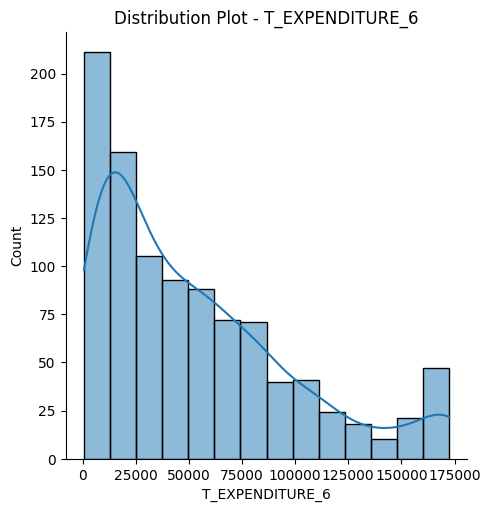

<Figure size 800x500 with 0 Axes>

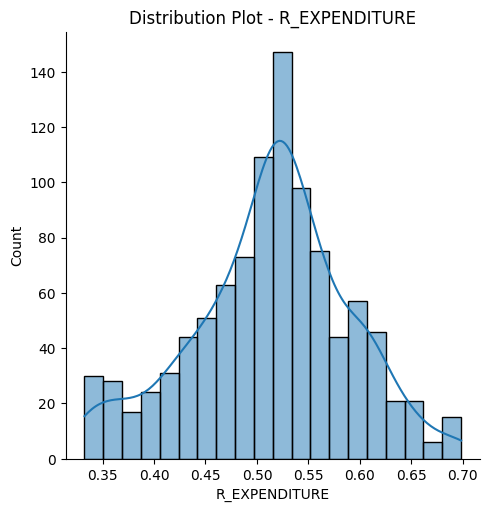

<Figure size 800x500 with 0 Axes>

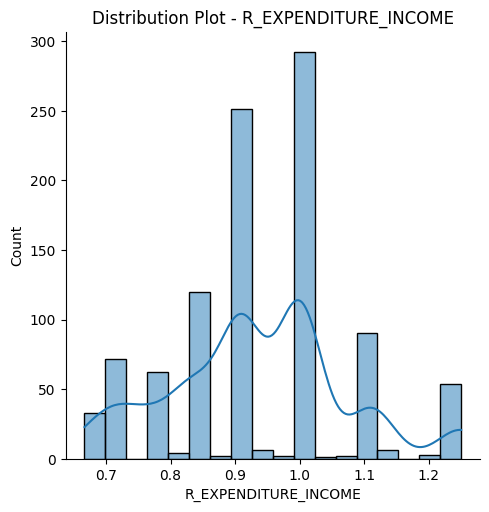

<Figure size 800x500 with 0 Axes>

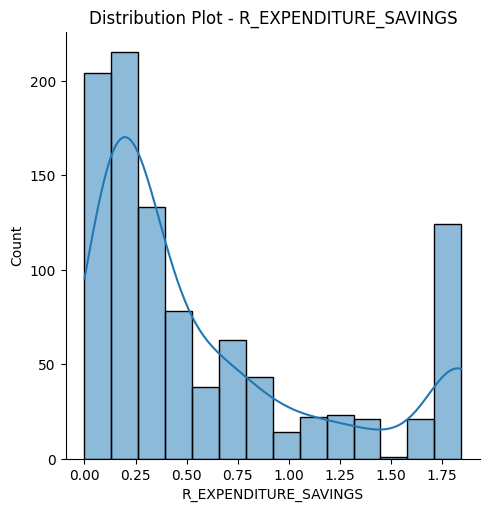

<Figure size 800x500 with 0 Axes>

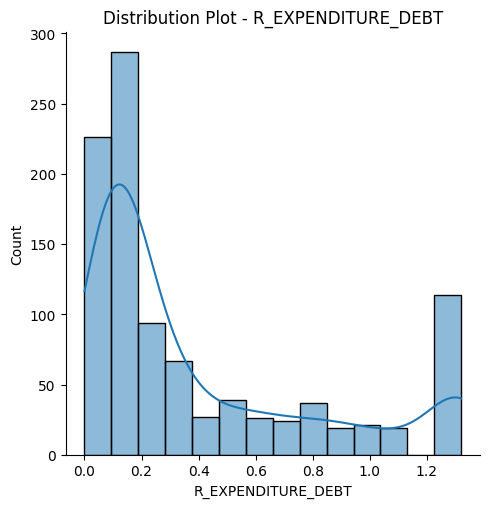

<Figure size 800x500 with 0 Axes>

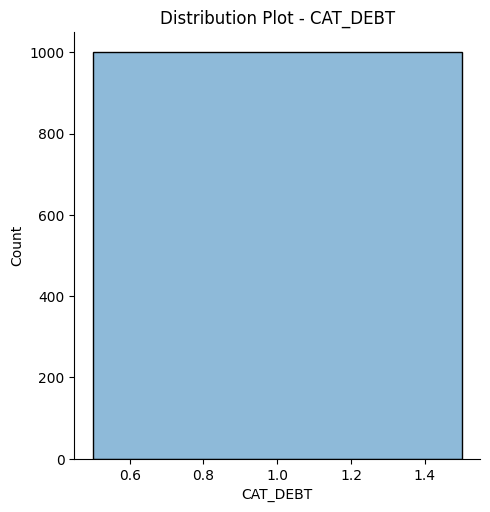

<Figure size 800x500 with 0 Axes>

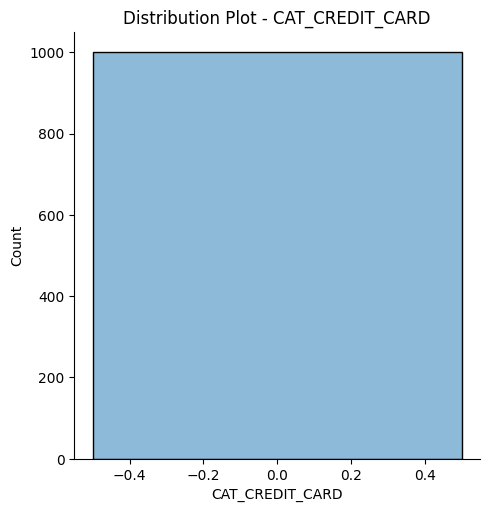

<Figure size 800x500 with 0 Axes>

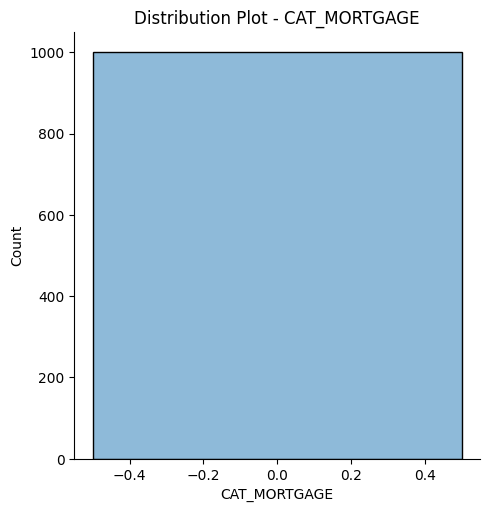

<Figure size 800x500 with 0 Axes>

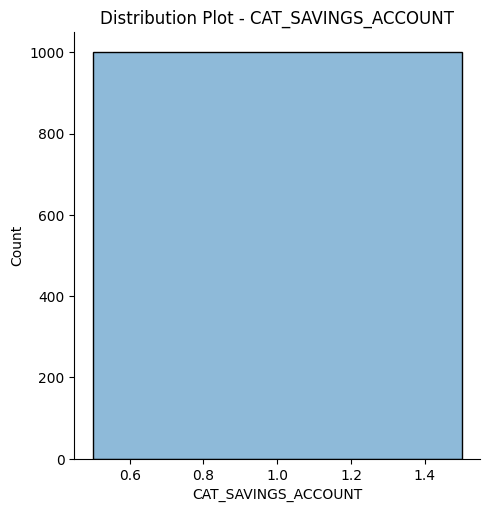

<Figure size 800x500 with 0 Axes>

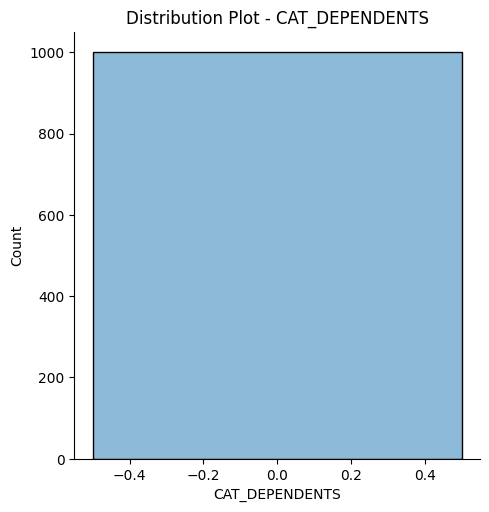

<Figure size 800x500 with 0 Axes>

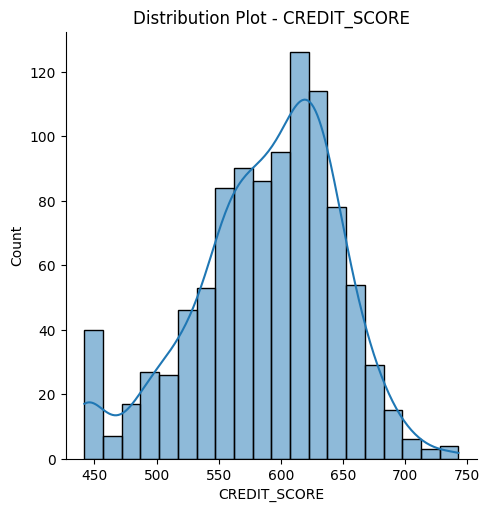

<Figure size 800x500 with 0 Axes>

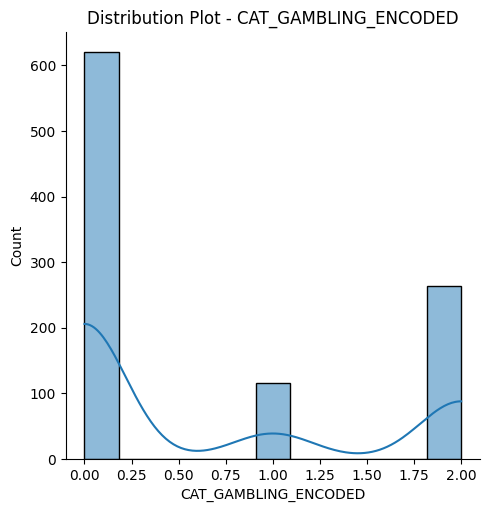

In [12]:
# Plotting distribution plots for each column
for col in columns_to_check:
    plt.figure(figsize=(8, 5))
    sns.displot(df[col], kde=True)
    plt.title(f'Distribution Plot - {col}')
    plt.show()

In [13]:
df['DEFAULT'].value_counts()

0    716
1    284
Name: DEFAULT, dtype: int64

In [14]:
X= df.drop('DEFAULT',axis=1)
y=df["DEFAULT"]

In [17]:
# Applying Smote for upsampling
from imblearn.over_sampling import SMOTE
X_res , y_res =SMOTE().fit_resample(X , y)

In [18]:
y_res.value_counts()

1    716
0    716
Name: DEFAULT, dtype: int64

In [19]:
X_res=df.drop("DEFAULT",axis=1)
y_res=df["DEFAULT"]

In [20]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X_res , y_res ,test_size=0.2)

In [21]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_scaled = ss.fit_transform(X_train) 
X_test_scaled = ss.transform(X_test)

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
X_train_pca=pca.fit_transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)

In [23]:

from sklearn.metrics import accuracy_score,classification_report,recall_score , confusion_matrix ,f1_score
from sklearn.model_selection import cross_val_score

In [24]:
# Function to calculate the metrics of all classification models
def classifier_metrics(model):
    model.fit(X_train_pca , y_train)
    y_pred = model.predict(X_test_pca)
    cr=classification_report(y_test , y_pred)
    cv = cross_val_score(model,X_res,y_res,scoring="accuracy")
    f1=f1_score(y_test,y_pred)
    print("Testing accuracy:",np.mean(cv))
    print("testing f1_score:",f1)
    print("Classification report \n:",cr)
    matrix =confusion_matrix(y_test , y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    print("----Model on Training data-----")
    y_train_pred = model.predict(X_train_pca)
    training_classification_report=classification_report(y_train , y_train_pred)
    training_accuracy=cross_val_score(model,X_train,y_train,scoring='accuracy')
    training_f1=f1_score(y_train,y_train_pred)
    print("Training accuracy score:",np.mean(training_accuracy))
    print("Training classification Report \n:",training_classification_report)
    print("training f1_score:",training_f1)
    

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

## Random Forest

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid_rf = {'n_estimators': [20, 60, 100, 120, 200],  
              'max_features': [0.2, 0.6, 1], 
              'max_samples': [0.5 ,0.75,0.1],
               'bootstrap': [True , False]}  
  
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, refit = True, verbose = 3) 
  
grid_rf.fit(X_train_pca, y_train) 

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END bootstrap=True, max_features=0.2, max_samples=0.5, n_estimators=20;, score=0.744 total time=   0.1s
[CV 2/5] END bootstrap=True, max_features=0.2, max_samples=0.5, n_estimators=20;, score=0.719 total time=   0.1s
[CV 3/5] END bootstrap=True, max_features=0.2, max_samples=0.5, n_estimators=20;, score=0.700 total time=   0.1s
[CV 4/5] END bootstrap=True, max_features=0.2, max_samples=0.5, n_estimators=20;, score=0.731 total time=   0.0s
[CV 5/5] END bootstrap=True, max_features=0.2, max_samples=0.5, n_estimators=20;, score=0.731 total time=   0.0s
[CV 1/5] END bootstrap=True, max_features=0.2, max_samples=0.5, n_estimators=60;, score=0.738 total time=   0.5s
[CV 2/5] END bootstrap=True, max_features=0.2, max_samples=0.5, n_estimators=60;, score=0.706 total time=   0.4s
[CV 3/5] END bootstrap=True, max_features=0.2, max_samples=0.5, n_estimators=60;, score=0.738 total time=   0.4s
[CV 4/5] END bootstrap=True, max_f

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [0.2, 0.6, 1],
                         'max_samples': [0.5, 0.75, 0.1],
                         'n_estimators': [20, 60, 100, 120, 200]},
             verbose=3)

In [27]:
# Best hyperparameters
best_params = grid_rf.best_params_

# Best model
best_model = grid_rf.best_estimator_
print(best_params)
print(best_model)

{'bootstrap': True, 'max_features': 0.2, 'max_samples': 0.5, 'n_estimators': 120}
RandomForestClassifier(max_features=0.2, max_samples=0.5, n_estimators=120)


Testing accuracy: 0.729
testing f1_score: 0.09090909090909091
Classification report 
:               precision    recall  f1-score   support

           0       0.71      0.97      0.82       141
           1       0.43      0.05      0.09        59

    accuracy                           0.70       200
   macro avg       0.57      0.51      0.46       200
weighted avg       0.63      0.70      0.61       200



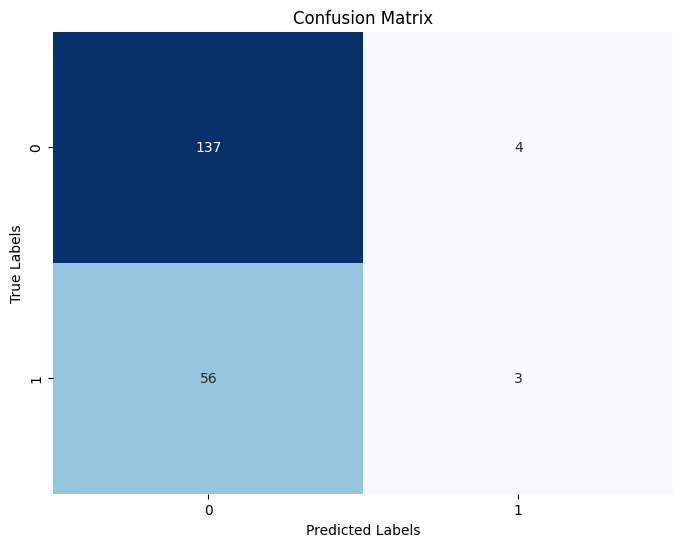

----Model on Training data-----
Training accuracy score: 0.72875
Training classification Report 
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       575
           1       1.00      1.00      1.00       225

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

training f1_score: 1.0


In [28]:
rf=RandomForestClassifier(max_features=0.2, max_samples=0.75 ,n_estimators= 200 ,n_jobs=-1)
classifier_metrics(rf)


## SVM

In [29]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train_pca, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.719 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.719 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.719 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [30]:
# Best hyperparameters
best_params = grid.best_params_

# Best model
best_model = grid.best_estimator_
print(best_params)
print(best_model)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.0001)


Testing accuracy: 0.716
testing f1_score: 0.05970149253731343
Classification report 
:               precision    recall  f1-score   support

           0       0.70      0.96      0.81       141
           1       0.25      0.03      0.06        59

    accuracy                           0.69       200
   macro avg       0.48      0.50      0.44       200
weighted avg       0.57      0.69      0.59       200



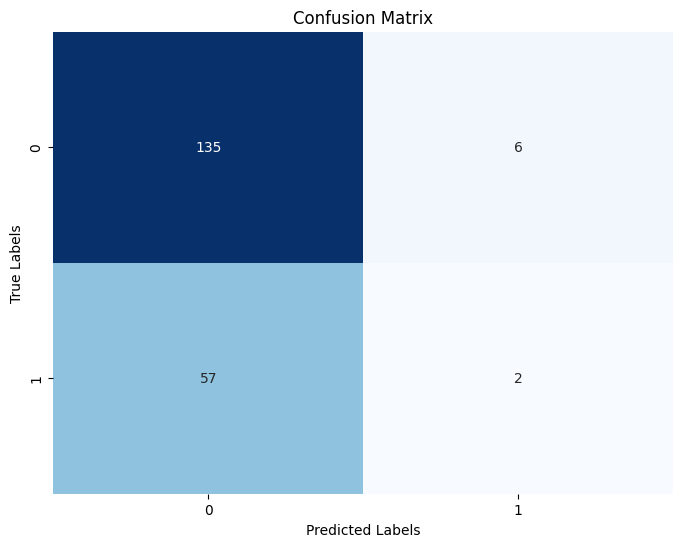

----Model on Training data-----
Training accuracy score: 0.71875
Training classification Report 
:               precision    recall  f1-score   support

           0       0.75      0.97      0.85       575
           1       0.73      0.18      0.29       225

    accuracy                           0.75       800
   macro avg       0.74      0.58      0.57       800
weighted avg       0.74      0.75      0.69       800

training f1_score: 0.2857142857142857


In [31]:
svm = SVC(C=10 ,gamma=0.001)
classifier_metrics(svm)

## KNN

In [32]:
param_grid_knn = {'n_neighbors': [5, 7, 3, 1, 6],  
              'weights': ['uniform','distance'], 
                  'p':[1,2,5,7]
                 }  
  
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid_knn.fit(X_train_pca, y_train) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END n_neighbors=5, p=1, weights=uniform;, score=0.675 total time=   0.0s
[CV 2/5] END n_neighbors=5, p=1, weights=uniform;, score=0.675 total time=   0.0s
[CV 3/5] END n_neighbors=5, p=1, weights=uniform;, score=0.656 total time=   0.0s
[CV 4/5] END n_neighbors=5, p=1, weights=uniform;, score=0.700 total time=   0.0s
[CV 5/5] END n_neighbors=5, p=1, weights=uniform;, score=0.675 total time=   0.0s
[CV 1/5] END n_neighbors=5, p=1, weights=distance;, score=0.675 total time=   0.0s
[CV 2/5] END n_neighbors=5, p=1, weights=distance;, score=0.675 total time=   0.0s
[CV 3/5] END n_neighbors=5, p=1, weights=distance;, score=0.656 total time=   0.0s
[CV 4/5] END n_neighbors=5, p=1, weights=distance;, score=0.700 total time=   0.0s
[CV 5/5] END n_neighbors=5, p=1, weights=distance;, score=0.675 total time=   0.0s
[CV 1/5] END n_neighbors=5, p=2, weights=uniform;, score=0.688 total time=   0.0s
[CV 2/5] END n_neighbors=5, p=2

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 7, 3, 1, 6], 'p': [1, 2, 5, 7],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [33]:
# Best hyperparameters
best_params = grid_knn.best_params_

# Best model
best_model = grid_knn.best_estimator_
print(best_params)
print(best_model)

{'n_neighbors': 6, 'p': 5, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=6, p=5)


Testing accuracy: 0.711
testing f1_score: 0.11594202898550725
Classification report 
:               precision    recall  f1-score   support

           0       0.71      0.96      0.82       141
           1       0.40      0.07      0.12        59

    accuracy                           0.69       200
   macro avg       0.56      0.51      0.47       200
weighted avg       0.62      0.69      0.61       200



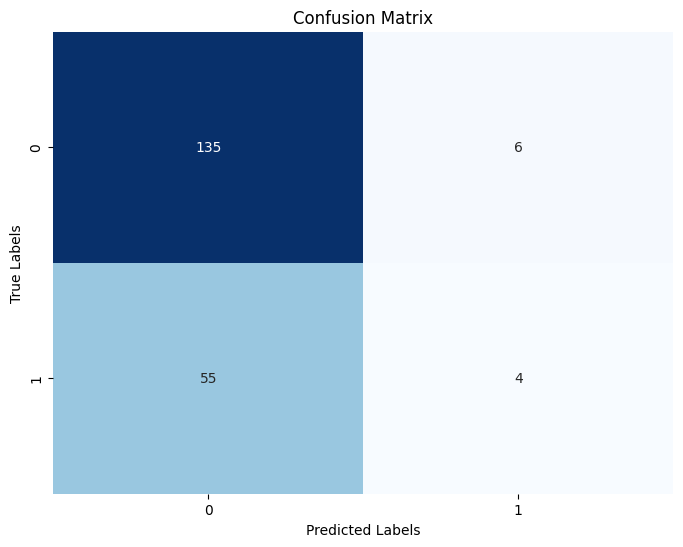

----Model on Training data-----
Training accuracy score: 0.7150000000000001
Training classification Report 
:               precision    recall  f1-score   support

           0       0.75      0.95      0.84       575
           1       0.60      0.21      0.31       225

    accuracy                           0.74       800
   macro avg       0.68      0.58      0.57       800
weighted avg       0.71      0.74      0.69       800

training f1_score: 0.3102310231023102


In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6 , p=5)
classifier_metrics(knn)

## Logistic Regression

In [35]:
param_grid_lr = {'penalty': ['l1','l2', 'elasticnet', 'None'],  
              'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 
                  'max_iter':[100,300,500]
                 }  
  
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid_lr.fit(X_train_pca, y_train) 

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END max_iter=100, penalty=l1, solver=liblinear;, score=0.725 total time=   0.0s
[CV 2/5] END max_iter=100, penalty=l1, solver=liblinear;, score=0.731 total time=   0.0s
[CV 3/5] END max_iter=100, penalty=l1, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END max_iter=100, penalty=l1, solver=liblinear;, score=0.700 total time=   0.0s
[CV 5/5] END max_iter=100, penalty=l1, solver=liblinear;, score=0.700 total time=   0.0s
[CV 1/5] END max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 300, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'None'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             verbose=3)

In [36]:
best_params = grid_lr.best_params_

# Best model
best_model = grid_lr.best_estimator_
print(best_params)
print(best_model)

{'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression()


Testing accuracy: 0.725
testing f1_score: 0.18181818181818182
Classification report 
:               precision    recall  f1-score   support

           0       0.71      0.92      0.80       141
           1       0.39      0.12      0.18        59

    accuracy                           0.69       200
   macro avg       0.55      0.52      0.49       200
weighted avg       0.62      0.69      0.62       200



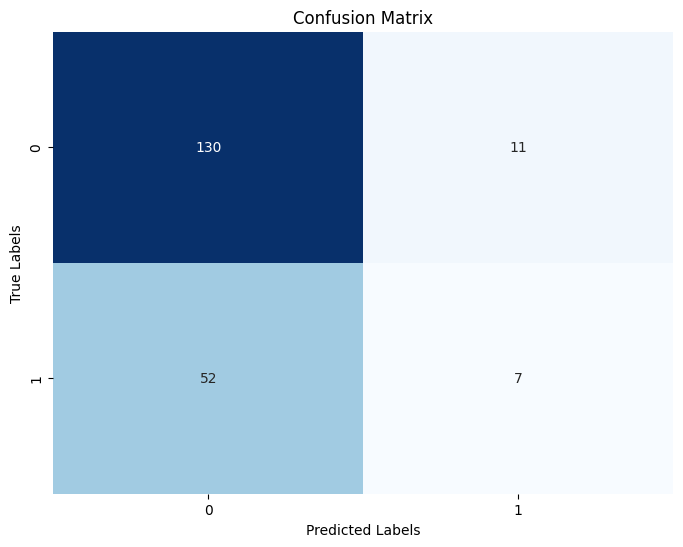

----Model on Training data-----
Training accuracy score: 0.7274999999999999
Training classification Report 
:               precision    recall  f1-score   support

           0       0.78      0.93      0.85       575
           1       0.65      0.32      0.43       225

    accuracy                           0.76       800
   macro avg       0.71      0.63      0.64       800
weighted avg       0.74      0.76      0.73       800

training f1_score: 0.42857142857142855


In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', solver='liblinear')
classifier_metrics(lr)

## Voting

In [38]:
estimators=[('lr',lr),('rf',rf),('knn',knn),('svm',svm)]

Testing accuracy: 0.7270000000000001
testing f1_score: 0.06060606060606061
Classification report 
:               precision    recall  f1-score   support

           0       0.70      0.96      0.81       141
           1       0.29      0.03      0.06        59

    accuracy                           0.69       200
   macro avg       0.50      0.50      0.44       200
weighted avg       0.58      0.69      0.59       200



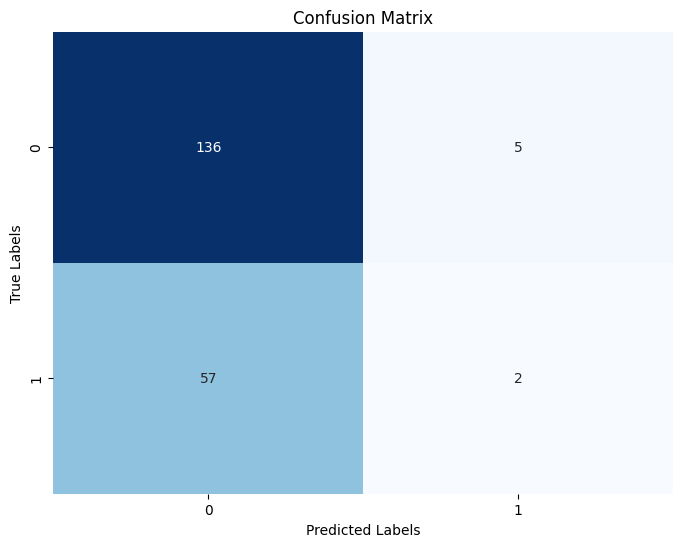

----Model on Training data-----
Training accuracy score: 0.7337499999999999
Training classification Report 
:               precision    recall  f1-score   support

           0       0.76      0.99      0.86       575
           1       0.87      0.21      0.34       225

    accuracy                           0.77       800
   macro avg       0.82      0.60      0.60       800
weighted avg       0.79      0.77      0.71       800

training f1_score: 0.33691756272401435


In [39]:
VC=VotingClassifier(estimators=estimators , voting='hard')
classifier_metrics(VC)

## Bagging

Testing accuracy: 0.728
testing f1_score: 0.11267605633802817
Classification report 
:               precision    recall  f1-score   support

           0       0.71      0.94      0.81       141
           1       0.33      0.07      0.11        59

    accuracy                           0.69       200
   macro avg       0.52      0.51      0.46       200
weighted avg       0.60      0.69      0.60       200



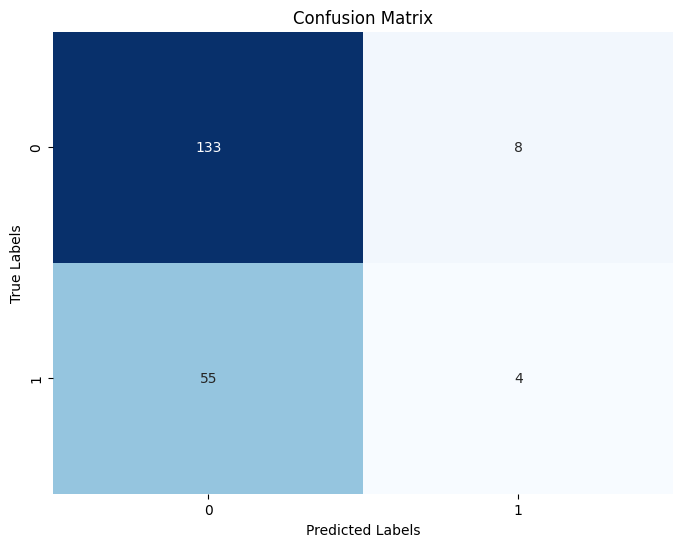

----Model on Training data-----
Training accuracy score: 0.73625
Training classification Report 
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       575
           1       1.00      1.00      1.00       225

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

training f1_score: 1.0


In [40]:
BC=BaggingClassifier(n_estimators = 100)
classifier_metrics(BC)